In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from sklearn.model_selection import GridSearchCV
plt.style.use('bmh')
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [3]:
import numpy as np
import lightgbm as lgb
import eli5

from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

import warnings
warnings.filterwarnings('ignore')

C:\Users\peddi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\peddi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

import sklearn.feature_selection as fs 
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [5]:
import os
os.getcwd()

'C:\\Users\\peddi'

In [6]:
os.chdir('D:\Data science\DS edWisor\Second project')

In [7]:
df=pd.read_csv('Sa_mission(train).csv')

In [8]:
df.shape

(200000, 202)

In [9]:
df1=pd.read_csv('Sa_mission(test).csv')

In [10]:
df1.shape

(200000, 201)

### EDA(Exploratory data analysis)

In [11]:
train=df.copy()

In [12]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [13]:
train.tail()

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
199995  18.0249  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996  22.2717   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  23.5311  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  20.4158  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  15.2101  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[5 rows x 202 columns]

In [14]:
test=df1.copy()

In [15]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [16]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [17]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [18]:
test.isnull().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [19]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [20]:
total = train.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((train.isnull().sum(axis=0)/train.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head()

Total  Percent
var_199      0      0.0
var_61       0      0.0
var_71       0      0.0
var_70       0      0.0
var_69       0      0.0

In [21]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [22]:
train['ID_code']

0              train_0
1              train_1
2              train_2
3              train_3
4              train_4
              ...     
199995    train_199995
199996    train_199996
199997    train_199997
199998    train_199998
199999    train_199999
Name: ID_code, Length: 200000, dtype: object

In [23]:
train.drop_duplicates(keep='first',inplace=True)

In [24]:
train.shape

(200000, 202)

- There are no duplicates in the dataset

In [25]:
train.drop(columns=['ID_code'],inplace=True,axis=0)

In [26]:
train.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [27]:
train.shape

(200000, 201)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2 MB


In [29]:
train.dropna(inplace=True)

In [288]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [30]:
train.shape  #there are no null values in train dataset

(200000, 201)

In [31]:
dt=train.copy()
dt.drop(columns=['target'],inplace=True)
dt.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [32]:
dt.dtypes

var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 200, dtype: object

In [33]:
def bound(feature):
    q75,q25=np.percentile(feature,[75,25])
    iqr=q75-q25
    lower=q25-(iqr*1.5)
    upper=q75+(iqr*1.5)
    lower="{:.4f}".format(lower)
    upper="{:.4f}".format(upper)
    return upper,lower

In [34]:
type(bound(dt['var_9']))

tuple

In [37]:
dt.keys()

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [38]:
list(dt.keys())

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [39]:
dt.drop_duplicates(keep='first',inplace=True)

In [40]:
dt.shape

(200000, 200)

In [41]:
dt.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [42]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

### Feature engineering and selection

In [43]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD( n_components = 199, random_state=40 )
trsvd = svd.fit_transform( dt )
cumVarianceExplained = np.cumsum( svd.explained_variance_ratio_ )

<Figure size 1152x288 with 0 Axes>

Text(0.5, 0, 'n components')

Text(0, 0.5, 'cumulative Variance Explained')

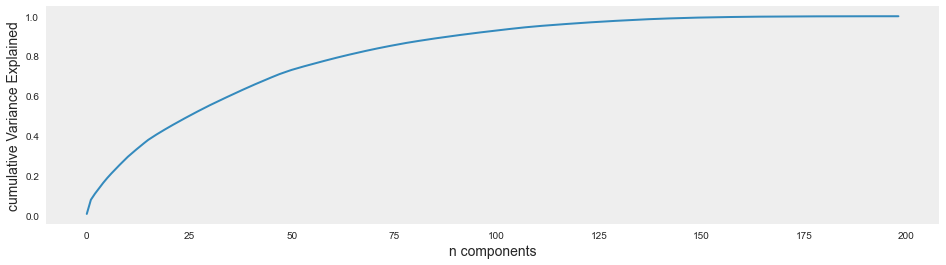

In [44]:
plt.figure( figsize=(16, 4))
plt.plot( cumVarianceExplained, linewidth = 2 )
plt.grid()
plt.xlabel('n components',size=14)
plt.ylabel('cumulative Variance Explained',size=14)
plt.show()

In [45]:
svd.components_

array([[ 7.28323914e-02, -1.11051445e-02,  7.30614155e-02, ...,
         6.07278922e-02,  1.08236327e-01, -2.28078059e-02],
       [-5.44488118e-03,  1.58293398e-03, -5.73349629e-03, ...,
        -4.68875357e-03, -8.58729135e-03,  3.88550879e-03],
       [ 4.80781388e-03, -1.42756749e-03,  5.43340777e-03, ...,
         4.78676267e-03,  8.89551143e-03,  2.12992089e-03],
       ...,
       [ 9.61243298e-05, -3.67623869e-05, -1.22422660e-04, ...,
        -6.21565396e-04, -9.88942511e-05, -2.94367031e-05],
       [ 2.16038274e-04, -2.72017781e-05,  3.47673176e-04, ...,
         1.02033144e-03,  9.44807800e-05, -9.56529034e-06],
       [-1.54356256e-04, -6.53623244e-05, -3.92181353e-04, ...,
        -6.54495380e-04,  6.53768927e-05, -3.28189571e-05]])

In [46]:
len(svd.components_)

199

In [47]:
best_features=[]
new_features = [i for i in dt.columns]
best_features = [new_features[i] for i in svd.components_[0].argsort()[::-1]]

In [48]:
best_features_sort=pd.DataFrame(data=best_features,columns=['Features'])

In [49]:
best_features_sort

Features
0    var_120
1     var_70
2    var_160
3    var_136
4    var_102
..       ...
195  var_187
196   var_61
197   var_47
198   var_45
199   var_90

[200 rows x 1 columns]

In [50]:
best_feat=[]
best_feat=best_features[0:130]
best_feat.append('target')
len(best_feat)

131

In [51]:
train_clean=train[best_feat]

In [52]:
train_clean.shape

(200000, 131)

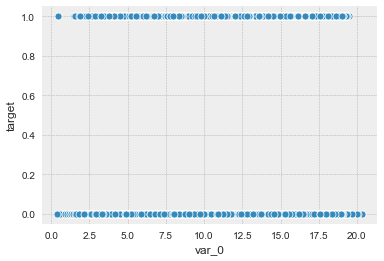

In [53]:
sns.scatterplot('var_0','target',data=train)

- From the above plot it is seen how the data is distributed and say that it is classification data consisting of only 0 and 1 i,..e Yes or no for var_0 or it says whether the product var_0 is purchased or not
- There are many purchased data in the dataset and it is more dominating as there are more such data. So this is imbalanced classification dataset

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
dt.shape

(200000, 200)

In [56]:
scaler = StandardScaler()
scaler.fit(dt)

StandardScaler()

In [57]:
scaled_data = scaler.transform(dt)
print(scaled_data)

[[-0.57710174 -1.27373702  0.45170728 ... -0.37396811 -1.02639785
   0.21413482]
 [ 0.26995857 -0.62213756  1.19036045 ... -0.12939961  0.82541712
   0.50568523]
 [-0.68111341 -0.2760664   0.51698836 ... -0.69514059 -0.38144932
   0.35668144]
 ...
 [ 0.17870987 -0.84546901 -0.07667568 ... -0.20904171 -0.67680579
   0.72102365]
 [-0.31746727 -1.72398014  1.09630117 ...  1.22180338 -0.11352617
  -1.01298853]
 [ 0.06456676 -1.00810962  0.53130173 ... -0.78389704 -1.24290845
   0.33196403]]


In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)

In [60]:
pca.fit(scaled_data)

PCA(n_components=2)

In [61]:
x_pca = pca.transform(scaled_data)
print(x_pca)

[[-0.31276246 -0.04485139]
 [ 3.23893609 -0.21752818]
 [-0.60782075  1.26608904]
 ...
 [ 0.63586068 -0.75857995]
 [-0.32221153  1.49108405]
 [-0.50981159 -0.35238544]]


In [62]:
scaled_data.shape

(200000, 200)

In [63]:
x_pca.shape

(200000, 2)

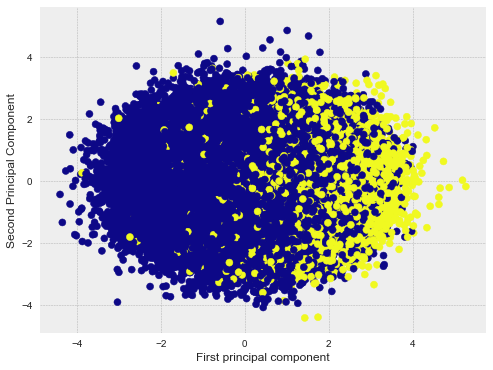

In [64]:
plt.figure(figsize=(8,6));
plt.scatter(x_pca[:,0],x_pca[:,1],c=train['target'],cmap='plasma');
plt.xlabel('First principal component');
plt.ylabel('Second Principal Component');

In [65]:
pca.components_

array([[ 8.83939115e-02,  1.41590769e-02,  7.93388608e-02,
        -1.30031133e-01,  4.71949105e-02, -1.39947923e-03,
         1.33509212e-01,  5.70275085e-02,  1.41903752e-02,
        -1.05019109e-01,  3.07310851e-02,  1.76458605e-02,
        -9.68938926e-02, -9.08714508e-02, -2.74282708e-02,
        -7.16344941e-02, -1.33621685e-02, -3.72564602e-02,
        -1.00146610e-02, -2.20689614e-02, -5.14652939e-02,
        -3.52567065e-02,  1.22025033e-01, -1.09309392e-01,
         6.46555171e-02,  2.78409355e-02,  1.27867725e-01,
         3.71587350e-03,  8.14544350e-02, -1.04687822e-01,
        -3.63052169e-02, -9.68668375e-02,  1.53314014e-02,
        -5.86238416e-02,  2.20546310e-02, -2.04567475e-02,
         1.88193432e-02,  9.74710471e-02,  3.77820695e-02,
        -5.70410238e-02,  1.45977005e-03,  4.86545922e-02,
        -1.87858268e-02, -7.46800798e-02, -9.23985940e-02,
        -9.85148953e-02, -5.63556794e-02, -5.27092225e-02,
         1.20647535e-01,  7.48073786e-02, -7.82619641e-0

In [66]:
df_comp = pd.DataFrame(pca.components_,columns=dt.columns)

<Figure size 864x432 with 0 Axes>

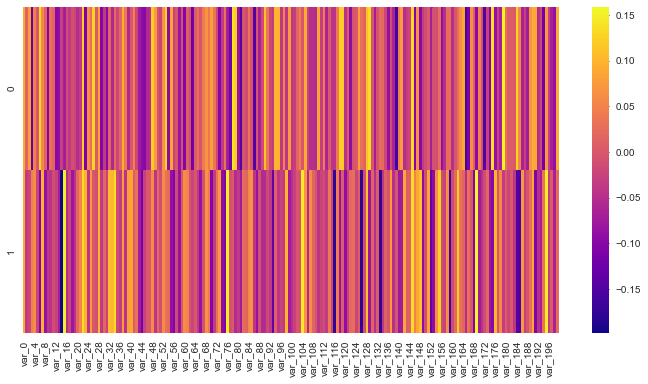

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [68]:
df_comp

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0  0.088394  0.014159  0.079339 -0.130031  0.047195 -0.001399  0.133509   
1  0.089714 -0.034951 -0.024091  0.045393  0.061996 -0.022932 -0.104315   

      var_7     var_8     var_9  ...   var_190   var_191   var_192   var_193  \
0  0.057028  0.014190 -0.105019  ...  0.094165  0.086704 -0.051676 -0.020521   
1  0.097357 -0.085649 -0.039855  ...  0.086275 -0.105277 -0.047331 -0.071439   

    var_194   var_195   var_196   var_197   var_198   var_199  
0 -0.121784  0.073160 -0.029413 -0.067416 -0.089259  0.092454  
1  0.032281  0.151652 -0.031172  0.004160 -0.065023  0.025058  

[2 rows x 200 columns]

In [69]:
pca_train=pd.DataFrame(pca.transform(scaled_data))
pca_train.head()

0         1
0 -0.312762 -0.044851
1  3.238936 -0.217528
2 -0.607821  1.266089
3  0.122427  0.622404
4  2.349400  0.254086

In [70]:
pca_train.describe()

0             1
count  2.000000e+05  2.000000e+05
mean   3.752942e-17  1.919881e-17
std    1.053361e+00  1.013224e+00
min   -4.403637e+00 -4.423574e+00
25%   -7.120187e-01 -6.814644e-01
50%   -1.850305e-02 -1.441274e-04
75%    6.959324e-01  6.838592e-01
max    5.263975e+00  5.136861e+00

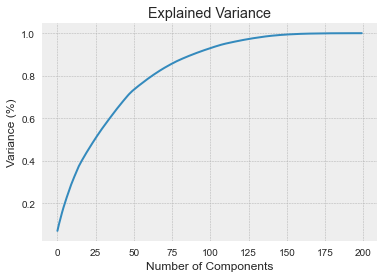

In [71]:
#from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(dt)
plt.figure();
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel('Number of Components');
plt.ylabel('Variance (%)'); #for each component
plt.title('Explained Variance');
plt.show();

- From the Scree plot, it can be seen that 130 components are required to explain >90% of the variance which is still better than computing using all the 200 features. The explained variance threshold can be choosen based on the domain and business requirements.
- PCA and SVD gives the same plot and so no of components can be chosen from either of them

In [72]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaled_data1=scaler.fit_transform(dt)

In [73]:
dt.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [74]:
scaled_data1

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

In [75]:
dt_plot=pd.DataFrame(data=scaled_data1, columns= dt.columns)

In [76]:
dt_plot.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.577102 -1.273737  0.451707 -0.833709  0.235571 -0.536430 -0.334926   
1  0.269959 -0.622138  1.190360 -0.688846  0.790975  1.539900  0.244461   
2 -0.681113 -0.276066  0.516988  0.536516 -0.305477 -0.511033  1.769839   
3  0.125158 -0.129426 -0.667575  0.195355  0.927992  0.410672  0.500633   
4 -0.277303  0.035610  0.817683 -0.077829  0.738607  0.955574  0.613372   

      var_7     var_8     var_9  ...   var_190   var_191   var_192   var_193  \
0  0.608751 -1.561580 -1.473796  ...  0.263374 -1.149158  0.817469 -0.411013   
1 -0.003525  0.858974  0.419300  ...  0.966611  0.093605  0.443623  1.908764   
2 -0.564749 -1.561370 -1.307408  ... -0.072093  0.777997 -0.174131 -0.412316   
3 -0.474201 -1.843910  0.548767  ...  0.270216 -0.891456 -0.818468 -0.478548   
4  0.791544  1.794753  0.090006  ... -1.036191  0.688988 -1.405987  1.468536   

    var_194   var_195   var_196   var_197   var_198   var_199  
0  0.168705 -1.578117  1.022131 -0.373968 -1.026398  0.214135  
1 -0.817594  1.522342  1.067654 -0.129400  0.825417  0.505685  
2  1.151591  2.297370 -1.617906 -0.695141 -0.381449  0.356681  
3  1.607869 -0.789517 -0.959020  1.501744  0.697118 -0.543502  
4 -1.501101 -0.958473  0.297627  0.645537  0.706318 -0.525375  

[5 rows x 200 columns]

In [77]:
dt_plot.shape

(200000, 200)

In [78]:
dt_plot.describe()

var_0         var_1         var_2         var_3         var_4  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   6.984095e-16 -3.493761e-17 -6.816742e-16 -6.580014e-17 -6.352482e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.378739e+00 -3.312510e+00 -3.255758e+00 -3.345903e+00 -3.698703e+00   
25%   -7.322476e-01 -7.684882e-01 -7.545633e-01 -7.548787e-01 -7.363223e-01   
50%   -5.104015e-02  4.832475e-03 -5.119182e-02  1.393366e-02  1.843135e-02   
75%    6.836369e-01  7.373387e-01  6.821601e-01  7.475948e-01  7.287035e-01   
max    3.169391e+00  2.964030e+00  3.270797e+00  3.128139e+00  3.445820e+00   

              var_5         var_6         var_7         var_8         var_9  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   1.478817e-17 -9.260245e-17  6.768006e-16 -3.457373e-18  1.417617e-15   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.496937e+00 -3.532923e+00 -3.275579e+00 -3.237586e+00 -2.912180e+00   
25%   -7.802162e-01 -7.399549e-01 -7.612636e-01 -7.807544e-01 -7.679231e-01   
50%    2.952565e-02 -2.751966e-02 -2.605270e-02  3.286843e-02  5.049414e-02   
75%    7.617868e-01  6.854925e-01  7.480983e-01  7.962906e-01  8.235900e-01   
max    2.838130e+00  3.506501e+00  3.260893e+00  2.960770e+00  2.901352e+00   

       ...       var_190       var_191       var_192       var_193  \
count  ...  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean   ... -1.794120e-18  2.345457e-16  1.215494e-16  1.252543e-16   
std    ...  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min    ... -3.800018e+00 -3.350719e+00 -3.884107e+00 -3.786347e+00   
25%    ... -7.222214e-01 -7.544853e-01 -7.021442e-01 -6.881662e-01   
50%    ... -6.763242e-03 -2.998690e-02 -1.795060e-02  1.617635e-02   
75%    ...  6.955751e-01  6.860521e-01  6.910499e-01  7.199428e-01   
max    ...  3.334816e+00  3.068899e+00  4.379381e+00  3.744977e+00   

            var_194       var_195       var_196       var_197       var_198  \
count  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean  -7.931561e-16  5.891176e-17  4.307943e-17 -7.464218e-16  1.394063e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.966165e+00 -3.581239e+00 -3.027477e+00 -3.198224e+00 -3.178883e+00   
25%   -7.540249e-01 -7.196264e-01 -7.792415e-01 -7.110907e-01 -6.778686e-01   
50%   -1.142980e-02 -2.141614e-02  1.935421e-02 -2.165493e-02  2.103323e-02   
75%    7.663868e-01  6.798025e-01  7.798153e-01  7.434083e-01  7.286782e-01   
max    3.168908e+00  3.088768e+00  2.936766e+00  3.355213e+00  3.390432e+00   

            var_199  
count  2.000000e+05  
mean   3.308326e-17  
std    1.000003e+00  
min   -3.403554e+00  
25%   -7.551204e-01  
50%    4.857132e-02  
75%    7.820795e-01  
max    3.049173e+00  

[8 rows x 200 columns]

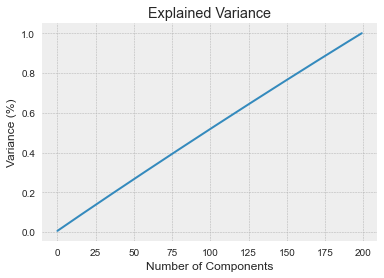

In [79]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(dt_plot);
plt.figure();
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel('Number of Components');
plt.ylabel('Variance (%)'); #for each component
plt.title('Explained Variance');
plt.show();

In [80]:
train.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [81]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

### Data visualization

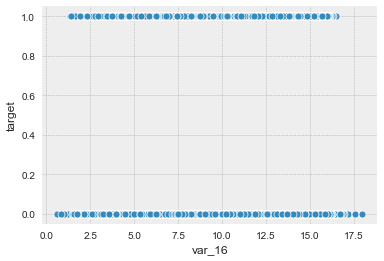

In [82]:
sns.scatterplot('var_16','target',data=train)

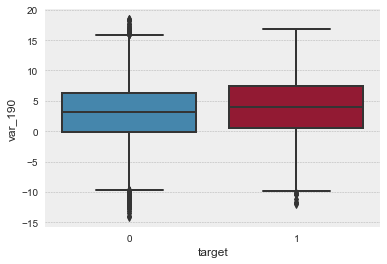

In [83]:
sns.boxplot(x='target',y='var_190',data=train)

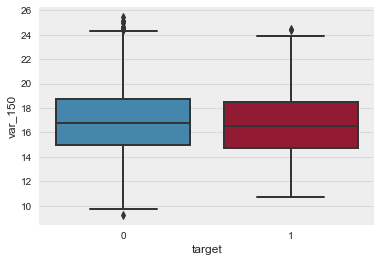

In [84]:
sns.boxplot(x='target',y='var_150',data=train)

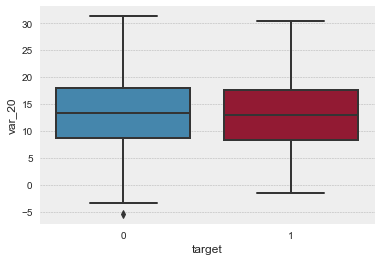

In [85]:
sns.boxplot(x='target',y='var_20',data=train)

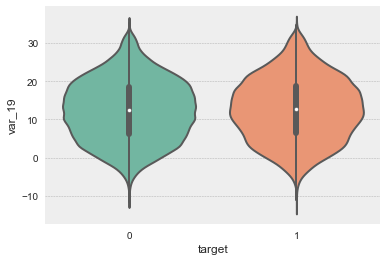

In [86]:
sns.violinplot(x='target',y='var_19',data=train,palette="Set2")

In [87]:
train.columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [88]:
dt.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [89]:
dt.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [90]:
dtt=test.copy()

In [91]:
dtt.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [92]:
dtt.drop(columns='ID_code',inplace=True)

In [93]:
dtt.shape

(200000, 200)

In [94]:
dtt.mean()

var_0      10.658737
var_1      -1.624244
var_2      10.707452
var_3       6.788214
var_4      11.076399
             ...    
var_195    -0.133657
var_196     2.290899
var_197     8.912428
var_198    15.869184
var_199    -3.246342
Length: 200, dtype: float64

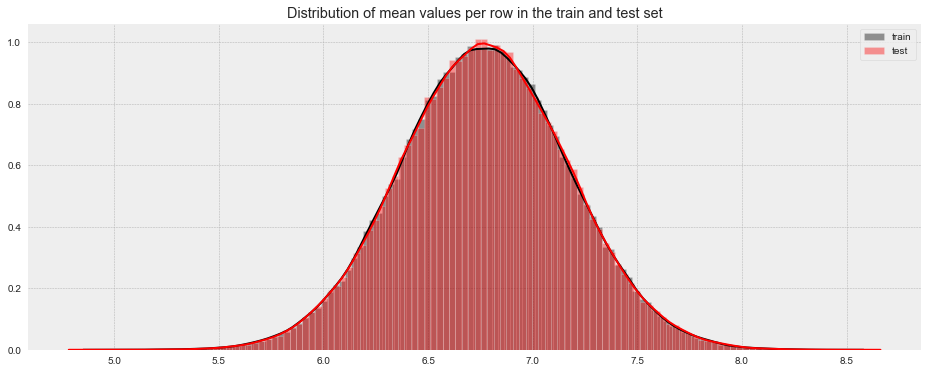

In [95]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train and test set");
sns.distplot(dt.mean(axis=1),color="black", kde=True,bins=120, label='train');
sns.distplot(dtt.mean(axis=1),color="red", kde=True,bins=120, label='test');
plt.legend();
plt.show();

In [282]:
train.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [284]:
train.iloc[:,1:]

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...  var_190  var_191  var_192  var_193  var_194  \
0      -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227   
1       3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   
2      -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   
3      -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347   
4       6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876   
...        ...     ...  ...      ...      ...      ...      ...      ...   
199995 -0.6209  5.6669  ...   6.1415  13.2305   3.9901   0.9388  18.0249   
199996 -3.6797  6.0019  ...   4.9611   4.6549   0.6998   1.8341  22.2717   
199997  0.1202  6.1629  ...   4.0651   5.4414   3.1032   4.8793  23.5311   
199998 -2.1926  8.7542  ...   2.6840   8.6587   2.7337  11.1178  20.4158   
199999 -0.4541  9.3688  ...   8.9842   1.6893   0.1276   0.3766  15.2101   

        var_195  var_196  var_197  var_198  var_199  
0       -2.3978   7.8784   8.5635  12.7803  -1.0914  
1        2.0339   8.1267   8.7889  18.3560   1.9518  
2        3.1417  -6.5213   8.2675  14.7222   0.3965  
3       -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4       -1.5121   3.9267   9.5031  17.9974  -8.8104  
...         ...      ...      ...      ...      ...  
199995  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[200000 rows x 200 columns]

In [285]:
dt.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

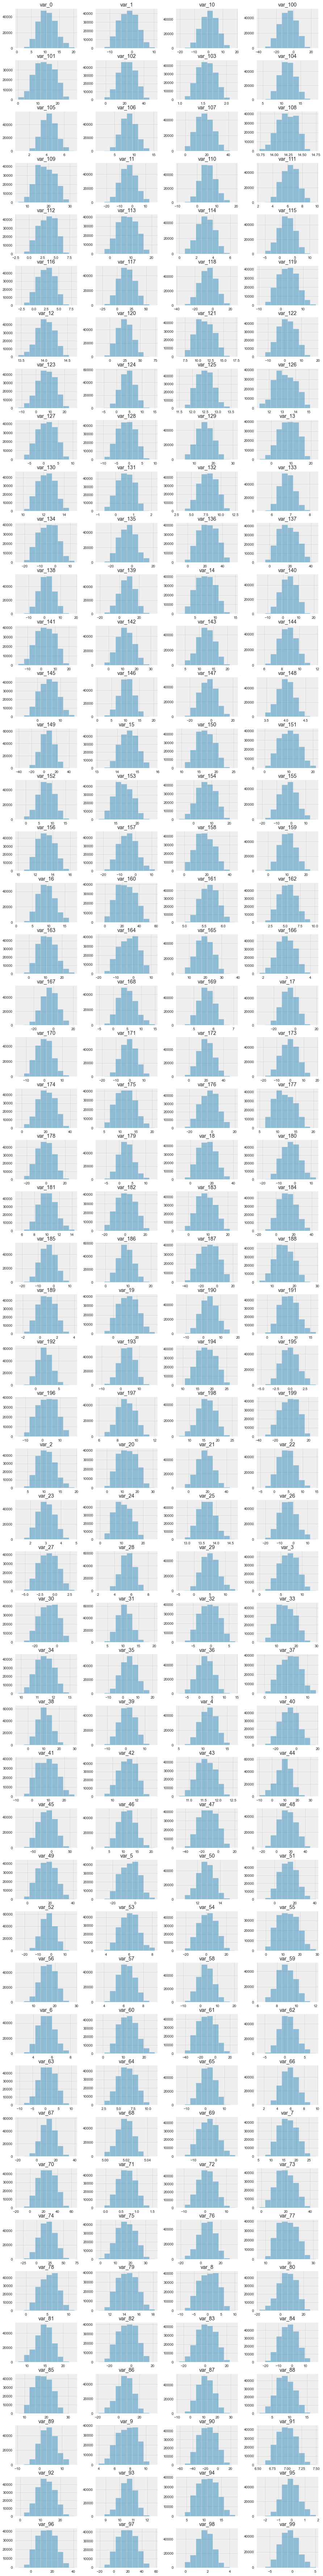

<Figure size 720x720 with 0 Axes>

In [286]:
#dt = pd.DataFrame(train.iloc[:,1:])
fig, ax = plt.subplots(figsize=(15, 130))
fig = dt.hist(alpha=0.5, ax=ax, layout=(50, 4))
plt.show()
plt.savefig('allhistogram.png')

- From the above plot it should almost all the variables or features show the normal distribution without much skewed distribution in any of the independent variables.

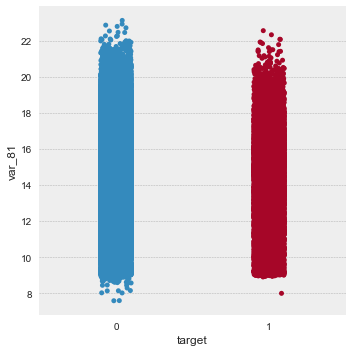

In [96]:
sns.catplot(x="target", y="var_81", data=train);

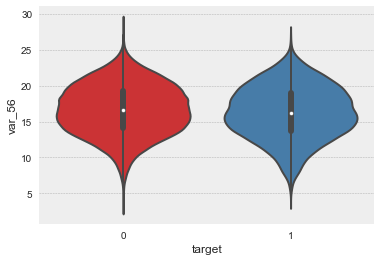

In [97]:
sns.violinplot(x="target", y="var_56", data=train,palette='Set1');

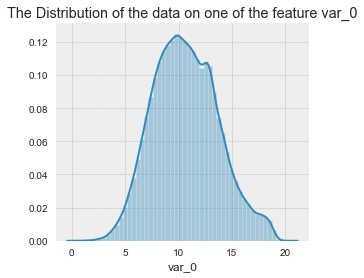

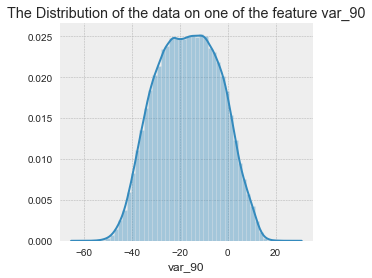

In [278]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train['var_0'],hist=True,kde=True)
plt.title('The Distribution of the data on one of the feature var_0');
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
sns.distplot(train['var_90'],hist=True,kde=True)
plt.title('The Distribution of the data on one of the feature var_90');

- Two of the features following nearly normal distribution

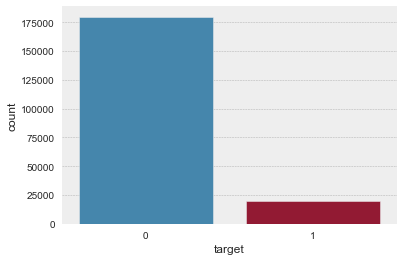

In [98]:
sns.countplot(train['target'])

- The above plot shows the target column has more 1's than 0's implying this dataset is imbalanced and also says that it contains almost 90% of the Yes or 0 values than No or 1 values consisting only <10% of the data. So this should be balanced before model building for making more accurate predictions else there is chance that more predictions go on the majority value and ignore the other as rare case.

### Splitting the data into train and validation set
- Instead of traditional train_test split I am using Stratified K fold sampling for splitting the dataset into train and validation set
- This method is more effective and accurate than the train test split

In [99]:
#Spliting the data 
#Training Data
x=train.drop(['target'],axis=1)
y=train['target']

#Stratified KFold Cross Validation sampling
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for t, v in skf.split(x,y): 
    x_train, x_valid = x.iloc[t], x.iloc[v] 
    y_train, y_valid = y.iloc[t], y.iloc[v]
    
print('Shape of x_train :',x_train.shape)
print('Shape of x_valid :',x_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of x_train : (160000, 200)
Shape of x_valid : (40000, 200)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


In [100]:
train_clean.shape

(200000, 131)

In [101]:
#Spliting the data 
#Training Data
x1=train_clean.drop(['target'],axis=1)
y1=train_clean['target']

#Stratified KFold Cross Validation sampling
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for t, v in skf.split(x1,y1): 
    x1_train, x1_valid = x1.iloc[t], x1.iloc[v] 
    y1_train, y1_valid = y1.iloc[t], y1.iloc[v]
    
print('Shape of x_train :',x1_train.shape)
print('Shape of x_valid :',x1_valid.shape)
print('Shape of y_train :',y1_train.shape)
print('Shape of y_valid :',y1_valid.shape)

Shape of x_train : (160000, 130)
Shape of x_valid : (40000, 130)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


#### Imbalanced to balanced dataset using SMOTE

- SMOTE ( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model

In [102]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=10)
#Generating synthetic data points
x_smote,y_smote=sm.fit_sample(x_train,y_train)
xv_smote,yv_smote=sm.fit_sample(x_valid,y_valid)

Wall time: 4min 39s


In [103]:
x_train.shape
x_smote.shape

(160000, 200)

(287844, 200)

In [131]:
y_train.shape

(160000,)

In [104]:
y_smote.value_counts()

1    143922
0    143922
Name: target, dtype: int64

In [105]:
yv_smote.value_counts()

1    35980
0    35980
Name: target, dtype: int64

In [106]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=10)
#Generating synthetic data points
x1_smote,y1_smote=sm.fit_sample(x1_train,y1_train)
xv1_smote,yv1_smote=sm.fit_sample(x1_valid,y1_valid)

Wall time: 3min 25s


In [107]:
x1_train.shape
x1_smote.shape

(160000, 130)

(287844, 130)

In [108]:
y1_smote.value_counts()
yv1_smote.value_counts()

1    143922
0    143922
Name: target, dtype: int64

1    35980
0    35980
Name: target, dtype: int64

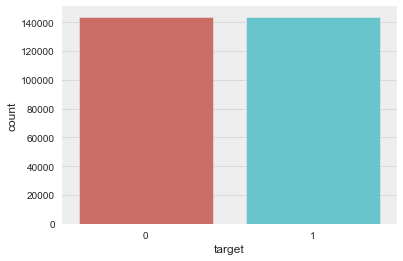

In [109]:
sns.countplot(y_smote, palette='hls')

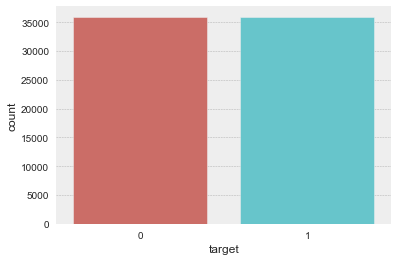

In [110]:
sns.countplot(yv1_smote, palette='hls')

### Model building

#### Logistic regression

In [111]:
#Logistic regression model
modellog1=LogisticRegression(random_state=10)
#fitting the model:-
modellog1.fit(x1_smote,y1_smote)

LogisticRegression(random_state=10)

In [112]:
%%time
#Cross validation prediction
modellog_pred1=cross_val_predict(modellog1,xv1_smote,yv1_smote,cv=5)
#Cross validation score:-
cv_score1=cross_val_score(modellog1,x1_smote,y1_smote,cv=5)
print('Cross validation score for Logistic Regression:',np.average(cv_score1))

Cross validation score for Logistic Regression: 0.7512958382319108
Wall time: 56.4 s


In [113]:
print(modellog_pred1)

[1 1 0 ... 1 1 0]


In [114]:
%%time
#Confusion matrix:-
cm_log1=confusion_matrix(yv1_smote,modellog_pred1)
cm_log1=pd.crosstab(yv1_smote,modellog_pred1)

Wall time: 478 ms


In [115]:
cm_log1

col_0       0      1
target              
0       26576   9404
1        8680  27300

In [116]:
#ROC_AUC SCORE:-
logroc_score1=roc_auc_score(yv1_smote,modellog_pred1)
print('Logistic model ROC score:',logroc_score1)

Logistic model ROC score: 0.7486937187326292


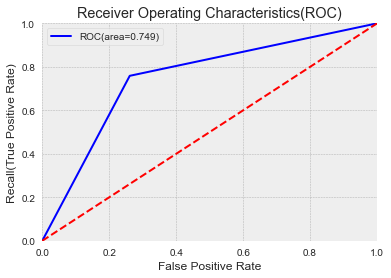

AUC: 0.7486937187326292


In [117]:
#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(yv1_smote,modellog_pred1);
logroc_auc1=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %logroc_auc1);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC:',logroc_auc1);

In [118]:
#Classification Report:-
log_scores1=classification_report(yv1_smote,modellog_pred1)
print(log_scores1)

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     35980
           1       0.74      0.76      0.75     35980

    accuracy                           0.75     71960
   macro avg       0.75      0.75      0.75     71960
weighted avg       0.75      0.75      0.75     71960



#### Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier
modeldt=DecisionTreeClassifier(random_state=0,max_depth=4)
modeldt.fit(x_smote,y_smote)
modeldt_pred=cross_val_predict(modeldt,xv_smote,yv_smote,cv=5)
#Cross validation score:-
cv_score_dt=cross_val_score(modeldt,x_smote,y_smote,cv=5,scoring='accuracy')
print('Cross validation score for Decision Tree Classifier:',np.average(cv_score_dt))

DecisionTreeClassifier(max_depth=4, random_state=0)

Cross validation score for Decision Tree Classifier: 0.6057517560241001


In [120]:
#Confusion matrix:-
cm_dt=confusion_matrix(yv_smote,modeldt_pred)
cm_dt=pd.crosstab(yv_smote,modeldt_pred)
#ROC_AUC SCORE:-
dt_roc_score=roc_auc_score(yv_smote,modeldt_pred)
print('Decision Tree Classifier ROC score:',dt_roc_score)

Decision Tree Classifier ROC score: 0.6204697053918844


In [121]:
#Classification Report:-
dt_scores=classification_report(yv_smote,modeldt_pred)
print(dt_scores)

              precision    recall  f1-score   support

           0       0.64      0.56      0.60     35980
           1       0.61      0.68      0.64     35980

    accuracy                           0.62     71960
   macro avg       0.62      0.62      0.62     71960
weighted avg       0.62      0.62      0.62     71960



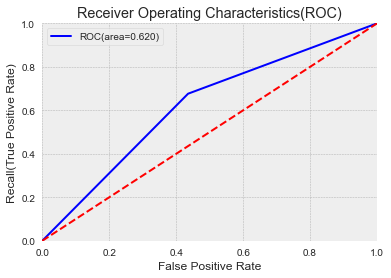

AUC: 0.6204697053918844


In [122]:
#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(yv_smote,modeldt_pred);
dtroc_auc=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %dtroc_auc);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC:',dtroc_auc);

In [209]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from IPython.display import Image

True

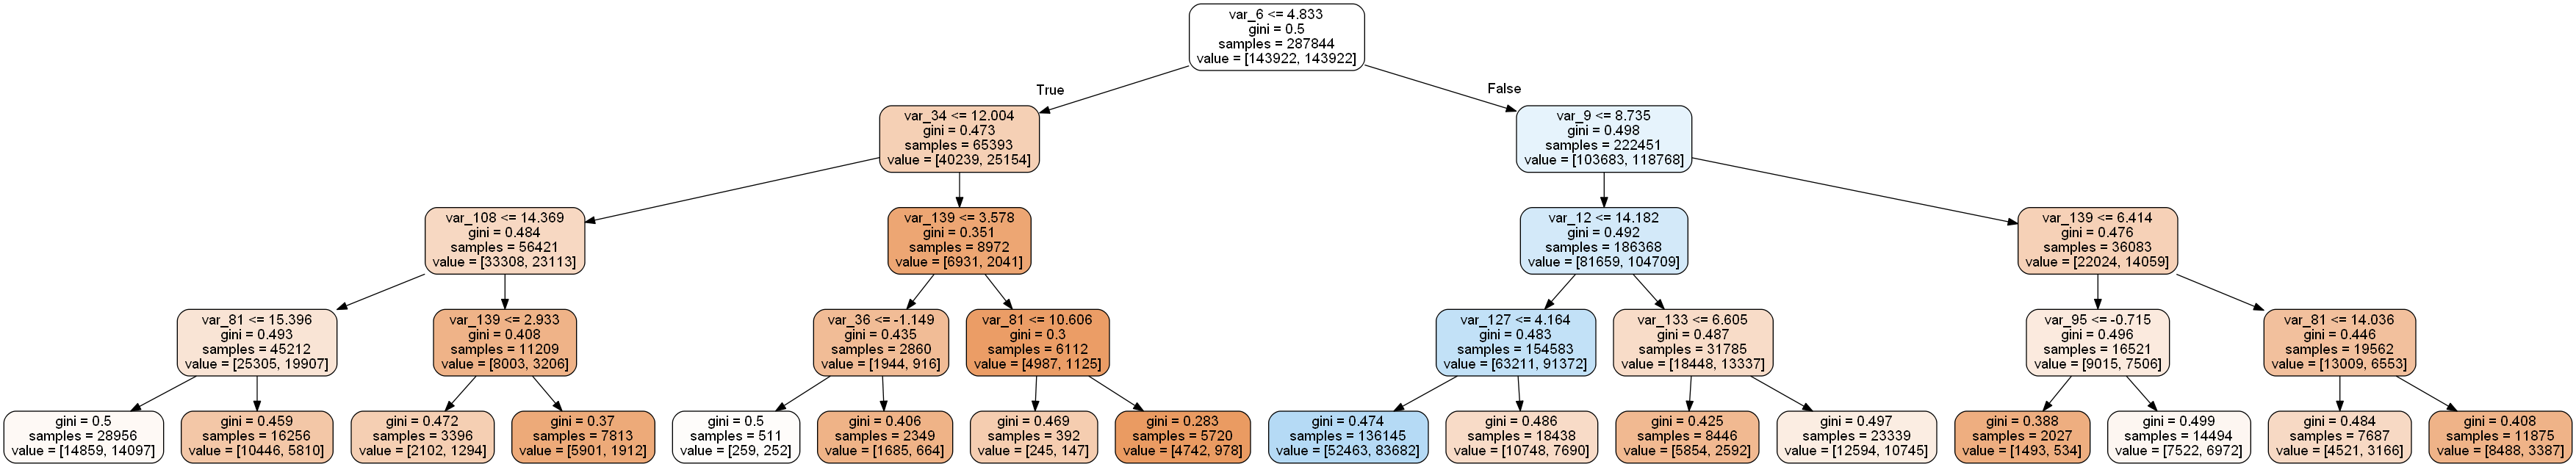

In [124]:
feature_name=list(x_smote.columns)
class_name = list(y_smote.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(modeldt,rounded = True,filled = True,feature_names=feature_name)
                           #class_names=class_name)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [125]:
from sklearn.tree import DecisionTreeClassifier
modeldt1=DecisionTreeClassifier(random_state=0,max_depth=4)
modeldt1.fit(x1_smote,y1_smote)
modeldt_pred1=cross_val_predict(modeldt1,xv1_smote,yv1_smote,cv=5)
print(modeldt_pred1)
#Cross validation score:-
cv_score_dt1=cross_val_score(modeldt1,x1_smote,y1_smote,cv=5,scoring='accuracy')
print('Cross validation score for Decision Tree Classifier:',np.average(cv_score_dt1))

DecisionTreeClassifier(max_depth=4, random_state=0)

[1 1 0 ... 0 1 1]
Cross validation score for Decision Tree Classifier: 0.6088541388514415


#### Naive Bayes Classifier

In [247]:
from sklearn.preprocessing import StandardScaler
scaled = pd.DataFrame(StandardScaler().fit_transform(x_train),columns=x_train.columns)

In [248]:
plt.rcParams['figure.figsize'] = (10, 10)
title_config = {'fontsize': 20, 'y': 1.05}

In [254]:
scaled.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0 -0.577863 -1.272762  0.452255 -0.834495  0.236287 -0.536701 -0.335812   
1 -0.277959  0.037224  0.818540 -0.078348  0.738627  0.955509  0.613295   
2  0.946503 -1.569645  1.198657  0.392133 -1.490309  0.749764  0.322834   
3  1.785307  1.007071  1.218781 -0.570272 -1.399808  1.427949 -1.106485   
4  0.601254  0.891386 -0.689271 -0.659326  1.555106 -1.427359  0.755580   

      var_7     var_8     var_9  ...   var_190   var_191   var_192   var_193  \
0  0.607346 -1.561602 -1.472136  ...  0.263238 -1.149427  0.816261 -0.411061   
1  0.789934  1.793999  0.090516  ... -1.035812  0.688845 -1.405162  1.466080   
2  1.688500  1.433791 -0.298893  ...  2.177999 -0.294365  1.393512  0.618450   
3 -1.859472 -1.042065  1.226703  ... -0.395637  2.418750 -0.195314 -0.479335   
4  0.085530 -0.047001  0.324986  ... -0.587560 -0.371473 -0.602403  0.088671   

    var_194   var_195   var_196   var_197   var_198   var_199  
0  0.168978 -1.579379  1.021353 -0.374179 -1.025136  0.213701  
1 -1.500369 -0.959728  0.296479  0.644295  0.707302 -0.524966  
2  1.641546 -0.166013  0.349876  0.558229 -2.392565  0.651217  
3 -1.006303 -1.296874 -0.620689 -0.770902  1.210055  0.781811  
4 -1.007132  0.410682  2.167868 -1.078959  0.122894  1.681925  

[5 rows x 200 columns]

In [263]:
from sklearn.preprocessing import QuantileTransformer
transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(x_smote))

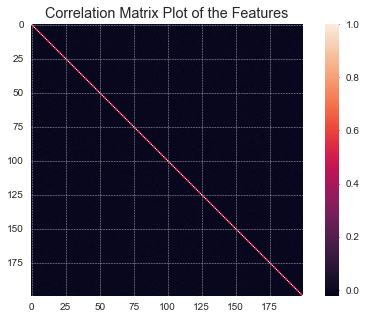

In [112]:
plt.figure(figsize=(8,5))
plt.imshow(transformed.corr())
plt.colorbar()
plt.title('Correlation Matrix Plot of the Features');

- The correlation matrix plot above shows very small correlation coefficients between the features

Cross validation score for Guassian Naive Bayes Classifier: 0.8636137867128264


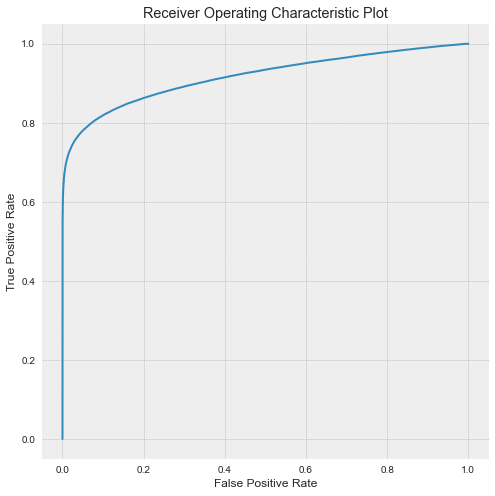

In [241]:
nbpipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
nbpipeline.fit(x_smote, y_smote)
modelnb_pred=cross_val_predict(nbpipeline,xv_smote,yv_smote,cv=5)
#Cross validation score:-
cv_score_nb=cross_val_score(nbpipeline,x_smote,y_smote,cv=5,scoring='accuracy');
print('Cross validation score for Guassian Naive Bayes Classifier:',np.average(cv_score_nb))
plt.figure(figsize=(8,8));
fpr, tpr, thr = roc_curve(y_smote, nbpipeline.predict_proba(x_smote)[:,1]);
plt.plot(fpr, tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Receiver Operating Characteristic Plot');
auc(fpr, tpr);
#cross_val_score(nbpipeline, x_smote, y_smote, scoring='roc_auc', cv=10).mean();

In [114]:
#Confusion matrix:-
cm_nb=confusion_matrix(yv_smote,modelnb_pred)
cm_nb=pd.crosstab(yv_smote,modelnb_pred)
print(cm_nb)
#ROC_AUC SCORE:-
nb_roc_score=roc_auc_score(yv_smote,modelnb_pred)
print('Gaussian Naive Bayes Classifier ROC score:',nb_roc_score)

col_0       0      1
target              
0       34576   1404
1        8270  27710
Gaussian Naive Bayes Classifier ROC score: 0.8655642023346304


In [115]:
#Classification Report:-
nb_scores=classification_report(yv_smote,modelnb_pred)
print(nb_scores)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     35980
           1       0.95      0.77      0.85     35980

    accuracy                           0.87     71960
   macro avg       0.88      0.87      0.86     71960
weighted avg       0.88      0.87      0.86     71960



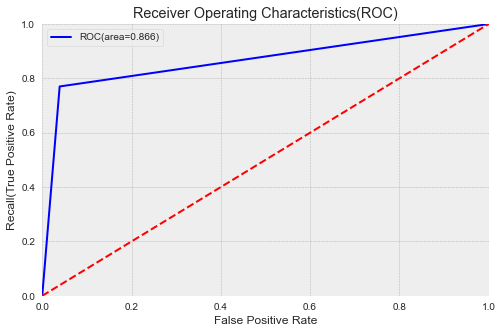

AUC for Random Forest Classifier model: 0.8655642023346304


In [116]:
#ROC_AUC curve
plt.figure(figsize=(8,5))
false_positive_rate,recall,thresholds=roc_curve(yv_smote,modelnb_pred);
nbroc_auc=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %nbroc_auc);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for Random Forest Classifier model:',nbroc_auc);

Cross validation score for Guassian Naive Bayes Classifier: 0.8432173109285557


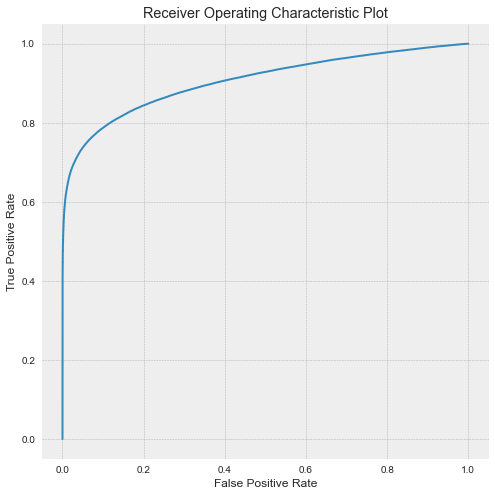

In [242]:
nbpipeline1 = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
nbpipeline1.fit(x1_smote, y1_smote)
modelnb_pred1=cross_val_predict(nbpipeline1,xv1_smote,yv1_smote,cv=5)
#Cross validation score:-
cv_score_nb1=cross_val_score(nbpipeline1,x1_smote,y1_smote,cv=5,scoring='accuracy');
print('Cross validation score for Guassian Naive Bayes Classifier:',np.average(cv_score_nb1))
plt.figure(figsize=(8,8));
fpr, tpr, thr = roc_curve(y1_smote, nbpipeline1.predict_proba(x1_smote)[:,1]);
plt.plot(fpr, tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Receiver Operating Characteristic Plot');
auc(fpr, tpr);
#cross_val_score(nbpipeline1, x1_smote, y1_smote, scoring='roc_auc', cv=10).mean();

In [118]:
#Confusion matrix:-
cm_nb1=confusion_matrix(yv1_smote,modelnb_pred1)
cm_nb1=pd.crosstab(yv1_smote,modelnb_pred1)
print(cm_nb1)
#ROC_AUC SCORE:-
nb_roc_score1=roc_auc_score(yv1_smote,modelnb_pred1)
print('Gaussian Naive Bayes Classifier ROC score on 130 features:',nb_roc_score1)

col_0       0      1
target              
0       32923   3057
1        8275  27705
Gaussian Naive Bayes Classifier ROC score on 130 features: 0.8425236242356865


In [119]:
#Classification Report:-
nb_scores1=classification_report(yv1_smote,modelnb_pred1)
print(nb_scores1)

              precision    recall  f1-score   support

           0       0.80      0.92      0.85     35980
           1       0.90      0.77      0.83     35980

    accuracy                           0.84     71960
   macro avg       0.85      0.84      0.84     71960
weighted avg       0.85      0.84      0.84     71960



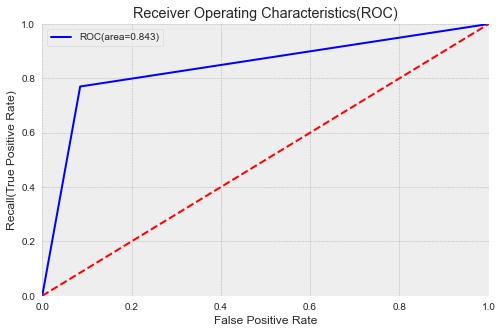

AUC for Naive Classifier model for best features: 0.8425236242356865


In [120]:
#ROC_AUC curve
plt.figure(figsize=(8,5))
false_positive_rate,recall,thresholds=roc_curve(yv1_smote,modelnb_pred1);
nb1roc_auc=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %nb1roc_auc);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for Naive Classifier model for best features:',nb1roc_auc);

#### Random Forest

In [137]:
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(x_smote,y_smote)
rf_pred=rf_model.predict(xv_smote)
#print(rf_pred)
#Cross validation score:-
cv_score_rf=cross_val_score(rf_model,x_smote,y_smote,cv=5,scoring='accuracy')
print('Cross validation score for Random Forest Classifier:',np.average(cv_score_rf))
modelrf_pred=cross_val_predict(rf_model,xv_smote,yv_smote,cv=5)

RandomForestClassifier(n_estimators=10, random_state=42)

Cross validation score for Random Forest Classifier: 0.9079744957258482


In [138]:
#Confusion matrix:-
cm_rf=confusion_matrix(yv_smote,modelrf_pred)
cm_rf=pd.crosstab(yv_smote,modelrf_pred)
#ROC_AUC SCORE:-
rf_roc_score=roc_auc_score(yv_smote,modelrf_pred)
print('Random Forest Classifier ROC score:',rf_roc_score)

Random Forest Classifier ROC score: 0.9182879377431906


In [139]:
#Classification Report:-
rf_scores=classification_report(yv_smote,modelrf_pred)
print(rf_scores)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     35980
           1       0.94      0.89      0.92     35980

    accuracy                           0.92     71960
   macro avg       0.92      0.92      0.92     71960
weighted avg       0.92      0.92      0.92     71960



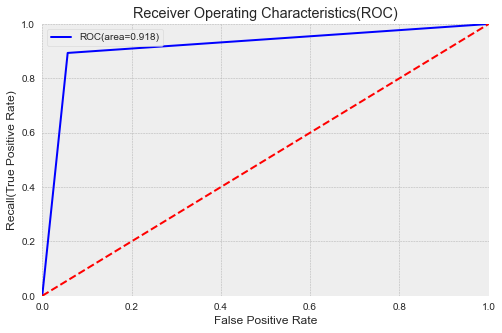

AUC for Random Forest Classifier model: 0.9182879377431906


In [140]:
#ROC_AUC curve
plt.figure(figsize=(8,5))
false_positive_rate,recall,thresholds=roc_curve(yv_smote,modelrf_pred);
rfroc_auc=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %rfroc_auc);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for Random Forest Classifier model:',rfroc_auc);

In [141]:
features=pd.DataFrame()
features['Features']=x.columns
features['Support']=rf_model.feature_importances_
features.sort_values('Support',ascending=False,inplace=True)
features.set_index('Features',inplace=True)

In [142]:
features

Support
Features          
var_6     0.012871
var_94    0.011005
var_146   0.011003
var_9     0.010985
var_53    0.010825
...            ...
var_60    0.003363
var_74    0.003360
var_54    0.003295
var_120   0.003209
var_117   0.003081

[200 rows x 1 columns]

In [143]:
features.shape

(200, 1)

<Figure size 1080x936 with 0 Axes>

<Figure size 1080x936 with 0 Axes>

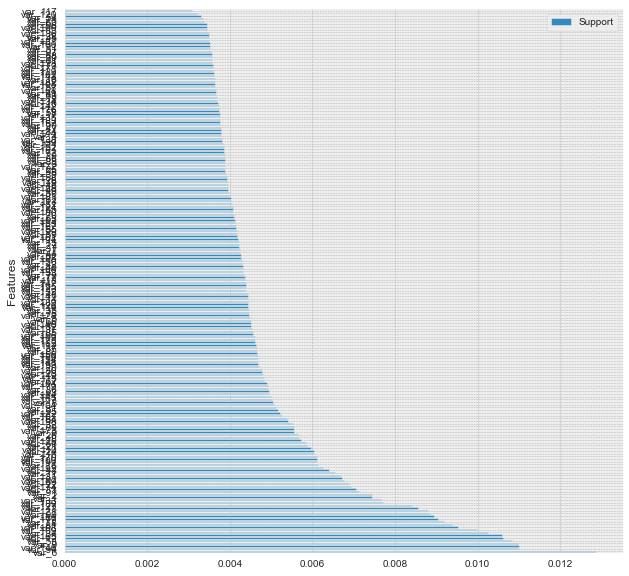

In [144]:
plt.figure(figsize=(15,13))
features.plot(kind='barh')

In [145]:
rf1_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf1_model.fit(x1_smote,y1_smote)
rf_pred1=rf1_model.predict(xv1_smote)
#print(rf_pred1)
#Cross validation score:-
cv1_score_rf=cross_val_score(rf1_model,x1_smote,y1_smote,cv=5,scoring='accuracy')
print('Cross validation score for Random Forest Classifier for best features:',np.average(cv1_score_rf))
modelrf_pred1=cross_val_predict(rf1_model,xv1_smote,yv1_smote,cv=5)

RandomForestClassifier(n_estimators=10, random_state=42)

Cross validation score for Random Forest Classifier for best features: 0.8989800428576267


In [146]:
#Confusion matrix:-
cm_rf1=confusion_matrix(yv1_smote,modelrf_pred1)
cm_rf1=pd.crosstab(yv1_smote,modelrf_pred1)
#ROC_AUC SCORE:-
rf1_roc_score=roc_auc_score(yv1_smote,modelrf_pred1)
print('Random Forest Classifier ROC score:',rf1_roc_score)

Random Forest Classifier ROC score: 0.9094635908838243


<Figure size 504x360 with 0 Axes>

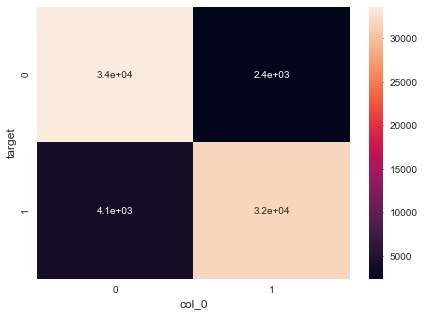

In [172]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf1, annot=True)

In [148]:
#Classification Report:-
rf_scores1=classification_report(yv1_smote,modelrf_pred1)
print(rf_scores1)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     35980
           1       0.93      0.89      0.91     35980

    accuracy                           0.91     71960
   macro avg       0.91      0.91      0.91     71960
weighted avg       0.91      0.91      0.91     71960



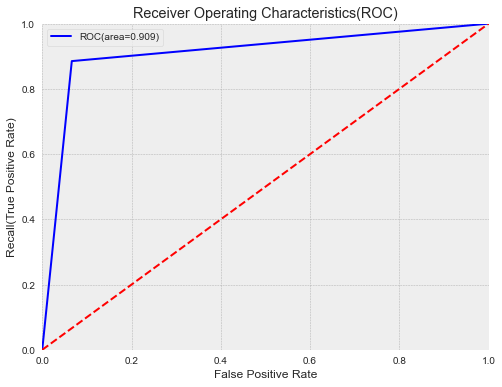

AUC for Random Forest Classifier model: 0.9094635908838243


In [149]:
#ROC_AUC curve
plt.figure(figsize=(8,6))
false_positive_rate,recall,thresholds=roc_curve(yv1_smote,modelrf_pred1);
rf1roc_auc=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %rf1roc_auc);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for Random Forest Classifier model:',rf1roc_auc);

In [150]:
features1=pd.DataFrame()
features1['Features']=x1.columns
features1['Support']=rf1_model.feature_importances_
features1.sort_values('Support',ascending=False,inplace=True)
features1.set_index('Features',inplace=True)

In [151]:
features1

Support
Features          
var_81    0.016380
var_6     0.016019
var_53    0.014738
var_34    0.014596
var_94    0.013895
...            ...
var_97    0.005455
var_158   0.005436
var_96    0.005400
var_19    0.005391
var_160   0.004829

[130 rows x 1 columns]

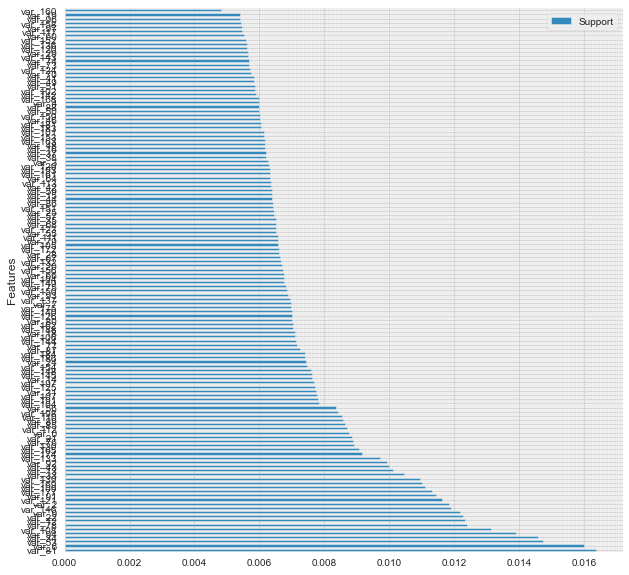

In [152]:
#plt.figure(figsize=(15,13))
features1.plot(kind='barh');
plt.rcParams['figure.figsize']=[25,14];
plt.show();

#### XG Boost

In [121]:
xgbmodel = XGBClassifier(learning_rate =0.1,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,\
                      colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
#xgbmodel.fit(x_smote,y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [122]:
cv_score_xgb=cross_val_score(xgbmodel,x_smote,y_smote,cv=5,scoring='accuracy')
print('Cross validation score for XGBoost Classifier:',np.average(cv_score_xgb))
xgb_pred=cross_val_predict(xgbmodel,xv_smote,yv_smote,cv=5)

Cross validation score for XGBoost Classifier: 0.8609351952488442


In [123]:
#Confusion matrix:-
cm_xgb=confusion_matrix(yv_smote,xgb_pred)
cm_xgb=pd.crosstab(yv_smote,xgb_pred)
#ROC_AUC SCORE:-
xgb_roc_score=roc_auc_score(yv_smote,xgb_pred)
print('XGBoost Classifier ROC score:',xgb_roc_score)

XGBoost Classifier ROC score: 0.8934130072262368


In [124]:
#Classification Report:-
xgb_scores=classification_report(yv_smote,xgb_pred)
print(xgb_scores)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     35980
           1       0.90      0.89      0.89     35980

    accuracy                           0.89     71960
   macro avg       0.89      0.89      0.89     71960
weighted avg       0.89      0.89      0.89     71960



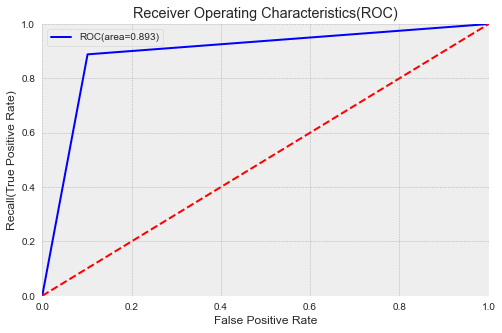

AUC for XGBoost Classifier model: 0.8934130072262368


In [125]:
#ROC_AUC curve
plt.figure(figsize=(8,5))
false_positive_rate,recall,thresholds=roc_curve(yv_smote,xgb_pred);
xgbroc_auc=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %xgbroc_auc);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for XGBoost Classifier model:',xgbroc_auc);

In [126]:
xgbmodel1 = XGBClassifier(learning_rate =0.1,n_estimators=100,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,\
                      colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgbmodel1.fit(x1_smote,y1_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [127]:
cv_score_xgb1=cross_val_score(xgbmodel1,x1_smote,y1_smote,cv=5,scoring='accuracy')
print('Cross validation score for XGBoost Classifier for best features:',np.average(cv_score_xgb1))
xgb_pred1=cross_val_predict(xgbmodel1,xv1_smote,yv1_smote,cv=5)

Cross validation score for XGBoost Classifier for best features: 0.8394061692274223


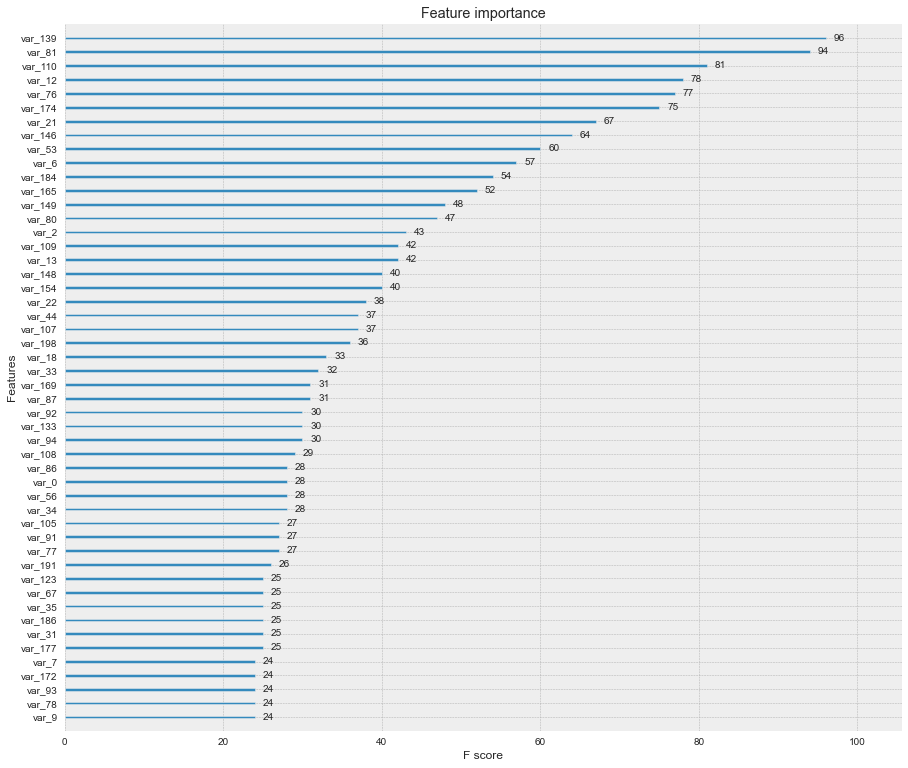

In [210]:
#plt.figure(figsize=(10,8))
xgb.plot_importance(xgbmodel1,max_num_features=50);
plt.rcParams['figure.figsize']=[25,13]
plt.show();

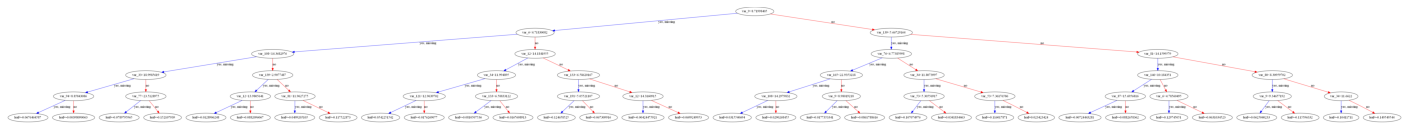

In [211]:
#plt.figure(figsize=(15,13));
xgb.plot_tree(xgbmodel1);
plt.rcParams['figure.figsize']=[50,10]
plt.show();

In [212]:
#Confusion matrix:-
cm_xgb1=confusion_matrix(yv1_smote,xgb_pred1)
cm_xgb1=pd.crosstab(yv1_smote,xgb_pred1)
#ROC_AUC SCORE:-
xgb_roc_score1=roc_auc_score(yv1_smote,xgb_pred1)
print('XGBoost Classifier ROC score for best features:',xgb_roc_score1)

XGBoost Classifier ROC score for best features: 0.8714007782101167


In [213]:
#Classification Report:-
xgb_scores1=classification_report(yv1_smote,xgb_pred1)
print(xgb_scores1)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     35980
           1       0.87      0.88      0.87     35980

    accuracy                           0.87     71960
   macro avg       0.87      0.87      0.87     71960
weighted avg       0.87      0.87      0.87     71960



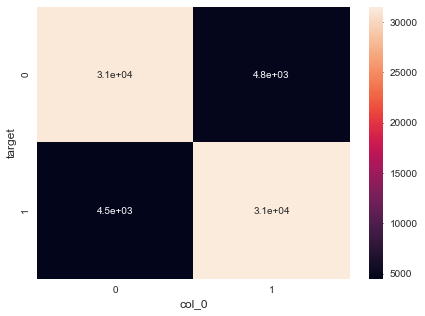

In [214]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_xgb1, annot=True);

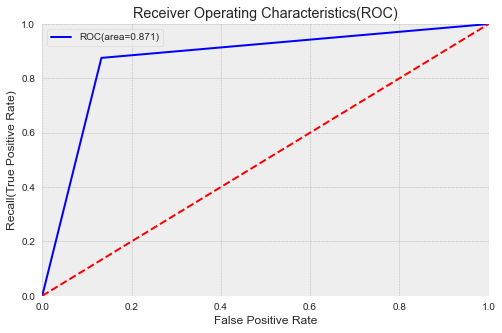

AUC for XGBoost Classifier model: 0.8714007782101167


In [215]:
#ROC_AUC curve
plt.figure(figsize=(8,5))
false_positive_rate,recall,thresholds=roc_curve(yv1_smote,xgb_pred1);
xgbroc_auc1=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC)');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %xgbroc_auc1);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for XGBoost Classifier model:',xgbroc_auc1);

#### Stacking model(with sgd,rfc and gnb classifiers)

In [123]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
gnb = GaussianNB(priors = [0.5,0.5],var_smoothing=7.05480231071866e-14)
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=1000,tol=1e-3,alpha = 6.4280731172843194e-06,n_jobs=-1) 
rfc = RandomForestClassifier(max_depth=6,min_samples_split=3,max_features='auto',criterion='entropy',n_jobs=-1)

clf = StackingClassifier(classifiers=[sgd,rfc], meta_classifier=gnb,verbose=8)

In [106]:
clf.fit(x1_smote,y1_smote)
stack_cv_score1=cross_val_score(clf,x1_smote,y1_smote,cv=5,scoring='accuracy')
print('Cross validation score for Stacking model:',np.average(stack_cv_score1))
#stack_pred=cross_val_predict(clf,xv1_smote,yv1_smote,cv=5)
stack_pred1 = cross_val_predict(clf,xv1_smote,yv1_smote,cv=5)
#print('train auc score : '+str(roc_auc_score(y1_smote,y_train_pred)))
print('Test auc score : '+str(roc_auc_score(yv1_smote,stack_pred1)))
print(stack_pred1)

Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 4141.92, NNZs: 130, Bias: 298.131188, T: 287844, Avg. loss: 7983.017585
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 2614.60, NNZs: 130, Bias: 318.269535, T: 575688, Avg. loss: 1425.905803
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 1998.30, NNZs: 130, Bias: 329.232522, T: 863532, Avg. loss: 834.962986
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 1672.15, NNZs: 130, Bias: 338.995563, T: 1151376, Avg. loss: 592.326004
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 1424.18, NNZs: 130, Bias: 346.064922, T: 1439220, Avg. loss: 460.671790
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 1258.69, NNZs: 130, Bias: 351.541995, T: 1727064, Avg. loss: 377.133727
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 1130.54, NNZs: 130, Bias: 356.488770, T: 2014908, Avg. loss: 318.3865

-- Epoch 67
Norm: 195.89, NNZs: 130, Bias: 417.992624, T: 19285548, Avg. loss: 31.574723
Total training time: 8.77 seconds.
-- Epoch 68
Norm: 193.84, NNZs: 130, Bias: 418.296485, T: 19573392, Avg. loss: 30.901889
Total training time: 8.90 seconds.
-- Epoch 69
Norm: 190.81, NNZs: 130, Bias: 418.580464, T: 19861236, Avg. loss: 30.643976
Total training time: 9.04 seconds.
-- Epoch 70
Norm: 189.23, NNZs: 130, Bias: 418.821518, T: 20149080, Avg. loss: 30.111772
Total training time: 9.16 seconds.
-- Epoch 71
Norm: 187.28, NNZs: 130, Bias: 419.097516, T: 20436924, Avg. loss: 29.788872
Total training time: 9.29 seconds.
-- Epoch 72
Norm: 185.35, NNZs: 130, Bias: 419.384700, T: 20724768, Avg. loss: 29.186785
Total training time: 9.39 seconds.
-- Epoch 73
Norm: 183.42, NNZs: 130, Bias: 419.660561, T: 21012612, Avg. loss: 28.907966
Total training time: 9.51 seconds.
-- Epoch 74
Norm: 181.54, NNZs: 130, Bias: 419.903075, T: 21300456, Avg. loss: 28.552201
Total training time: 9.62 seconds.
-- Epoch

Norm: 121.99, NNZs: 130, Bias: 428.480787, T: 38283252, Avg. loss: 16.026652
Total training time: 17.25 seconds.
-- Epoch 134
Norm: 121.27, NNZs: 130, Bias: 428.557737, T: 38571096, Avg. loss: 15.875494
Total training time: 17.37 seconds.
-- Epoch 135
Norm: 120.67, NNZs: 130, Bias: 428.650085, T: 38858940, Avg. loss: 15.815667
Total training time: 17.49 seconds.
-- Epoch 136
Norm: 120.05, NNZs: 130, Bias: 428.725880, T: 39146784, Avg. loss: 15.666167
Total training time: 17.64 seconds.
-- Epoch 137
Norm: 119.60, NNZs: 130, Bias: 428.785257, T: 39434628, Avg. loss: 15.581758
Total training time: 17.76 seconds.
-- Epoch 138
Norm: 119.10, NNZs: 130, Bias: 428.863893, T: 39722472, Avg. loss: 15.435276
Total training time: 17.86 seconds.
-- Epoch 139
Norm: 118.41, NNZs: 130, Bias: 428.930156, T: 40010316, Avg. loss: 15.342425
Total training time: 17.99 seconds.
-- Epoch 140
Norm: 117.80, NNZs: 130, Bias: 428.999853, T: 40298160, Avg. loss: 15.299512
Total training time: 18.11 seconds.
-- Ep

Norm: 88.71, NNZs: 130, Bias: 431.300294, T: 57280956, Avg. loss: 10.855920
Total training time: 25.67 seconds.
-- Epoch 200
Norm: 88.30, NNZs: 130, Bias: 431.313847, T: 57568800, Avg. loss: 10.828477
Total training time: 25.79 seconds.
-- Epoch 201
Norm: 87.97, NNZs: 130, Bias: 431.340800, T: 57856644, Avg. loss: 10.774276
Total training time: 25.90 seconds.
-- Epoch 202
Norm: 87.49, NNZs: 130, Bias: 431.356877, T: 58144488, Avg. loss: 10.717343
Total training time: 26.01 seconds.
-- Epoch 203
Norm: 87.21, NNZs: 130, Bias: 431.372879, T: 58432332, Avg. loss: 10.669334
Total training time: 26.12 seconds.
-- Epoch 204
Norm: 86.81, NNZs: 130, Bias: 431.383484, T: 58720176, Avg. loss: 10.599244
Total training time: 26.24 seconds.
-- Epoch 205
Norm: 86.54, NNZs: 130, Bias: 431.391416, T: 59008020, Avg. loss: 10.550764
Total training time: 26.35 seconds.
-- Epoch 206
Norm: 86.22, NNZs: 130, Bias: 431.399326, T: 59295864, Avg. loss: 10.511455
Total training time: 26.47 seconds.
-- Epoch 207


Norm: 66.85, NNZs: 130, Bias: 431.730875, T: 76278660, Avg. loss: 8.323166
Total training time: 33.03 seconds.
-- Epoch 266
Norm: 66.61, NNZs: 130, Bias: 431.718660, T: 76566504, Avg. loss: 8.268710
Total training time: 33.15 seconds.
-- Epoch 267
Norm: 66.32, NNZs: 130, Bias: 431.714620, T: 76854348, Avg. loss: 8.218910
Total training time: 33.25 seconds.
-- Epoch 268
Norm: 66.03, NNZs: 130, Bias: 431.708575, T: 77142192, Avg. loss: 8.192543
Total training time: 33.37 seconds.
-- Epoch 269
Norm: 65.88, NNZs: 130, Bias: 431.708572, T: 77430036, Avg. loss: 8.202808
Total training time: 33.48 seconds.
-- Epoch 270
Norm: 65.50, NNZs: 130, Bias: 431.704548, T: 77717880, Avg. loss: 8.161397
Total training time: 33.59 seconds.
-- Epoch 271
Norm: 65.18, NNZs: 130, Bias: 431.704525, T: 78005724, Avg. loss: 8.114550
Total training time: 33.70 seconds.
-- Epoch 272
Norm: 64.84, NNZs: 130, Bias: 431.698543, T: 78293568, Avg. loss: 8.091104
Total training time: 33.81 seconds.
-- Epoch 273
Norm: 64

Norm: 50.17, NNZs: 130, Bias: 431.103424, T: 95852052, Avg. loss: 6.703146
Total training time: 40.56 seconds.
-- Epoch 334
Norm: 49.91, NNZs: 130, Bias: 431.093699, T: 96139896, Avg. loss: 6.676222
Total training time: 40.67 seconds.
-- Epoch 335
Norm: 49.75, NNZs: 130, Bias: 431.080776, T: 96427740, Avg. loss: 6.657021
Total training time: 40.78 seconds.
-- Epoch 336
Norm: 49.55, NNZs: 130, Bias: 431.064670, T: 96715584, Avg. loss: 6.665776
Total training time: 40.90 seconds.
-- Epoch 337
Norm: 49.38, NNZs: 130, Bias: 431.051826, T: 97003428, Avg. loss: 6.629236
Total training time: 41.00 seconds.
-- Epoch 338
Norm: 49.16, NNZs: 130, Bias: 431.042225, T: 97291272, Avg. loss: 6.627323
Total training time: 41.11 seconds.
-- Epoch 339
Norm: 48.94, NNZs: 130, Bias: 431.027861, T: 97579116, Avg. loss: 6.599094
Total training time: 41.22 seconds.
-- Epoch 340
Norm: 48.74, NNZs: 130, Bias: 431.016719, T: 97866960, Avg. loss: 6.570827
Total training time: 41.33 seconds.
-- Epoch 341
Norm: 48

Norm: 38.28, NNZs: 130, Bias: 430.127568, T: 114849756, Avg. loss: 5.687772
Total training time: 47.96 seconds.
-- Epoch 400
Norm: 38.18, NNZs: 130, Bias: 430.109987, T: 115137600, Avg. loss: 5.655750
Total training time: 48.08 seconds.
-- Epoch 401
Norm: 38.06, NNZs: 130, Bias: 430.095141, T: 115425444, Avg. loss: 5.647824
Total training time: 48.18 seconds.
-- Epoch 402
Norm: 37.73, NNZs: 130, Bias: 430.083020, T: 115713288, Avg. loss: 5.656046
Total training time: 48.33 seconds.
-- Epoch 403
Norm: 37.70, NNZs: 130, Bias: 430.061535, T: 116001132, Avg. loss: 5.630293
Total training time: 48.48 seconds.
-- Epoch 404
Norm: 37.61, NNZs: 130, Bias: 430.048144, T: 116288976, Avg. loss: 5.597808
Total training time: 48.59 seconds.
-- Epoch 405
Norm: 37.39, NNZs: 130, Bias: 430.028106, T: 116576820, Avg. loss: 5.604032
Total training time: 48.70 seconds.
-- Epoch 406
Norm: 37.27, NNZs: 130, Bias: 430.014781, T: 116864664, Avg. loss: 5.599423
Total training time: 48.82 seconds.
-- Epoch 407


Norm: 29.86, NNZs: 130, Bias: 428.996622, T: 133847460, Avg. loss: 4.954216
Total training time: 55.38 seconds.
-- Epoch 466
Norm: 29.70, NNZs: 130, Bias: 428.985012, T: 134135304, Avg. loss: 4.937009
Total training time: 55.50 seconds.
-- Epoch 467
Norm: 29.66, NNZs: 130, Bias: 428.962999, T: 134423148, Avg. loss: 4.929437
Total training time: 55.61 seconds.
-- Epoch 468
Norm: 29.58, NNZs: 130, Bias: 428.945657, T: 134710992, Avg. loss: 4.930284
Total training time: 55.72 seconds.
-- Epoch 469
Norm: 29.48, NNZs: 130, Bias: 428.922586, T: 134998836, Avg. loss: 4.917367
Total training time: 55.83 seconds.
-- Epoch 470
Norm: 29.40, NNZs: 130, Bias: 428.905320, T: 135286680, Avg. loss: 4.908657
Total training time: 55.95 seconds.
-- Epoch 471
Norm: 29.32, NNZs: 130, Bias: 428.884644, T: 135574524, Avg. loss: 4.886752
Total training time: 56.05 seconds.
-- Epoch 472
Norm: 29.17, NNZs: 130, Bias: 428.873180, T: 135862368, Avg. loss: 4.885368
Total training time: 56.17 seconds.
-- Epoch 473


Norm: 24.47, NNZs: 130, Bias: 427.780098, T: 152845164, Avg. loss: 4.413836
Total training time: 62.73 seconds.
-- Epoch 532
Norm: 24.39, NNZs: 130, Bias: 427.761793, T: 153133008, Avg. loss: 4.392930
Total training time: 62.85 seconds.
-- Epoch 533
Norm: 24.35, NNZs: 130, Bias: 427.743526, T: 153420852, Avg. loss: 4.371293
Total training time: 62.95 seconds.
-- Epoch 534
Norm: 24.24, NNZs: 130, Bias: 427.728331, T: 153708696, Avg. loss: 4.376876
Total training time: 63.07 seconds.
-- Epoch 535
Norm: 24.14, NNZs: 130, Bias: 427.709117, T: 153996540, Avg. loss: 4.377270
Total training time: 63.18 seconds.
-- Epoch 536
Norm: 24.14, NNZs: 130, Bias: 427.689940, T: 154284384, Avg. loss: 4.356674
Total training time: 63.29 seconds.
-- Epoch 537
Norm: 24.07, NNZs: 130, Bias: 427.672818, T: 154572228, Avg. loss: 4.354390
Total training time: 63.40 seconds.
-- Epoch 538
Norm: 24.03, NNZs: 130, Bias: 427.658740, T: 154860072, Avg. loss: 4.348775
Total training time: 63.51 seconds.
-- Epoch 539


Norm: 21.87, NNZs: 130, Bias: 426.592183, T: 171842868, Avg. loss: 3.972644
Total training time: 70.11 seconds.
-- Epoch 598
Norm: 21.88, NNZs: 130, Bias: 426.574095, T: 172130712, Avg. loss: 3.965131
Total training time: 70.22 seconds.
-- Epoch 599
Norm: 21.86, NNZs: 130, Bias: 426.556042, T: 172418556, Avg. loss: 3.964534
Total training time: 70.33 seconds.
-- Epoch 600
Norm: 21.76, NNZs: 130, Bias: 426.543421, T: 172706400, Avg. loss: 3.956246
Total training time: 70.45 seconds.
-- Epoch 601
Norm: 21.79, NNZs: 130, Bias: 426.524519, T: 172994244, Avg. loss: 3.956255
Total training time: 70.55 seconds.
-- Epoch 602
Norm: 21.71, NNZs: 130, Bias: 426.509246, T: 173282088, Avg. loss: 3.937463
Total training time: 70.67 seconds.
-- Epoch 603
Norm: 21.78, NNZs: 130, Bias: 426.492203, T: 173569932, Avg. loss: 3.935520
Total training time: 70.78 seconds.
-- Epoch 604
Norm: 21.84, NNZs: 130, Bias: 426.469817, T: 173857776, Avg. loss: 3.945662
Total training time: 70.89 seconds.
-- Epoch 605


Norm: 21.68, NNZs: 130, Bias: 425.442426, T: 190840572, Avg. loss: 3.636070
Total training time: 77.45 seconds.
-- Epoch 664
Norm: 21.70, NNZs: 130, Bias: 425.423692, T: 191128416, Avg. loss: 3.631028
Total training time: 77.56 seconds.
-- Epoch 665
Norm: 21.74, NNZs: 130, Bias: 425.407427, T: 191416260, Avg. loss: 3.620698
Total training time: 77.67 seconds.
-- Epoch 666
Norm: 21.68, NNZs: 130, Bias: 425.392808, T: 191704104, Avg. loss: 3.627462
Total training time: 77.79 seconds.
-- Epoch 667
Norm: 21.74, NNZs: 130, Bias: 425.375777, T: 191991948, Avg. loss: 3.610532
Total training time: 77.89 seconds.
-- Epoch 668
Norm: 21.76, NNZs: 130, Bias: 425.357156, T: 192279792, Avg. loss: 3.606685
Total training time: 78.01 seconds.
-- Epoch 669
Norm: 21.75, NNZs: 130, Bias: 425.339370, T: 192567636, Avg. loss: 3.600265
Total training time: 78.11 seconds.
-- Epoch 670
Norm: 21.76, NNZs: 130, Bias: 425.320806, T: 192855480, Avg. loss: 3.602627
Total training time: 78.23 seconds.
-- Epoch 671


Norm: 22.91, NNZs: 130, Bias: 424.344554, T: 209838276, Avg. loss: 3.360457
Total training time: 84.78 seconds.
-- Epoch 730
Norm: 22.92, NNZs: 130, Bias: 424.327514, T: 210126120, Avg. loss: 3.348790
Total training time: 84.89 seconds.
-- Epoch 731
Norm: 22.95, NNZs: 130, Bias: 424.311238, T: 210413964, Avg. loss: 3.349337
Total training time: 85.00 seconds.
-- Epoch 732
Norm: 23.00, NNZs: 130, Bias: 424.293508, T: 210701808, Avg. loss: 3.340207
Total training time: 85.12 seconds.
-- Epoch 733
Norm: 23.00, NNZs: 130, Bias: 424.280226, T: 210989652, Avg. loss: 3.340442
Total training time: 85.23 seconds.
-- Epoch 734
Norm: 23.02, NNZs: 130, Bias: 424.261070, T: 211277496, Avg. loss: 3.323165
Total training time: 85.34 seconds.
-- Epoch 735
Norm: 23.06, NNZs: 130, Bias: 424.244883, T: 211565340, Avg. loss: 3.334408
Total training time: 85.46 seconds.
-- Epoch 736
Norm: 23.06, NNZs: 130, Bias: 424.229454, T: 211853184, Avg. loss: 3.328454
Total training time: 85.57 seconds.
-- Epoch 737


Norm: 24.79, NNZs: 130, Bias: 423.300138, T: 228835980, Avg. loss: 3.126912
Total training time: 92.80 seconds.
-- Epoch 796
Norm: 24.84, NNZs: 130, Bias: 423.284512, T: 229123824, Avg. loss: 3.112257
Total training time: 92.92 seconds.
-- Epoch 797
Norm: 24.90, NNZs: 130, Bias: 423.265514, T: 229411668, Avg. loss: 3.107916
Total training time: 93.05 seconds.
-- Epoch 798
Norm: 24.93, NNZs: 130, Bias: 423.251962, T: 229699512, Avg. loss: 3.115334
Total training time: 93.17 seconds.
-- Epoch 799
Norm: 25.05, NNZs: 130, Bias: 423.234365, T: 229987356, Avg. loss: 3.105511
Total training time: 93.29 seconds.
-- Epoch 800
Norm: 25.05, NNZs: 130, Bias: 423.218819, T: 230275200, Avg. loss: 3.103313
Total training time: 93.41 seconds.
-- Epoch 801
Norm: 25.07, NNZs: 130, Bias: 423.202617, T: 230563044, Avg. loss: 3.103658
Total training time: 93.53 seconds.
-- Epoch 802
Norm: 25.10, NNZs: 130, Bias: 423.186436, T: 230850888, Avg. loss: 3.094015
Total training time: 93.66 seconds.
-- Epoch 803


Norm: 27.02, NNZs: 130, Bias: 422.300647, T: 247833684, Avg. loss: 2.913670
Total training time: 101.10 seconds.
-- Epoch 862
Norm: 27.05, NNZs: 130, Bias: 422.287474, T: 248121528, Avg. loss: 2.921180
Total training time: 101.23 seconds.
-- Epoch 863
Norm: 27.12, NNZs: 130, Bias: 422.269929, T: 248409372, Avg. loss: 2.908875
Total training time: 101.37 seconds.
-- Epoch 864
Norm: 27.12, NNZs: 130, Bias: 422.256784, T: 248697216, Avg. loss: 2.902265
Total training time: 101.50 seconds.
-- Epoch 865
Norm: 27.09, NNZs: 130, Bias: 422.243655, T: 248985060, Avg. loss: 2.900959
Total training time: 101.63 seconds.
-- Epoch 866
Norm: 27.18, NNZs: 130, Bias: 422.226170, T: 249272904, Avg. loss: 2.907580
Total training time: 101.76 seconds.
-- Epoch 867
Norm: 27.22, NNZs: 130, Bias: 422.209331, T: 249560748, Avg. loss: 2.908955
Total training time: 101.89 seconds.
-- Epoch 868
Norm: 27.29, NNZs: 130, Bias: 422.193757, T: 249848592, Avg. loss: 2.896868
Total training time: 102.02 seconds.
-- Ep

Norm: 29.30, NNZs: 130, Bias: 421.345691, T: 266831388, Avg. loss: 2.738194
Total training time: 109.97 seconds.
-- Epoch 928
Norm: 29.36, NNZs: 130, Bias: 421.330540, T: 267119232, Avg. loss: 2.741762
Total training time: 110.11 seconds.
-- Epoch 929
Norm: 29.37, NNZs: 130, Bias: 421.315991, T: 267407076, Avg. loss: 2.754019
Total training time: 110.26 seconds.
-- Epoch 930
Norm: 29.42, NNZs: 130, Bias: 421.299131, T: 267694920, Avg. loss: 2.742629
Total training time: 110.39 seconds.
-- Epoch 931
Norm: 29.47, NNZs: 130, Bias: 421.285774, T: 267982764, Avg. loss: 2.739227
Total training time: 110.53 seconds.
-- Epoch 932
Norm: 29.45, NNZs: 130, Bias: 421.275911, T: 268270608, Avg. loss: 2.738677
Total training time: 110.66 seconds.
Convergence after 932 epochs took 110.66 seconds
Fitting classifier2: randomforestclassifier (2/2)
RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=3,
                       n_jobs=-1, verbose=6)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100bu

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.9s


building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


StackingClassifier(classifiers=[SGDClassifier(alpha=6.4280731172843194e-06,
                                              class_weight='balanced',
                                              n_jobs=-1),
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       min_samples_split=3,
                                                       n_jobs=-1)],
                   meta_classifier=GaussianNB(priors=[0.5, 0.5],
                                              var_smoothing=7.05480231071866e-14),
                   verbose=8)

Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 4812.18, NNZs: 130, Bias: 317.413707, T: 230275, Avg. loss: 9268.348904
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 3073.95, NNZs: 130, Bias: 340.828931, T: 460550, Avg. loss: 1759.395299
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2359.79, NNZs: 130, Bias: 351.540736, T: 690825, Avg. loss: 1033.266716
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1969.64, NNZs: 130, Bias: 360.289990, T: 921100, Avg. loss: 734.166185
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1683.93, NNZs: 130, Bias: 366.352553, T: 1151375, Avg. loss: 568.676974
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 1483.26, NNZs: 130, Bias: 371.826066, T: 1381650, Avg. loss: 465.926539
Total training time: 0.57 seconds.
-- Epoch 7
Norm: 1340.73, NNZs: 130, Bias: 376.568559, T: 1611925, Avg. loss: 393.7523

Norm: 233.95, NNZs: 130, Bias: 440.018164, T: 15198150, Avg. loss: 39.477249
Total training time: 5.88 seconds.
-- Epoch 67
Norm: 231.71, NNZs: 130, Bias: 440.360485, T: 15428425, Avg. loss: 38.874939
Total training time: 5.97 seconds.
-- Epoch 68
Norm: 229.27, NNZs: 130, Bias: 440.707677, T: 15658700, Avg. loss: 38.186052
Total training time: 6.05 seconds.
-- Epoch 69
Norm: 226.98, NNZs: 130, Bias: 441.010556, T: 15888975, Avg. loss: 37.763210
Total training time: 6.14 seconds.
-- Epoch 70
Norm: 223.92, NNZs: 130, Bias: 441.337840, T: 16119250, Avg. loss: 37.295829
Total training time: 6.23 seconds.
-- Epoch 71
Norm: 222.12, NNZs: 130, Bias: 441.603097, T: 16349525, Avg. loss: 36.731648
Total training time: 6.32 seconds.
-- Epoch 72
Norm: 220.01, NNZs: 130, Bias: 441.930921, T: 16579800, Avg. loss: 36.048864
Total training time: 6.41 seconds.
-- Epoch 73
Norm: 217.30, NNZs: 130, Bias: 442.226128, T: 16810075, Avg. loss: 35.690602
Total training time: 6.50 seconds.
-- Epoch 74
Norm: 21

Norm: 142.61, NNZs: 130, Bias: 452.786525, T: 30856850, Avg. loss: 19.582904
Total training time: 11.94 seconds.
-- Epoch 135
Norm: 141.50, NNZs: 130, Bias: 452.895396, T: 31087125, Avg. loss: 19.389271
Total training time: 12.03 seconds.
-- Epoch 136
Norm: 140.89, NNZs: 130, Bias: 452.993436, T: 31317400, Avg. loss: 19.222326
Total training time: 12.12 seconds.
-- Epoch 137
Norm: 140.27, NNZs: 130, Bias: 453.095654, T: 31547675, Avg. loss: 19.097160
Total training time: 12.21 seconds.
-- Epoch 138
Norm: 139.80, NNZs: 130, Bias: 453.172648, T: 31777950, Avg. loss: 18.982433
Total training time: 12.30 seconds.
-- Epoch 139
Norm: 138.93, NNZs: 130, Bias: 453.273504, T: 32008225, Avg. loss: 18.843189
Total training time: 12.39 seconds.
-- Epoch 140
Norm: 138.22, NNZs: 130, Bias: 453.359098, T: 32238500, Avg. loss: 18.785879
Total training time: 12.48 seconds.
-- Epoch 141
Norm: 137.73, NNZs: 130, Bias: 453.458439, T: 32468775, Avg. loss: 18.561263
Total training time: 12.57 seconds.
-- Ep

Norm: 84.00, NNZs: 130, Bias: 458.340472, T: 61253150, Avg. loss: 10.120510
Total training time: 24.33 seconds.
-- Epoch 267
Norm: 83.74, NNZs: 130, Bias: 458.347221, T: 61483425, Avg. loss: 10.071375
Total training time: 24.43 seconds.
-- Epoch 268
Norm: 83.48, NNZs: 130, Bias: 458.361551, T: 61713700, Avg. loss: 10.009622
Total training time: 24.53 seconds.
-- Epoch 269
Norm: 83.27, NNZs: 130, Bias: 458.368271, T: 61943975, Avg. loss: 10.006264
Total training time: 24.63 seconds.
-- Epoch 270
Norm: 82.90, NNZs: 130, Bias: 458.372458, T: 62174250, Avg. loss: 9.912127
Total training time: 24.72 seconds.
-- Epoch 271
Norm: 82.70, NNZs: 130, Bias: 458.379113, T: 62404525, Avg. loss: 9.939238
Total training time: 24.83 seconds.
-- Epoch 272
Norm: 82.37, NNZs: 130, Bias: 458.388234, T: 62634800, Avg. loss: 9.888040
Total training time: 24.92 seconds.
-- Epoch 273
Norm: 82.08, NNZs: 130, Bias: 458.394849, T: 62865075, Avg. loss: 9.861091
Total training time: 25.02 seconds.
-- Epoch 274
Norm

Norm: 66.51, NNZs: 130, Bias: 458.442477, T: 76681575, Avg. loss: 8.139783
Total training time: 31.07 seconds.
-- Epoch 334
Norm: 66.23, NNZs: 130, Bias: 458.435736, T: 76911850, Avg. loss: 8.162531
Total training time: 31.18 seconds.
-- Epoch 335
Norm: 66.01, NNZs: 130, Bias: 458.422954, T: 77142125, Avg. loss: 8.101956
Total training time: 31.29 seconds.
-- Epoch 336
Norm: 65.77, NNZs: 130, Bias: 458.412228, T: 77372400, Avg. loss: 8.070523
Total training time: 31.40 seconds.
-- Epoch 337
Norm: 65.59, NNZs: 130, Bias: 458.409564, T: 77602675, Avg. loss: 8.079872
Total training time: 31.50 seconds.
-- Epoch 338
Norm: 65.39, NNZs: 130, Bias: 458.406901, T: 77832950, Avg. loss: 8.025097
Total training time: 31.61 seconds.
-- Epoch 339
Norm: 65.08, NNZs: 130, Bias: 458.412226, T: 78063225, Avg. loss: 8.043194
Total training time: 31.71 seconds.
-- Epoch 340
Norm: 64.80, NNZs: 130, Bias: 458.399624, T: 78293500, Avg. loss: 8.005679
Total training time: 31.82 seconds.
-- Epoch 341
Norm: 64

Norm: 52.94, NNZs: 130, Bias: 457.921510, T: 92340275, Avg. loss: 6.856609
Total training time: 38.47 seconds.
-- Epoch 402
Norm: 52.78, NNZs: 130, Bias: 457.910859, T: 92570550, Avg. loss: 6.861149
Total training time: 38.59 seconds.
-- Epoch 403
Norm: 52.61, NNZs: 130, Bias: 457.900213, T: 92800825, Avg. loss: 6.827959
Total training time: 38.69 seconds.
-- Epoch 404
Norm: 52.39, NNZs: 130, Bias: 457.879559, T: 93031100, Avg. loss: 6.850109
Total training time: 38.81 seconds.
-- Epoch 405
Norm: 52.16, NNZs: 130, Bias: 457.872321, T: 93261375, Avg. loss: 6.829982
Total training time: 38.91 seconds.
-- Epoch 406
Norm: 52.05, NNZs: 130, Bias: 457.858433, T: 93491650, Avg. loss: 6.787993
Total training time: 39.03 seconds.
-- Epoch 407
Norm: 51.85, NNZs: 130, Bias: 457.846245, T: 93721925, Avg. loss: 6.797032
Total training time: 39.13 seconds.
-- Epoch 408
Norm: 51.59, NNZs: 130, Bias: 457.835742, T: 93952200, Avg. loss: 6.757860
Total training time: 39.24 seconds.
-- Epoch 409
Norm: 51

Norm: 42.37, NNZs: 130, Bias: 457.110228, T: 107538425, Avg. loss: 5.960133
Total training time: 45.58 seconds.
-- Epoch 468
Norm: 42.25, NNZs: 130, Bias: 457.088066, T: 107768700, Avg. loss: 5.990540
Total training time: 45.69 seconds.
-- Epoch 469
Norm: 42.08, NNZs: 130, Bias: 457.077490, T: 107998975, Avg. loss: 5.947290
Total training time: 45.79 seconds.
-- Epoch 470
Norm: 41.95, NNZs: 130, Bias: 457.065491, T: 108229250, Avg. loss: 5.957819
Total training time: 45.91 seconds.
-- Epoch 471
Norm: 41.84, NNZs: 130, Bias: 457.050646, T: 108459525, Avg. loss: 5.918887
Total training time: 46.01 seconds.
-- Epoch 472
Norm: 41.70, NNZs: 130, Bias: 457.025813, T: 108689800, Avg. loss: 5.931055
Total training time: 46.12 seconds.
-- Epoch 473
Norm: 41.58, NNZs: 130, Bias: 457.021044, T: 108920075, Avg. loss: 5.929377
Total training time: 46.22 seconds.
-- Epoch 474
Norm: 41.42, NNZs: 130, Bias: 457.006296, T: 109150350, Avg. loss: 5.888600
Total training time: 46.34 seconds.
-- Epoch 475


Norm: 34.43, NNZs: 130, Bias: 456.158235, T: 122736575, Avg. loss: 5.314632
Total training time: 52.91 seconds.
-- Epoch 534
Norm: 34.35, NNZs: 130, Bias: 456.137554, T: 122966850, Avg. loss: 5.299089
Total training time: 53.06 seconds.
-- Epoch 535
Norm: 34.30, NNZs: 130, Bias: 456.119438, T: 123197125, Avg. loss: 5.284478
Total training time: 53.22 seconds.
-- Epoch 536
Norm: 34.11, NNZs: 130, Bias: 456.107662, T: 123427400, Avg. loss: 5.271816
Total training time: 53.37 seconds.
-- Epoch 537
Norm: 34.04, NNZs: 130, Bias: 456.090872, T: 123657675, Avg. loss: 5.269335
Total training time: 53.52 seconds.
-- Epoch 538
Norm: 33.96, NNZs: 130, Bias: 456.079140, T: 123887950, Avg. loss: 5.247505
Total training time: 53.66 seconds.
-- Epoch 539
Norm: 33.83, NNZs: 130, Bias: 456.064921, T: 124118225, Avg. loss: 5.239785
Total training time: 53.81 seconds.
-- Epoch 540
Norm: 33.69, NNZs: 130, Bias: 456.053226, T: 124348500, Avg. loss: 5.238205
Total training time: 53.95 seconds.
-- Epoch 541


Norm: 28.63, NNZs: 130, Bias: 455.137619, T: 137934725, Avg. loss: 4.769129
Total training time: 61.50 seconds.
-- Epoch 600
Norm: 28.56, NNZs: 130, Bias: 455.121463, T: 138165000, Avg. loss: 4.772739
Total training time: 61.61 seconds.
-- Epoch 601
Norm: 28.45, NNZs: 130, Bias: 455.110957, T: 138395275, Avg. loss: 4.760498
Total training time: 61.70 seconds.
-- Epoch 602
Norm: 28.45, NNZs: 130, Bias: 455.090359, T: 138625550, Avg. loss: 4.743656
Total training time: 61.81 seconds.
-- Epoch 603
Norm: 28.39, NNZs: 130, Bias: 455.075407, T: 138855825, Avg. loss: 4.738712
Total training time: 61.93 seconds.
-- Epoch 604
Norm: 28.34, NNZs: 130, Bias: 455.060479, T: 139086100, Avg. loss: 4.739283
Total training time: 62.06 seconds.
-- Epoch 605
Norm: 28.21, NNZs: 130, Bias: 455.045572, T: 139316375, Avg. loss: 4.734924
Total training time: 62.19 seconds.
-- Epoch 606
Norm: 28.11, NNZs: 130, Bias: 455.031808, T: 139546650, Avg. loss: 4.723814
Total training time: 62.30 seconds.
-- Epoch 607


Norm: 24.73, NNZs: 130, Bias: 454.096387, T: 153132875, Avg. loss: 4.351390
Total training time: 70.15 seconds.
-- Epoch 666
Norm: 24.69, NNZs: 130, Bias: 454.080812, T: 153363150, Avg. loss: 4.355190
Total training time: 70.29 seconds.
-- Epoch 667
Norm: 24.69, NNZs: 130, Bias: 454.065265, T: 153593425, Avg. loss: 4.341314
Total training time: 70.43 seconds.
-- Epoch 668
Norm: 24.58, NNZs: 130, Bias: 454.052777, T: 153823700, Avg. loss: 4.346221
Total training time: 70.55 seconds.
-- Epoch 669
Norm: 24.51, NNZs: 130, Bias: 454.039296, T: 154053975, Avg. loss: 4.328870
Total training time: 70.67 seconds.
-- Epoch 670
Norm: 24.44, NNZs: 130, Bias: 454.022808, T: 154284250, Avg. loss: 4.325917
Total training time: 70.78 seconds.
-- Epoch 671
Norm: 24.36, NNZs: 130, Bias: 454.007354, T: 154514525, Avg. loss: 4.320761
Total training time: 70.88 seconds.
-- Epoch 672
Norm: 24.34, NNZs: 130, Bias: 453.990912, T: 154744800, Avg. loss: 4.329055
Total training time: 70.99 seconds.
-- Epoch 673


Norm: 22.99, NNZs: 130, Bias: 453.045510, T: 168561300, Avg. loss: 4.006867
Total training time: 76.63 seconds.
-- Epoch 733
Norm: 22.98, NNZs: 130, Bias: 453.033208, T: 168791575, Avg. loss: 4.007135
Total training time: 76.72 seconds.
-- Epoch 734
Norm: 22.92, NNZs: 130, Bias: 453.020001, T: 169021850, Avg. loss: 3.994527
Total training time: 76.81 seconds.
-- Epoch 735
Norm: 22.92, NNZs: 130, Bias: 453.003133, T: 169252125, Avg. loss: 3.975863
Total training time: 76.93 seconds.
-- Epoch 736
Norm: 22.88, NNZs: 130, Bias: 452.987207, T: 169482400, Avg. loss: 3.992288
Total training time: 77.04 seconds.
-- Epoch 737
Norm: 22.86, NNZs: 130, Bias: 452.973136, T: 169712675, Avg. loss: 3.979750
Total training time: 77.14 seconds.
-- Epoch 738
Norm: 22.84, NNZs: 130, Bias: 452.958165, T: 169942950, Avg. loss: 3.970365
Total training time: 77.25 seconds.
-- Epoch 739
Norm: 22.79, NNZs: 130, Bias: 452.941388, T: 170173225, Avg. loss: 3.964585
Total training time: 77.35 seconds.
-- Epoch 740


Norm: 22.65, NNZs: 130, Bias: 452.048930, T: 183759450, Avg. loss: 3.716945
Total training time: 84.92 seconds.
-- Epoch 799
Norm: 22.72, NNZs: 130, Bias: 452.030873, T: 183989725, Avg. loss: 3.711293
Total training time: 85.05 seconds.
-- Epoch 800
Norm: 22.66, NNZs: 130, Bias: 452.018751, T: 184220000, Avg. loss: 3.721568
Total training time: 85.17 seconds.
-- Epoch 801
Norm: 22.79, NNZs: 130, Bias: 451.999894, T: 184450275, Avg. loss: 3.708682
Total training time: 85.30 seconds.
-- Epoch 802
Norm: 22.72, NNZs: 130, Bias: 451.986122, T: 184680550, Avg. loss: 3.691055
Total training time: 85.41 seconds.
-- Epoch 803
Norm: 22.74, NNZs: 130, Bias: 451.968157, T: 184910825, Avg. loss: 3.691423
Total training time: 85.54 seconds.
-- Epoch 804
Norm: 22.72, NNZs: 130, Bias: 451.954417, T: 185141100, Avg. loss: 3.692324
Total training time: 85.68 seconds.
-- Epoch 805
Norm: 22.70, NNZs: 130, Bias: 451.939014, T: 185371375, Avg. loss: 3.688228
Total training time: 85.81 seconds.
-- Epoch 806


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 4715.79, NNZs: 130, Bias: 314.771416, T: 230275, Avg. loss: 9436.116076
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 3019.13, NNZs: 130, Bias: 337.581059, T: 460550, Avg. loss: 1776.686010
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 2332.07, NNZs: 130, Bias: 349.310277, T: 690825, Avg. loss: 1046.461166
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 1924.92, NNZs: 130, Bias: 358.346843, T: 921100, Avg. loss: 747.419907
Total training time: 0.62 seconds.
-- Epoch 5
Norm: 1648.87, NNZs: 130, Bias: 364.735810, T: 1151375, Avg. loss: 577.570949
Total training time: 0.77 seconds.
-- Epoch 6
Norm: 1444.00, NNZs: 130, Bias: 370.394016, T: 1381650, Avg. loss: 471.153365
Total training time: 0.93 seconds.
-- Epoch 7
Norm: 1305.22, NNZs: 130, Bias: 375.458809, T: 1611925, Avg. loss: 398.6167

Norm: 230.42, NNZs: 130, Bias: 438.885573, T: 15198150, Avg. loss: 40.066235
Total training time: 8.85 seconds.
-- Epoch 67
Norm: 227.87, NNZs: 130, Bias: 439.216950, T: 15428425, Avg. loss: 39.387136
Total training time: 8.96 seconds.
-- Epoch 68
Norm: 225.57, NNZs: 130, Bias: 439.513912, T: 15658700, Avg. loss: 38.763783
Total training time: 9.06 seconds.
-- Epoch 69
Norm: 222.78, NNZs: 130, Bias: 439.826416, T: 15888975, Avg. loss: 38.316336
Total training time: 9.19 seconds.
-- Epoch 70
Norm: 220.25, NNZs: 130, Bias: 440.192693, T: 16119250, Avg. loss: 37.672354
Total training time: 9.31 seconds.
-- Epoch 71
Norm: 217.86, NNZs: 130, Bias: 440.476694, T: 16349525, Avg. loss: 37.226483
Total training time: 9.43 seconds.
-- Epoch 72
Norm: 215.94, NNZs: 130, Bias: 440.747157, T: 16579800, Avg. loss: 36.811992
Total training time: 9.55 seconds.
-- Epoch 73
Norm: 213.28, NNZs: 130, Bias: 441.051414, T: 16810075, Avg. loss: 36.143377
Total training time: 9.67 seconds.
-- Epoch 74
Norm: 21

Norm: 141.54, NNZs: 130, Bias: 451.271628, T: 30396300, Avg. loss: 20.188148
Total training time: 17.66 seconds.
-- Epoch 133
Norm: 141.04, NNZs: 130, Bias: 451.382078, T: 30626575, Avg. loss: 19.919085
Total training time: 17.81 seconds.
-- Epoch 134
Norm: 140.30, NNZs: 130, Bias: 451.491672, T: 30856850, Avg. loss: 19.799007
Total training time: 17.96 seconds.
-- Epoch 135
Norm: 139.39, NNZs: 130, Bias: 451.580409, T: 31087125, Avg. loss: 19.753002
Total training time: 18.12 seconds.
-- Epoch 136
Norm: 138.85, NNZs: 130, Bias: 451.673473, T: 31317400, Avg. loss: 19.611988
Total training time: 18.27 seconds.
-- Epoch 137
Norm: 138.00, NNZs: 130, Bias: 451.795523, T: 31547675, Avg. loss: 19.436070
Total training time: 18.42 seconds.
-- Epoch 138
Norm: 137.44, NNZs: 130, Bias: 451.843026, T: 31777950, Avg. loss: 19.280188
Total training time: 18.58 seconds.
-- Epoch 139
Norm: 136.89, NNZs: 130, Bias: 451.948752, T: 32008225, Avg. loss: 19.115045
Total training time: 18.73 seconds.
-- Ep

Norm: 105.17, NNZs: 130, Bias: 455.442745, T: 45824725, Avg. loss: 13.522477
Total training time: 27.33 seconds.
-- Epoch 200
Norm: 104.93, NNZs: 130, Bias: 455.482211, T: 46055000, Avg. loss: 13.433703
Total training time: 27.42 seconds.
-- Epoch 201
Norm: 104.34, NNZs: 130, Bias: 455.521490, T: 46285275, Avg. loss: 13.428348
Total training time: 27.50 seconds.
-- Epoch 202
Norm: 103.98, NNZs: 130, Bias: 455.543848, T: 46515550, Avg. loss: 13.356010
Total training time: 27.60 seconds.
-- Epoch 203
Norm: 103.49, NNZs: 130, Bias: 455.582748, T: 46745825, Avg. loss: 13.186744
Total training time: 27.69 seconds.
-- Epoch 204
Norm: 103.19, NNZs: 130, Bias: 455.604872, T: 46976100, Avg. loss: 13.175229
Total training time: 27.77 seconds.
-- Epoch 205
Norm: 102.79, NNZs: 130, Bias: 455.630183, T: 47206375, Avg. loss: 13.126296
Total training time: 27.86 seconds.
-- Epoch 206
Norm: 102.51, NNZs: 130, Bias: 455.678377, T: 47436650, Avg. loss: 13.062756
Total training time: 27.95 seconds.
-- Ep

Norm: 82.06, NNZs: 130, Bias: 456.708181, T: 61022875, Avg. loss: 10.285293
Total training time: 33.09 seconds.
-- Epoch 266
Norm: 81.72, NNZs: 130, Bias: 456.712421, T: 61253150, Avg. loss: 10.186418
Total training time: 33.18 seconds.
-- Epoch 267
Norm: 81.39, NNZs: 130, Bias: 456.716623, T: 61483425, Avg. loss: 10.181068
Total training time: 33.26 seconds.
-- Epoch 268
Norm: 81.10, NNZs: 130, Bias: 456.730934, T: 61713700, Avg. loss: 10.157583
Total training time: 33.35 seconds.
-- Epoch 269
Norm: 80.93, NNZs: 130, Bias: 456.735123, T: 61943975, Avg. loss: 10.087572
Total training time: 33.43 seconds.
-- Epoch 270
Norm: 80.54, NNZs: 130, Bias: 456.741797, T: 62174250, Avg. loss: 10.068321
Total training time: 33.51 seconds.
-- Epoch 271
Norm: 80.43, NNZs: 130, Bias: 456.743469, T: 62404525, Avg. loss: 10.052111
Total training time: 33.60 seconds.
-- Epoch 272
Norm: 80.13, NNZs: 130, Bias: 456.757576, T: 62634800, Avg. loss: 10.007287
Total training time: 33.69 seconds.
-- Epoch 273


Norm: 64.06, NNZs: 130, Bias: 456.729821, T: 76911850, Avg. loss: 8.252432
Total training time: 39.02 seconds.
-- Epoch 335
Norm: 63.90, NNZs: 130, Bias: 456.723090, T: 77142125, Avg. loss: 8.236078
Total training time: 39.11 seconds.
-- Epoch 336
Norm: 63.56, NNZs: 130, Bias: 456.716378, T: 77372400, Avg. loss: 8.229055
Total training time: 39.18 seconds.
-- Epoch 337
Norm: 63.26, NNZs: 130, Bias: 456.719728, T: 77602675, Avg. loss: 8.168566
Total training time: 39.28 seconds.
-- Epoch 338
Norm: 63.00, NNZs: 130, Bias: 456.725044, T: 77832950, Avg. loss: 8.159376
Total training time: 39.36 seconds.
-- Epoch 339
Norm: 62.87, NNZs: 130, Bias: 456.706415, T: 78063225, Avg. loss: 8.155419
Total training time: 39.44 seconds.
-- Epoch 340
Norm: 62.59, NNZs: 130, Bias: 456.691821, T: 78293500, Avg. loss: 8.155485
Total training time: 39.53 seconds.
-- Epoch 341
Norm: 62.40, NNZs: 130, Bias: 456.693143, T: 78523775, Avg. loss: 8.096417
Total training time: 39.62 seconds.
-- Epoch 342
Norm: 62

Norm: 50.42, NNZs: 130, Bias: 456.147003, T: 92800825, Avg. loss: 6.910876
Total training time: 44.82 seconds.
-- Epoch 404
Norm: 50.09, NNZs: 130, Bias: 456.144756, T: 93031100, Avg. loss: 6.939923
Total training time: 44.91 seconds.
-- Epoch 405
Norm: 50.01, NNZs: 130, Bias: 456.124142, T: 93261375, Avg. loss: 6.920647
Total training time: 44.98 seconds.
-- Epoch 406
Norm: 49.92, NNZs: 130, Bias: 456.115250, T: 93491650, Avg. loss: 6.855858
Total training time: 45.07 seconds.
-- Epoch 407
Norm: 49.77, NNZs: 130, Bias: 456.098072, T: 93721925, Avg. loss: 6.866231
Total training time: 45.16 seconds.
-- Epoch 408
Norm: 49.55, NNZs: 130, Bias: 456.094196, T: 93952200, Avg. loss: 6.869486
Total training time: 45.24 seconds.
-- Epoch 409
Norm: 49.30, NNZs: 130, Bias: 456.082062, T: 94182475, Avg. loss: 6.816878
Total training time: 45.33 seconds.
-- Epoch 410
Norm: 49.14, NNZs: 130, Bias: 456.066656, T: 94412750, Avg. loss: 6.833171
Total training time: 45.42 seconds.
-- Epoch 411
Norm: 48

Norm: 40.25, NNZs: 130, Bias: 455.277713, T: 107998975, Avg. loss: 6.036419
Total training time: 50.38 seconds.
-- Epoch 470
Norm: 40.15, NNZs: 130, Bias: 455.261391, T: 108229250, Avg. loss: 6.013003
Total training time: 50.46 seconds.
-- Epoch 471
Norm: 40.04, NNZs: 130, Bias: 455.237929, T: 108459525, Avg. loss: 6.017107
Total training time: 50.54 seconds.
-- Epoch 472
Norm: 39.82, NNZs: 130, Bias: 455.228845, T: 108689800, Avg. loss: 6.017231
Total training time: 50.62 seconds.
-- Epoch 473
Norm: 39.65, NNZs: 130, Bias: 455.212633, T: 108920075, Avg. loss: 5.986141
Total training time: 50.71 seconds.
-- Epoch 474
Norm: 39.51, NNZs: 130, Bias: 455.193598, T: 109150350, Avg. loss: 5.978339
Total training time: 50.79 seconds.
-- Epoch 475
Norm: 39.39, NNZs: 130, Bias: 455.183149, T: 109380625, Avg. loss: 5.961045
Total training time: 50.88 seconds.
-- Epoch 476
Norm: 39.23, NNZs: 130, Bias: 455.169883, T: 109610900, Avg. loss: 5.947279
Total training time: 50.96 seconds.
-- Epoch 477


Norm: 32.57, NNZs: 130, Bias: 454.273917, T: 123197125, Avg. loss: 5.371589
Total training time: 55.95 seconds.
-- Epoch 536
Norm: 32.51, NNZs: 130, Bias: 454.259611, T: 123427400, Avg. loss: 5.352818
Total training time: 56.03 seconds.
-- Epoch 537
Norm: 32.37, NNZs: 130, Bias: 454.246586, T: 123657675, Avg. loss: 5.340500
Total training time: 56.11 seconds.
-- Epoch 538
Norm: 32.28, NNZs: 130, Bias: 454.226047, T: 123887950, Avg. loss: 5.342425
Total training time: 56.20 seconds.
-- Epoch 539
Norm: 32.09, NNZs: 130, Bias: 454.213074, T: 124118225, Avg. loss: 5.321491
Total training time: 56.29 seconds.
-- Epoch 540
Norm: 32.05, NNZs: 130, Bias: 454.200123, T: 124348500, Avg. loss: 5.298966
Total training time: 56.36 seconds.
-- Epoch 541
Norm: 31.95, NNZs: 130, Bias: 454.182201, T: 124578775, Avg. loss: 5.273390
Total training time: 56.46 seconds.
-- Epoch 542
Norm: 31.70, NNZs: 130, Bias: 454.169297, T: 124809050, Avg. loss: 5.288778
Total training time: 56.54 seconds.
-- Epoch 543


Norm: 27.00, NNZs: 130, Bias: 453.226577, T: 138395275, Avg. loss: 4.826488
Total training time: 63.29 seconds.
-- Epoch 602
Norm: 27.07, NNZs: 130, Bias: 453.207100, T: 138625550, Avg. loss: 4.793503
Total training time: 63.42 seconds.
-- Epoch 603
Norm: 26.97, NNZs: 130, Bias: 453.196624, T: 138855825, Avg. loss: 4.805726
Total training time: 63.52 seconds.
-- Epoch 604
Norm: 26.86, NNZs: 130, Bias: 453.180573, T: 139086100, Avg. loss: 4.791827
Total training time: 63.64 seconds.
-- Epoch 605
Norm: 26.72, NNZs: 130, Bias: 453.165664, T: 139316375, Avg. loss: 4.804095
Total training time: 63.74 seconds.
-- Epoch 606
Norm: 26.68, NNZs: 130, Bias: 453.155239, T: 139546650, Avg. loss: 4.762269
Total training time: 63.85 seconds.
-- Epoch 607
Norm: 26.63, NNZs: 130, Bias: 453.138144, T: 139776925, Avg. loss: 4.774267
Total training time: 63.96 seconds.
-- Epoch 608
Norm: 26.60, NNZs: 130, Bias: 453.119969, T: 140007200, Avg. loss: 4.781108
Total training time: 64.07 seconds.
-- Epoch 609


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 4686.37, NNZs: 130, Bias: 309.956432, T: 230275, Avg. loss: 9361.383593
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 3045.04, NNZs: 130, Bias: 333.028323, T: 460550, Avg. loss: 1769.866031
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2340.03, NNZs: 130, Bias: 346.623633, T: 690825, Avg. loss: 1044.430351
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 1949.87, NNZs: 130, Bias: 355.078522, T: 921100, Avg. loss: 743.280978
Total training time: 0.43 seconds.
-- Epoch 5
Norm: 1664.09, NNZs: 130, Bias: 361.990589, T: 1151375, Avg. loss: 578.201667
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 1479.90, NNZs: 130, Bias: 368.247685, T: 1381650, Avg. loss: 470.109507
Total training time: 0.69 seconds.
-- Epoch 7
Norm: 1321.51, NNZs: 130, Bias: 372.800645, T: 1611925, Avg. loss: 398.1263

Norm: 233.19, NNZs: 130, Bias: 437.205222, T: 15198150, Avg. loss: 39.935329
Total training time: 6.78 seconds.
-- Epoch 67
Norm: 230.16, NNZs: 130, Bias: 437.533552, T: 15428425, Avg. loss: 39.319703
Total training time: 6.87 seconds.
-- Epoch 68
Norm: 228.11, NNZs: 130, Bias: 437.867035, T: 15658700, Avg. loss: 38.777810
Total training time: 6.94 seconds.
-- Epoch 69
Norm: 225.03, NNZs: 130, Bias: 438.185605, T: 15888975, Avg. loss: 38.155568
Total training time: 7.03 seconds.
-- Epoch 70
Norm: 222.44, NNZs: 130, Bias: 438.499571, T: 16119250, Avg. loss: 37.379461
Total training time: 7.12 seconds.
-- Epoch 71
Norm: 220.70, NNZs: 130, Bias: 438.799649, T: 16349525, Avg. loss: 36.968372
Total training time: 7.20 seconds.
-- Epoch 72
Norm: 218.35, NNZs: 130, Bias: 439.095483, T: 16579800, Avg. loss: 36.621003
Total training time: 7.29 seconds.
-- Epoch 73
Norm: 215.95, NNZs: 130, Bias: 439.368683, T: 16810075, Avg. loss: 36.009562
Total training time: 7.38 seconds.
-- Epoch 74
Norm: 21

Norm: 144.52, NNZs: 130, Bias: 449.676362, T: 30396300, Avg. loss: 20.060324
Total training time: 12.47 seconds.
-- Epoch 133
Norm: 143.84, NNZs: 130, Bias: 449.764710, T: 30626575, Avg. loss: 19.920856
Total training time: 12.55 seconds.
-- Epoch 134
Norm: 143.17, NNZs: 130, Bias: 449.872660, T: 30856850, Avg. loss: 19.783157
Total training time: 12.63 seconds.
-- Epoch 135
Norm: 142.36, NNZs: 130, Bias: 449.979759, T: 31087125, Avg. loss: 19.679209
Total training time: 12.72 seconds.
-- Epoch 136
Norm: 141.49, NNZs: 130, Bias: 450.091035, T: 31317400, Avg. loss: 19.549972
Total training time: 12.80 seconds.
-- Epoch 137
Norm: 140.97, NNZs: 130, Bias: 450.191600, T: 31547675, Avg. loss: 19.329425
Total training time: 12.88 seconds.
-- Epoch 138
Norm: 140.22, NNZs: 130, Bias: 450.261977, T: 31777950, Avg. loss: 19.178512
Total training time: 12.97 seconds.
-- Epoch 139
Norm: 139.57, NNZs: 130, Bias: 450.351448, T: 32008225, Avg. loss: 19.068512
Total training time: 13.06 seconds.
-- Ep

Norm: 107.76, NNZs: 130, Bias: 453.817774, T: 45594450, Avg. loss: 13.570170
Total training time: 18.00 seconds.
-- Epoch 199
Norm: 107.15, NNZs: 130, Bias: 453.869969, T: 45824725, Avg. loss: 13.448706
Total training time: 18.09 seconds.
-- Epoch 200
Norm: 106.81, NNZs: 130, Bias: 453.891406, T: 46055000, Avg. loss: 13.426735
Total training time: 18.16 seconds.
-- Epoch 201
Norm: 106.44, NNZs: 130, Bias: 453.936340, T: 46285275, Avg. loss: 13.380855
Total training time: 18.25 seconds.
-- Epoch 202
Norm: 106.03, NNZs: 130, Bias: 453.954238, T: 46515550, Avg. loss: 13.311492
Total training time: 18.34 seconds.
-- Epoch 203
Norm: 105.61, NNZs: 130, Bias: 454.008742, T: 46745825, Avg. loss: 13.217480
Total training time: 18.41 seconds.
-- Epoch 204
Norm: 105.21, NNZs: 130, Bias: 454.033070, T: 46976100, Avg. loss: 13.114678
Total training time: 18.50 seconds.
-- Epoch 205
Norm: 104.94, NNZs: 130, Bias: 454.073806, T: 47206375, Avg. loss: 13.100800
Total training time: 18.59 seconds.
-- Ep

Norm: 84.11, NNZs: 130, Bias: 455.164312, T: 60792600, Avg. loss: 10.280017
Total training time: 23.55 seconds.
-- Epoch 265
Norm: 83.82, NNZs: 130, Bias: 455.162633, T: 61022875, Avg. loss: 10.225093
Total training time: 23.63 seconds.
-- Epoch 266
Norm: 83.52, NNZs: 130, Bias: 455.191482, T: 61253150, Avg. loss: 10.195578
Total training time: 23.71 seconds.
-- Epoch 267
Norm: 83.43, NNZs: 130, Bias: 455.189785, T: 61483425, Avg. loss: 10.138467
Total training time: 23.80 seconds.
-- Epoch 268
Norm: 83.12, NNZs: 130, Bias: 455.198194, T: 61713700, Avg. loss: 10.153051
Total training time: 23.88 seconds.
-- Epoch 269
Norm: 82.75, NNZs: 130, Bias: 455.204066, T: 61943975, Avg. loss: 10.073376
Total training time: 23.96 seconds.
-- Epoch 270
Norm: 82.40, NNZs: 130, Bias: 455.214933, T: 62174250, Avg. loss: 10.067432
Total training time: 24.04 seconds.
-- Epoch 271
Norm: 82.07, NNZs: 130, Bias: 455.220767, T: 62404525, Avg. loss: 9.960018
Total training time: 24.13 seconds.
-- Epoch 272
N

Norm: 66.03, NNZs: 130, Bias: 455.190932, T: 76681575, Avg. loss: 8.254111
Total training time: 29.33 seconds.
-- Epoch 334
Norm: 65.74, NNZs: 130, Bias: 455.189587, T: 76911850, Avg. loss: 8.194365
Total training time: 29.41 seconds.
-- Epoch 335
Norm: 65.47, NNZs: 130, Bias: 455.194307, T: 77142125, Avg. loss: 8.245304
Total training time: 29.49 seconds.
-- Epoch 336
Norm: 65.25, NNZs: 130, Bias: 455.180897, T: 77372400, Avg. loss: 8.189703
Total training time: 29.58 seconds.
-- Epoch 337
Norm: 65.16, NNZs: 130, Bias: 455.171529, T: 77602675, Avg. loss: 8.131876
Total training time: 29.66 seconds.
-- Epoch 338
Norm: 64.93, NNZs: 130, Bias: 455.164202, T: 77832950, Avg. loss: 8.097264
Total training time: 29.74 seconds.
-- Epoch 339
Norm: 64.61, NNZs: 130, Bias: 455.160884, T: 78063225, Avg. loss: 8.085849
Total training time: 29.83 seconds.
-- Epoch 340
Norm: 64.51, NNZs: 130, Bias: 455.149611, T: 78293500, Avg. loss: 8.113560
Total training time: 29.91 seconds.
-- Epoch 341
Norm: 64

Norm: 52.09, NNZs: 130, Bias: 454.595099, T: 92570550, Avg. loss: 6.919228
Total training time: 35.13 seconds.
-- Epoch 403
Norm: 51.88, NNZs: 130, Bias: 454.585598, T: 92800825, Avg. loss: 6.892404
Total training time: 35.21 seconds.
-- Epoch 404
Norm: 51.74, NNZs: 130, Bias: 454.571109, T: 93031100, Avg. loss: 6.933757
Total training time: 35.29 seconds.
-- Epoch 405
Norm: 51.59, NNZs: 130, Bias: 454.563326, T: 93261375, Avg. loss: 6.887651
Total training time: 35.38 seconds.
-- Epoch 406
Norm: 51.41, NNZs: 130, Bias: 454.552220, T: 93491650, Avg. loss: 6.847306
Total training time: 35.46 seconds.
-- Epoch 407
Norm: 51.22, NNZs: 130, Bias: 454.547799, T: 93721925, Avg. loss: 6.842696
Total training time: 35.54 seconds.
-- Epoch 408
Norm: 51.03, NNZs: 130, Bias: 454.538405, T: 93952200, Avg. loss: 6.836398
Total training time: 35.62 seconds.
-- Epoch 409
Norm: 50.89, NNZs: 130, Bias: 454.524083, T: 94182475, Avg. loss: 6.836305
Total training time: 35.71 seconds.
-- Epoch 410
Norm: 50

Norm: 41.74, NNZs: 130, Bias: 453.750488, T: 107768700, Avg. loss: 6.035489
Total training time: 40.77 seconds.
-- Epoch 469
Norm: 41.64, NNZs: 130, Bias: 453.733682, T: 107998975, Avg. loss: 6.008890
Total training time: 40.86 seconds.
-- Epoch 470
Norm: 41.33, NNZs: 130, Bias: 453.722664, T: 108229250, Avg. loss: 6.036594
Total training time: 40.94 seconds.
-- Epoch 471
Norm: 41.20, NNZs: 130, Bias: 453.713101, T: 108459525, Avg. loss: 5.990285
Total training time: 41.04 seconds.
-- Epoch 472
Norm: 41.03, NNZs: 130, Bias: 453.697820, T: 108689800, Avg. loss: 5.989272
Total training time: 41.12 seconds.
-- Epoch 473
Norm: 40.91, NNZs: 130, Bias: 453.679720, T: 108920075, Avg. loss: 5.988424
Total training time: 41.21 seconds.
-- Epoch 474
Norm: 40.77, NNZs: 130, Bias: 453.664510, T: 109150350, Avg. loss: 5.979985
Total training time: 41.30 seconds.
-- Epoch 475
Norm: 40.60, NNZs: 130, Bias: 453.655021, T: 109380625, Avg. loss: 5.968197
Total training time: 41.39 seconds.
-- Epoch 476


Norm: 33.69, NNZs: 130, Bias: 452.753025, T: 122966850, Avg. loss: 5.367976
Total training time: 46.53 seconds.
-- Epoch 535
Norm: 33.56, NNZs: 130, Bias: 452.740817, T: 123197125, Avg. loss: 5.340468
Total training time: 46.61 seconds.
-- Epoch 536
Norm: 33.47, NNZs: 130, Bias: 452.726108, T: 123427400, Avg. loss: 5.336756
Total training time: 46.69 seconds.
-- Epoch 537
Norm: 33.35, NNZs: 130, Bias: 452.708909, T: 123657675, Avg. loss: 5.337685
Total training time: 46.79 seconds.
-- Epoch 538
Norm: 33.31, NNZs: 130, Bias: 452.689229, T: 123887950, Avg. loss: 5.322582
Total training time: 46.87 seconds.
-- Epoch 539
Norm: 33.15, NNZs: 130, Bias: 452.677114, T: 124118225, Avg. loss: 5.325092
Total training time: 46.95 seconds.
-- Epoch 540
Norm: 33.08, NNZs: 130, Bias: 452.657508, T: 124348500, Avg. loss: 5.286883
Total training time: 47.04 seconds.
-- Epoch 541
Norm: 32.95, NNZs: 130, Bias: 452.649185, T: 124578775, Avg. loss: 5.283370
Total training time: 47.13 seconds.
-- Epoch 542


Norm: 27.80, NNZs: 130, Bias: 451.678894, T: 138395275, Avg. loss: 4.817562
Total training time: 53.22 seconds.
-- Epoch 602
Norm: 27.66, NNZs: 130, Bias: 451.665796, T: 138625550, Avg. loss: 4.793223
Total training time: 53.33 seconds.
-- Epoch 603
Norm: 27.53, NNZs: 130, Bias: 451.654966, T: 138855825, Avg. loss: 4.820147
Total training time: 53.42 seconds.
-- Epoch 604
Norm: 27.54, NNZs: 130, Bias: 451.635198, T: 139086100, Avg. loss: 4.806449
Total training time: 53.53 seconds.
-- Epoch 605
Norm: 27.45, NNZs: 130, Bias: 451.616583, T: 139316375, Avg. loss: 4.795010
Total training time: 53.62 seconds.
-- Epoch 606
Norm: 27.38, NNZs: 130, Bias: 451.606924, T: 139546650, Avg. loss: 4.781440
Total training time: 53.72 seconds.
-- Epoch 607
Norm: 27.38, NNZs: 130, Bias: 451.588369, T: 139776925, Avg. loss: 4.773493
Total training time: 53.81 seconds.
-- Epoch 608
Norm: 27.39, NNZs: 130, Bias: 451.572070, T: 140007200, Avg. loss: 4.768886
Total training time: 53.91 seconds.
-- Epoch 609


-- Epoch 667
Norm: 24.19, NNZs: 130, Bias: 450.635329, T: 153593425, Avg. loss: 4.372947
Total training time: 59.31 seconds.
-- Epoch 668
Norm: 24.12, NNZs: 130, Bias: 450.621506, T: 153823700, Avg. loss: 4.395553
Total training time: 59.40 seconds.
-- Epoch 669
Norm: 24.05, NNZs: 130, Bias: 450.601636, T: 154053975, Avg. loss: 4.381371
Total training time: 59.50 seconds.
-- Epoch 670
Norm: 24.02, NNZs: 130, Bias: 450.582812, T: 154284250, Avg. loss: 4.368375
Total training time: 59.59 seconds.
-- Epoch 671
Norm: 24.00, NNZs: 130, Bias: 450.568045, T: 154514525, Avg. loss: 4.362952
Total training time: 59.68 seconds.
-- Epoch 672
Norm: 23.96, NNZs: 130, Bias: 450.550281, T: 154744800, Avg. loss: 4.366868
Total training time: 59.78 seconds.
-- Epoch 673
Norm: 24.01, NNZs: 130, Bias: 450.532546, T: 154975075, Avg. loss: 4.351930
Total training time: 59.87 seconds.
-- Epoch 674
Norm: 23.95, NNZs: 130, Bias: 450.516844, T: 155205350, Avg. loss: 4.368483
Total training time: 59.96 seconds.


Norm: 22.49, NNZs: 130, Bias: 449.597165, T: 168791575, Avg. loss: 4.045246
Total training time: 65.48 seconds.
-- Epoch 734
Norm: 22.51, NNZs: 130, Bias: 449.579063, T: 169021850, Avg. loss: 4.038558
Total training time: 65.58 seconds.
-- Epoch 735
Norm: 22.46, NNZs: 130, Bias: 449.564664, T: 169252125, Avg. loss: 4.028453
Total training time: 65.67 seconds.
-- Epoch 736
Norm: 22.43, NNZs: 130, Bias: 449.552120, T: 169482400, Avg. loss: 4.029227
Total training time: 65.77 seconds.
-- Epoch 737
Norm: 22.41, NNZs: 130, Bias: 449.534089, T: 169712675, Avg. loss: 4.028392
Total training time: 65.86 seconds.
-- Epoch 738
Norm: 22.44, NNZs: 130, Bias: 449.517001, T: 169942950, Avg. loss: 4.027708
Total training time: 65.96 seconds.
-- Epoch 739
Norm: 22.40, NNZs: 130, Bias: 449.500846, T: 170173225, Avg. loss: 4.000293
Total training time: 66.05 seconds.
-- Epoch 740
Norm: 22.40, NNZs: 130, Bias: 449.483803, T: 170403500, Avg. loss: 4.022621
Total training time: 66.16 seconds.
-- Epoch 741


Norm: 22.45, NNZs: 130, Bias: 448.579699, T: 183989725, Avg. loss: 3.763954
Total training time: 71.94 seconds.
-- Epoch 800
Norm: 22.42, NNZs: 130, Bias: 448.563937, T: 184220000, Avg. loss: 3.764190
Total training time: 72.04 seconds.
-- Epoch 801
Norm: 22.43, NNZs: 130, Bias: 448.549884, T: 184450275, Avg. loss: 3.751936
Total training time: 72.14 seconds.
-- Epoch 802
Norm: 22.44, NNZs: 130, Bias: 448.537534, T: 184680550, Avg. loss: 3.731000
Total training time: 72.24 seconds.
-- Epoch 803
Norm: 22.44, NNZs: 130, Bias: 448.520989, T: 184910825, Avg. loss: 3.721737
Total training time: 72.33 seconds.
-- Epoch 804
Norm: 22.53, NNZs: 130, Bias: 448.501943, T: 185141100, Avg. loss: 3.732974
Total training time: 72.44 seconds.
-- Epoch 805
Norm: 22.54, NNZs: 130, Bias: 448.487122, T: 185371375, Avg. loss: 3.737122
Total training time: 72.53 seconds.
-- Epoch 806
Norm: 22.50, NNZs: 130, Bias: 448.474832, T: 185601650, Avg. loss: 3.724017
Total training time: 72.64 seconds.
-- Epoch 807


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 4736.70, NNZs: 130, Bias: 316.773101, T: 230275, Avg. loss: 9347.660322
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 3026.31, NNZs: 130, Bias: 336.577910, T: 460550, Avg. loss: 1782.060668
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2327.55, NNZs: 130, Bias: 349.020237, T: 690825, Avg. loss: 1046.505552
Total training time: 0.30 seconds.
-- Epoch 4
Norm: 1936.56, NNZs: 130, Bias: 358.135428, T: 921100, Avg. loss: 744.365912
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1664.19, NNZs: 130, Bias: 364.451399, T: 1151375, Avg. loss: 575.872582
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 1466.90, NNZs: 130, Bias: 370.611597, T: 1381650, Avg. loss: 473.236215
Total training time: 0.59 seconds.
-- Epoch 7
Norm: 1317.80, NNZs: 130, Bias: 374.988497, T: 1611925, Avg. loss: 398.6319

Norm: 226.11, NNZs: 130, Bias: 438.289325, T: 15428425, Avg. loss: 39.537215
Total training time: 6.77 seconds.
-- Epoch 68
Norm: 223.65, NNZs: 130, Bias: 438.582574, T: 15658700, Avg. loss: 39.045490
Total training time: 6.88 seconds.
-- Epoch 69
Norm: 221.12, NNZs: 130, Bias: 438.871674, T: 15888975, Avg. loss: 38.062663
Total training time: 6.97 seconds.
-- Epoch 70
Norm: 218.76, NNZs: 130, Bias: 439.185780, T: 16119250, Avg. loss: 37.704092
Total training time: 7.08 seconds.
-- Epoch 71
Norm: 216.26, NNZs: 130, Bias: 439.514724, T: 16349525, Avg. loss: 37.136005
Total training time: 7.23 seconds.
-- Epoch 72
Norm: 213.70, NNZs: 130, Bias: 439.735194, T: 16579800, Avg. loss: 36.808970
Total training time: 7.39 seconds.
-- Epoch 73
Norm: 211.20, NNZs: 130, Bias: 440.046026, T: 16810075, Avg. loss: 36.357469
Total training time: 7.53 seconds.
-- Epoch 74
Norm: 209.02, NNZs: 130, Bias: 440.324973, T: 17040350, Avg. loss: 35.744974
Total training time: 7.64 seconds.
-- Epoch 75
Norm: 20

Norm: 138.55, NNZs: 130, Bias: 450.460778, T: 31087125, Avg. loss: 19.720320
Total training time: 14.62 seconds.
-- Epoch 136
Norm: 137.92, NNZs: 130, Bias: 450.567063, T: 31317400, Avg. loss: 19.468957
Total training time: 14.71 seconds.
-- Epoch 137
Norm: 137.31, NNZs: 130, Bias: 450.657808, T: 31547675, Avg. loss: 19.396806
Total training time: 14.81 seconds.
-- Epoch 138
Norm: 136.42, NNZs: 130, Bias: 450.747855, T: 31777950, Avg. loss: 19.329169
Total training time: 14.94 seconds.
-- Epoch 139
Norm: 135.81, NNZs: 130, Bias: 450.827545, T: 32008225, Avg. loss: 19.179840
Total training time: 15.08 seconds.
-- Epoch 140
Norm: 134.98, NNZs: 130, Bias: 450.921194, T: 32238500, Avg. loss: 19.036675
Total training time: 15.23 seconds.
-- Epoch 141
Norm: 134.36, NNZs: 130, Bias: 451.009439, T: 32468775, Avg. loss: 18.965634
Total training time: 15.39 seconds.
-- Epoch 142
Norm: 133.57, NNZs: 130, Bias: 451.097021, T: 32699050, Avg. loss: 18.781712
Total training time: 15.55 seconds.
-- Ep

Norm: 80.77, NNZs: 130, Bias: 455.494355, T: 61253150, Avg. loss: 10.241192
Total training time: 28.33 seconds.
-- Epoch 267
Norm: 80.53, NNZs: 130, Bias: 455.497737, T: 61483425, Avg. loss: 10.159862
Total training time: 28.42 seconds.
-- Epoch 268
Norm: 80.19, NNZs: 130, Bias: 455.503629, T: 61713700, Avg. loss: 10.184348
Total training time: 28.51 seconds.
-- Epoch 269
Norm: 79.89, NNZs: 130, Bias: 455.514539, T: 61943975, Avg. loss: 10.092170
Total training time: 28.60 seconds.
-- Epoch 270
Norm: 79.74, NNZs: 130, Bias: 455.512878, T: 62174250, Avg. loss: 10.117437
Total training time: 28.69 seconds.
-- Epoch 271
Norm: 79.36, NNZs: 130, Bias: 455.516247, T: 62404525, Avg. loss: 10.098892
Total training time: 28.78 seconds.
-- Epoch 272
Norm: 79.05, NNZs: 130, Bias: 455.522055, T: 62634800, Avg. loss: 10.036662
Total training time: 28.88 seconds.
-- Epoch 273
Norm: 78.77, NNZs: 130, Bias: 455.530331, T: 62865075, Avg. loss: 9.977547
Total training time: 28.96 seconds.
-- Epoch 274
N

Norm: 63.29, NNZs: 130, Bias: 455.450761, T: 76911850, Avg. loss: 8.251198
Total training time: 34.67 seconds.
-- Epoch 335
Norm: 63.06, NNZs: 130, Bias: 455.447419, T: 77142125, Avg. loss: 8.221418
Total training time: 34.76 seconds.
-- Epoch 336
Norm: 62.87, NNZs: 130, Bias: 455.436025, T: 77372400, Avg. loss: 8.266938
Total training time: 34.85 seconds.
-- Epoch 337
Norm: 62.60, NNZs: 130, Bias: 455.432689, T: 77602675, Avg. loss: 8.214190
Total training time: 34.95 seconds.
-- Epoch 338
Norm: 62.30, NNZs: 130, Bias: 455.427348, T: 77832950, Avg. loss: 8.187591
Total training time: 35.04 seconds.
-- Epoch 339
Norm: 62.16, NNZs: 130, Bias: 455.410062, T: 78063225, Avg. loss: 8.145626
Total training time: 35.13 seconds.
-- Epoch 340
Norm: 61.90, NNZs: 130, Bias: 455.406753, T: 78293500, Avg. loss: 8.135313
Total training time: 35.24 seconds.
-- Epoch 341
Norm: 61.63, NNZs: 130, Bias: 455.397496, T: 78523775, Avg. loss: 8.089498
Total training time: 35.33 seconds.
-- Epoch 342
Norm: 61

Norm: 49.80, NNZs: 130, Bias: 454.863484, T: 92570550, Avg. loss: 6.930542
Total training time: 41.35 seconds.
-- Epoch 403
Norm: 49.56, NNZs: 130, Bias: 454.852299, T: 92800825, Avg. loss: 6.946875
Total training time: 41.47 seconds.
-- Epoch 404
Norm: 49.55, NNZs: 130, Bias: 454.837807, T: 93031100, Avg. loss: 6.926508
Total training time: 41.59 seconds.
-- Epoch 405
Norm: 49.38, NNZs: 130, Bias: 454.819999, T: 93261375, Avg. loss: 6.925186
Total training time: 41.70 seconds.
-- Epoch 406
Norm: 49.16, NNZs: 130, Bias: 454.813902, T: 93491650, Avg. loss: 6.902695
Total training time: 41.82 seconds.
-- Epoch 407
Norm: 48.95, NNZs: 130, Bias: 454.797844, T: 93721925, Avg. loss: 6.880722
Total training time: 41.96 seconds.
-- Epoch 408
Norm: 48.77, NNZs: 130, Bias: 454.786806, T: 93952200, Avg. loss: 6.876547
Total training time: 42.09 seconds.
-- Epoch 409
Norm: 48.69, NNZs: 130, Bias: 454.767528, T: 94182475, Avg. loss: 6.858446
Total training time: 42.21 seconds.
-- Epoch 410
Norm: 48

Norm: 39.91, NNZs: 130, Bias: 453.995832, T: 107768700, Avg. loss: 6.042747
Total training time: 48.81 seconds.
-- Epoch 469
Norm: 39.71, NNZs: 130, Bias: 453.981900, T: 107998975, Avg. loss: 6.053476
Total training time: 48.93 seconds.
-- Epoch 470
Norm: 39.53, NNZs: 130, Bias: 453.969437, T: 108229250, Avg. loss: 6.041411
Total training time: 49.03 seconds.
-- Epoch 471
Norm: 39.44, NNZs: 130, Bias: 453.949827, T: 108459525, Avg. loss: 6.009218
Total training time: 49.15 seconds.
-- Epoch 472
Norm: 39.27, NNZs: 130, Bias: 453.937421, T: 108689800, Avg. loss: 6.012798
Total training time: 49.25 seconds.
-- Epoch 473
Norm: 39.13, NNZs: 130, Bias: 453.922183, T: 108920075, Avg. loss: 6.009956
Total training time: 49.36 seconds.
-- Epoch 474
Norm: 39.03, NNZs: 130, Bias: 453.908400, T: 109150350, Avg. loss: 6.002273
Total training time: 49.47 seconds.
-- Epoch 475
Norm: 38.88, NNZs: 130, Bias: 453.897488, T: 109380625, Avg. loss: 5.969688
Total training time: 49.58 seconds.
-- Epoch 476


Norm: 32.21, NNZs: 130, Bias: 452.994833, T: 122966850, Avg. loss: 5.375684
Total training time: 55.98 seconds.
-- Epoch 535
Norm: 32.12, NNZs: 130, Bias: 452.977569, T: 123197125, Avg. loss: 5.369429
Total training time: 56.09 seconds.
-- Epoch 536
Norm: 32.08, NNZs: 130, Bias: 452.962859, T: 123427400, Avg. loss: 5.367111
Total training time: 56.20 seconds.
-- Epoch 537
Norm: 31.96, NNZs: 130, Bias: 452.943143, T: 123657675, Avg. loss: 5.370699
Total training time: 56.31 seconds.
-- Epoch 538
Norm: 31.93, NNZs: 130, Bias: 452.929755, T: 123887950, Avg. loss: 5.336174
Total training time: 56.41 seconds.
-- Epoch 539
Norm: 31.77, NNZs: 130, Bias: 452.913877, T: 124118225, Avg. loss: 5.341239
Total training time: 56.52 seconds.
-- Epoch 540
Norm: 31.71, NNZs: 130, Bias: 452.898028, T: 124348500, Avg. loss: 5.322485
Total training time: 56.62 seconds.
-- Epoch 541
Norm: 31.55, NNZs: 130, Bias: 452.879709, T: 124578775, Avg. loss: 5.326235
Total training time: 56.73 seconds.
-- Epoch 542


Norm: 26.92, NNZs: 130, Bias: 451.938863, T: 138165000, Avg. loss: 4.841774
Total training time: 62.99 seconds.
-- Epoch 601
Norm: 26.90, NNZs: 130, Bias: 451.921248, T: 138395275, Avg. loss: 4.845207
Total training time: 63.10 seconds.
-- Epoch 602
Norm: 26.77, NNZs: 130, Bias: 451.909280, T: 138625550, Avg. loss: 4.815388
Total training time: 63.21 seconds.
-- Epoch 603
Norm: 26.65, NNZs: 130, Bias: 451.893966, T: 138855825, Avg. loss: 4.827815
Total training time: 63.32 seconds.
-- Epoch 604
Norm: 26.56, NNZs: 130, Bias: 451.879796, T: 139086100, Avg. loss: 4.832051
Total training time: 63.42 seconds.
-- Epoch 605
Norm: 26.51, NNZs: 130, Bias: 451.857829, T: 139316375, Avg. loss: 4.815888
Total training time: 63.53 seconds.
-- Epoch 606
Norm: 26.39, NNZs: 130, Bias: 451.847053, T: 139546650, Avg. loss: 4.794452
Total training time: 63.63 seconds.
-- Epoch 607
Norm: 26.38, NNZs: 130, Bias: 451.828497, T: 139776925, Avg. loss: 4.784150
Total training time: 63.75 seconds.
-- Epoch 608


Norm: 23.72, NNZs: 130, Bias: 450.882110, T: 153363150, Avg. loss: 4.406406
Total training time: 70.03 seconds.
-- Epoch 667
Norm: 23.75, NNZs: 130, Bias: 450.863206, T: 153593425, Avg. loss: 4.422739
Total training time: 70.14 seconds.
-- Epoch 668
Norm: 23.65, NNZs: 130, Bias: 450.851408, T: 153823700, Avg. loss: 4.399270
Total training time: 70.24 seconds.
-- Epoch 669
Norm: 23.73, NNZs: 130, Bias: 450.834575, T: 154053975, Avg. loss: 4.389685
Total training time: 70.35 seconds.
-- Epoch 670
Norm: 23.66, NNZs: 130, Bias: 450.818776, T: 154284250, Avg. loss: 4.385211
Total training time: 70.44 seconds.
-- Epoch 671
Norm: 23.63, NNZs: 130, Bias: 450.800990, T: 154514525, Avg. loss: 4.396822
Total training time: 70.55 seconds.
-- Epoch 672
Norm: 23.57, NNZs: 130, Bias: 450.788256, T: 154744800, Avg. loss: 4.367503
Total training time: 70.65 seconds.
-- Epoch 673
Norm: 23.56, NNZs: 130, Bias: 450.774537, T: 154975075, Avg. loss: 4.368346
Total training time: 70.75 seconds.
-- Epoch 674


Norm: 22.68, NNZs: 130, Bias: 449.812154, T: 169021850, Avg. loss: 4.053681
Total training time: 77.12 seconds.
-- Epoch 735
Norm: 22.67, NNZs: 130, Bias: 449.796836, T: 169252125, Avg. loss: 4.065340
Total training time: 77.21 seconds.
-- Epoch 736
Norm: 22.64, NNZs: 130, Bias: 449.782455, T: 169482400, Avg. loss: 4.032872
Total training time: 77.30 seconds.
-- Epoch 737
Norm: 22.66, NNZs: 130, Bias: 449.767178, T: 169712675, Avg. loss: 4.037850
Total training time: 77.41 seconds.
-- Epoch 738
Norm: 22.68, NNZs: 130, Bias: 449.748259, T: 169942950, Avg. loss: 4.047021
Total training time: 77.50 seconds.
-- Epoch 739
Norm: 22.66, NNZs: 130, Bias: 449.733943, T: 170173225, Avg. loss: 4.040218
Total training time: 77.61 seconds.
-- Epoch 740
Norm: 22.63, NNZs: 130, Bias: 449.720555, T: 170403500, Avg. loss: 4.029894
Total training time: 77.70 seconds.
-- Epoch 741
Norm: 22.66, NNZs: 130, Bias: 449.703537, T: 170633775, Avg. loss: 4.021136
Total training time: 77.79 seconds.
-- Epoch 742


Norm: 22.82, NNZs: 130, Bias: 448.805141, T: 184450275, Avg. loss: 3.756121
Total training time: 83.47 seconds.
-- Epoch 802
Norm: 22.90, NNZs: 130, Bias: 448.788577, T: 184680550, Avg. loss: 3.744141
Total training time: 83.56 seconds.
-- Epoch 803
Norm: 22.90, NNZs: 130, Bias: 448.775401, T: 184910825, Avg. loss: 3.742719
Total training time: 83.65 seconds.
-- Epoch 804
Norm: 22.91, NNZs: 130, Bias: 448.761401, T: 185141100, Avg. loss: 3.755747
Total training time: 83.75 seconds.
-- Epoch 805
Norm: 22.91, NNZs: 130, Bias: 448.746576, T: 185371375, Avg. loss: 3.734218
Total training time: 83.84 seconds.
-- Epoch 806
Norm: 22.98, NNZs: 130, Bias: 448.727578, T: 185601650, Avg. loss: 3.755897
Total training time: 83.93 seconds.
-- Epoch 807
Norm: 23.01, NNZs: 130, Bias: 448.711116, T: 185831925, Avg. loss: 3.729984
Total training time: 84.04 seconds.
-- Epoch 808
Norm: 23.04, NNZs: 130, Bias: 448.695510, T: 186062200, Avg. loss: 3.732077
Total training time: 84.13 seconds.
-- Epoch 809


Norm: 24.32, NNZs: 130, Bias: 447.808515, T: 199878700, Avg. loss: 3.502971
Total training time: 89.60 seconds.
-- Epoch 869
Norm: 24.36, NNZs: 130, Bias: 447.794786, T: 200108975, Avg. loss: 3.494604
Total training time: 89.69 seconds.
-- Epoch 870
Norm: 24.36, NNZs: 130, Bias: 447.780297, T: 200339250, Avg. loss: 3.519429
Total training time: 89.77 seconds.
-- Epoch 871
Norm: 24.35, NNZs: 130, Bias: 447.768152, T: 200569525, Avg. loss: 3.497530
Total training time: 89.87 seconds.
-- Epoch 872
Norm: 24.35, NNZs: 130, Bias: 447.755242, T: 200799800, Avg. loss: 3.487849
Total training time: 89.96 seconds.
-- Epoch 873
Norm: 24.39, NNZs: 130, Bias: 447.739252, T: 201030075, Avg. loss: 3.495148
Total training time: 90.05 seconds.
-- Epoch 874
Norm: 24.42, NNZs: 130, Bias: 447.723281, T: 201260350, Avg. loss: 3.511224
Total training time: 90.14 seconds.
-- Epoch 875
Norm: 24.44, NNZs: 130, Bias: 447.708100, T: 201490625, Avg. loss: 3.482906
Total training time: 90.23 seconds.
-- Epoch 876


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 4731.98, NNZs: 130, Bias: 327.314837, T: 230276, Avg. loss: 9449.806975
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 3018.83, NNZs: 130, Bias: 348.265575, T: 460552, Avg. loss: 1776.150101
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 2313.74, NNZs: 130, Bias: 362.326047, T: 690828, Avg. loss: 1041.690056
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 1924.29, NNZs: 130, Bias: 370.646058, T: 921104, Avg. loss: 742.596580
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 1658.29, NNZs: 130, Bias: 377.696068, T: 1151380, Avg. loss: 575.973306
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 1473.13, NNZs: 130, Bias: 383.097403, T: 1381656, Avg. loss: 471.181607
Total training time: 0.68 seconds.
-- Epoch 7
Norm: 1331.85, NNZs: 130, Bias: 387.882741, T: 1611932, Avg. loss: 401.5048

Norm: 225.66, NNZs: 130, Bias: 452.220722, T: 15658768, Avg. loss: 38.722411
Total training time: 7.18 seconds.
-- Epoch 69
Norm: 223.49, NNZs: 130, Bias: 452.536054, T: 15889044, Avg. loss: 38.147598
Total training time: 7.27 seconds.
-- Epoch 70
Norm: 220.90, NNZs: 130, Bias: 452.827585, T: 16119320, Avg. loss: 37.686300
Total training time: 7.36 seconds.
-- Epoch 71
Norm: 218.04, NNZs: 130, Bias: 453.153422, T: 16349596, Avg. loss: 37.095335
Total training time: 7.47 seconds.
-- Epoch 72
Norm: 216.65, NNZs: 130, Bias: 453.408328, T: 16579872, Avg. loss: 36.575300
Total training time: 7.56 seconds.
-- Epoch 73
Norm: 214.08, NNZs: 130, Bias: 453.715540, T: 16810148, Avg. loss: 36.059591
Total training time: 7.66 seconds.
-- Epoch 74
Norm: 212.32, NNZs: 130, Bias: 453.963423, T: 17040424, Avg. loss: 35.602619
Total training time: 7.76 seconds.
-- Epoch 75
Norm: 210.10, NNZs: 130, Bias: 454.271787, T: 17270700, Avg. loss: 35.112306
Total training time: 7.85 seconds.
-- Epoch 76
Norm: 20

Norm: 140.01, NNZs: 130, Bias: 463.906446, T: 30856984, Avg. loss: 19.763931
Total training time: 13.89 seconds.
-- Epoch 135
Norm: 139.34, NNZs: 130, Bias: 464.016917, T: 31087260, Avg. loss: 19.665236
Total training time: 14.00 seconds.
-- Epoch 136
Norm: 138.44, NNZs: 130, Bias: 464.131498, T: 31317536, Avg. loss: 19.471940
Total training time: 14.11 seconds.
-- Epoch 137
Norm: 138.02, NNZs: 130, Bias: 464.215625, T: 31547812, Avg. loss: 19.396273
Total training time: 14.24 seconds.
-- Epoch 138
Norm: 137.29, NNZs: 130, Bias: 464.304018, T: 31778088, Avg. loss: 19.162263
Total training time: 14.37 seconds.
-- Epoch 139
Norm: 136.51, NNZs: 130, Bias: 464.411233, T: 32008364, Avg. loss: 19.076360
Total training time: 14.49 seconds.
-- Epoch 140
Norm: 135.93, NNZs: 130, Bias: 464.493585, T: 32238640, Avg. loss: 18.865938
Total training time: 14.61 seconds.
-- Epoch 141
Norm: 135.24, NNZs: 130, Bias: 464.556174, T: 32468916, Avg. loss: 18.796496
Total training time: 14.73 seconds.
-- Ep

Norm: 104.21, NNZs: 130, Bias: 467.807923, T: 46055200, Avg. loss: 13.403384
Total training time: 21.16 seconds.
-- Epoch 201
Norm: 103.73, NNZs: 130, Bias: 467.841626, T: 46285476, Avg. loss: 13.323634
Total training time: 21.27 seconds.
-- Epoch 202
Norm: 103.35, NNZs: 130, Bias: 467.861753, T: 46515752, Avg. loss: 13.253206
Total training time: 21.37 seconds.
-- Epoch 203
Norm: 102.91, NNZs: 130, Bias: 467.901794, T: 46746028, Avg. loss: 13.185759
Total training time: 21.48 seconds.
-- Epoch 204
Norm: 102.27, NNZs: 130, Bias: 467.925047, T: 46976304, Avg. loss: 13.188020
Total training time: 21.59 seconds.
-- Epoch 205
Norm: 101.90, NNZs: 130, Bias: 467.967966, T: 47206580, Avg. loss: 13.133860
Total training time: 21.70 seconds.
-- Epoch 206
Norm: 101.49, NNZs: 130, Bias: 467.971261, T: 47436856, Avg. loss: 13.006927
Total training time: 21.80 seconds.
-- Epoch 207
Norm: 101.19, NNZs: 130, Bias: 468.010556, T: 47667132, Avg. loss: 12.933484
Total training time: 21.91 seconds.
-- Ep

Norm: 80.68, NNZs: 130, Bias: 468.984058, T: 61253416, Avg. loss: 10.222913
Total training time: 28.21 seconds.
-- Epoch 267
Norm: 80.34, NNZs: 130, Bias: 468.981521, T: 61483692, Avg. loss: 10.174496
Total training time: 28.32 seconds.
-- Epoch 268
Norm: 79.94, NNZs: 130, Bias: 468.991620, T: 61713968, Avg. loss: 10.153079
Total training time: 28.43 seconds.
-- Epoch 269
Norm: 79.74, NNZs: 130, Bias: 469.004193, T: 61944244, Avg. loss: 10.112517
Total training time: 28.54 seconds.
-- Epoch 270
Norm: 79.48, NNZs: 130, Bias: 469.006692, T: 62174520, Avg. loss: 10.064734
Total training time: 28.64 seconds.
-- Epoch 271
Norm: 79.13, NNZs: 130, Bias: 469.019165, T: 62404796, Avg. loss: 9.994296
Total training time: 28.75 seconds.
-- Epoch 272
Norm: 78.89, NNZs: 130, Bias: 469.006716, T: 62635072, Avg. loss: 10.029560
Total training time: 28.86 seconds.
-- Epoch 273
Norm: 78.57, NNZs: 130, Bias: 469.024074, T: 62865348, Avg. loss: 9.905171
Total training time: 28.97 seconds.
-- Epoch 274
No

Norm: 63.10, NNZs: 130, Bias: 468.904240, T: 76912184, Avg. loss: 8.256470
Total training time: 35.46 seconds.
-- Epoch 335
Norm: 62.89, NNZs: 130, Bias: 468.896172, T: 77142460, Avg. loss: 8.176094
Total training time: 35.57 seconds.
-- Epoch 336
Norm: 62.62, NNZs: 130, Bias: 468.898182, T: 77372736, Avg. loss: 8.224571
Total training time: 35.67 seconds.
-- Epoch 337
Norm: 62.50, NNZs: 130, Bias: 468.886137, T: 77603012, Avg. loss: 8.174560
Total training time: 35.78 seconds.
-- Epoch 338
Norm: 62.31, NNZs: 130, Bias: 468.872141, T: 77833288, Avg. loss: 8.165002
Total training time: 35.88 seconds.
-- Epoch 339
Norm: 61.94, NNZs: 130, Bias: 468.880120, T: 78063564, Avg. loss: 8.128709
Total training time: 35.99 seconds.
-- Epoch 340
Norm: 61.78, NNZs: 130, Bias: 468.866183, T: 78293840, Avg. loss: 8.121343
Total training time: 36.09 seconds.
-- Epoch 341
Norm: 61.54, NNZs: 130, Bias: 468.866180, T: 78524116, Avg. loss: 8.097804
Total training time: 36.20 seconds.
-- Epoch 342
Norm: 61

Norm: 49.85, NNZs: 130, Bias: 468.305006, T: 92340676, Avg. loss: 6.941153
Total training time: 42.14 seconds.
-- Epoch 402
Norm: 49.52, NNZs: 130, Bias: 468.299951, T: 92570952, Avg. loss: 6.951637
Total training time: 42.23 seconds.
-- Epoch 403
Norm: 49.41, NNZs: 130, Bias: 468.283152, T: 92801228, Avg. loss: 6.912768
Total training time: 42.32 seconds.
-- Epoch 404
Norm: 49.36, NNZs: 130, Bias: 468.273103, T: 93031504, Avg. loss: 6.893169
Total training time: 42.42 seconds.
-- Epoch 405
Norm: 49.20, NNZs: 130, Bias: 468.263077, T: 93261780, Avg. loss: 6.879242
Total training time: 42.51 seconds.
-- Epoch 406
Norm: 49.01, NNZs: 130, Bias: 468.248079, T: 93492056, Avg. loss: 6.898007
Total training time: 42.61 seconds.
-- Epoch 407
Norm: 48.88, NNZs: 130, Bias: 468.239773, T: 93722332, Avg. loss: 6.828263
Total training time: 42.72 seconds.
-- Epoch 408
Norm: 48.60, NNZs: 130, Bias: 468.233142, T: 93952608, Avg. loss: 6.869043
Total training time: 42.81 seconds.
-- Epoch 409
Norm: 48

Norm: 39.50, NNZs: 130, Bias: 467.372336, T: 107999444, Avg. loss: 6.050072
Total training time: 48.65 seconds.
-- Epoch 470
Norm: 39.30, NNZs: 130, Bias: 467.362267, T: 108229720, Avg. loss: 6.010915
Total training time: 48.74 seconds.
-- Epoch 471
Norm: 39.19, NNZs: 130, Bias: 467.346477, T: 108459996, Avg. loss: 6.014267
Total training time: 48.83 seconds.
-- Epoch 472
Norm: 39.07, NNZs: 130, Bias: 467.335015, T: 108690272, Avg. loss: 5.967122
Total training time: 48.94 seconds.
-- Epoch 473
Norm: 38.93, NNZs: 130, Bias: 467.313568, T: 108920548, Avg. loss: 5.961394
Total training time: 49.03 seconds.
-- Epoch 474
Norm: 38.80, NNZs: 130, Bias: 467.300721, T: 109150824, Avg. loss: 5.954232
Total training time: 49.13 seconds.
-- Epoch 475
Norm: 38.76, NNZs: 130, Bias: 467.280789, T: 109381100, Avg. loss: 5.961823
Total training time: 49.22 seconds.
-- Epoch 476
Norm: 38.60, NNZs: 130, Bias: 467.269427, T: 109611376, Avg. loss: 5.949651
Total training time: 49.31 seconds.
-- Epoch 477


Norm: 31.94, NNZs: 130, Bias: 466.363331, T: 123197660, Avg. loss: 5.326891
Total training time: 54.68 seconds.
-- Epoch 536
Norm: 31.91, NNZs: 130, Bias: 466.345667, T: 123427936, Avg. loss: 5.338141
Total training time: 54.77 seconds.
-- Epoch 537
Norm: 31.78, NNZs: 130, Bias: 466.331815, T: 123658212, Avg. loss: 5.332347
Total training time: 54.86 seconds.
-- Epoch 538
Norm: 31.68, NNZs: 130, Bias: 466.315480, T: 123888488, Avg. loss: 5.329630
Total training time: 54.96 seconds.
Convergence after 538 epochs took 54.96 seconds
Fitting classifier2: randomforestclassifier (2/2)
RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=3,
                       n_jobs=-1, verbose=6)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Cross validation score for Stacking model: 0.7575839954304394
Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 10931.88, NNZs: 130, Bias: 240.691493, T: 57568, Avg. loss: 23463.321340
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 7041.68, NNZs: 130, Bias: 255.662129, T: 115136, Avg. loss: 6679.842385
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 5612.53, NNZs: 130, Bias: 270.237938, T: 172704, Avg. loss: 4040.844118
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 4674.96, NNZs: 130, Bias: 276.320919, T: 230272, Avg. loss: 2874.734296
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 4077.81, NNZs: 130, Bias: 281.610917, T: 287840, Avg. loss: 2259.462529
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 3670.54, NNZs: 130, Bias: 286.426043, T: 345408, Avg. loss: 1848.729679
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 3356.

Norm: 706.53, NNZs: 130, Bias: 347.927437, T: 4087328, Avg. loss: 145.406227
Total training time: 1.78 seconds.
-- Epoch 72
Norm: 698.95, NNZs: 130, Bias: 348.266205, T: 4144896, Avg. loss: 143.041843
Total training time: 1.80 seconds.
-- Epoch 73
Norm: 690.83, NNZs: 130, Bias: 348.600822, T: 4202464, Avg. loss: 141.670537
Total training time: 1.83 seconds.
-- Epoch 74
Norm: 683.28, NNZs: 130, Bias: 348.968093, T: 4260032, Avg. loss: 139.032489
Total training time: 1.85 seconds.
-- Epoch 75
Norm: 675.67, NNZs: 130, Bias: 349.367311, T: 4317600, Avg. loss: 138.475093
Total training time: 1.87 seconds.
-- Epoch 76
Norm: 668.95, NNZs: 130, Bias: 349.724792, T: 4375168, Avg. loss: 135.301753
Total training time: 1.89 seconds.
-- Epoch 77
Norm: 662.47, NNZs: 130, Bias: 350.252976, T: 4432736, Avg. loss: 135.409299
Total training time: 1.92 seconds.
-- Epoch 78
Norm: 656.22, NNZs: 130, Bias: 350.530415, T: 4490304, Avg. loss: 131.632067
Total training time: 1.94 seconds.
-- Epoch 79
Norm: 65

-- Epoch 138
Norm: 406.82, NNZs: 130, Bias: 364.658281, T: 7944384, Avg. loss: 75.148401
Total training time: 3.32 seconds.
-- Epoch 139
Norm: 403.69, NNZs: 130, Bias: 364.872493, T: 8001952, Avg. loss: 74.941175
Total training time: 3.34 seconds.
-- Epoch 140
Norm: 401.53, NNZs: 130, Bias: 365.007665, T: 8059520, Avg. loss: 74.283298
Total training time: 3.37 seconds.
-- Epoch 141
Norm: 399.69, NNZs: 130, Bias: 365.180669, T: 8117088, Avg. loss: 72.863507
Total training time: 3.39 seconds.
-- Epoch 142
Norm: 396.91, NNZs: 130, Bias: 365.333419, T: 8174656, Avg. loss: 73.292052
Total training time: 3.41 seconds.
-- Epoch 143
Norm: 394.62, NNZs: 130, Bias: 365.485043, T: 8232224, Avg. loss: 71.679251
Total training time: 3.43 seconds.
-- Epoch 144
Norm: 392.14, NNZs: 130, Bias: 365.654366, T: 8289792, Avg. loss: 70.700427
Total training time: 3.46 seconds.
-- Epoch 145
Norm: 390.09, NNZs: 130, Bias: 365.822532, T: 8347360, Avg. loss: 70.895324
Total training time: 3.48 seconds.
-- Epoch

-- Epoch 205
Norm: 290.38, NNZs: 130, Bias: 373.581233, T: 11801440, Avg. loss: 50.325211
Total training time: 4.91 seconds.
-- Epoch 206
Norm: 289.32, NNZs: 130, Bias: 373.646858, T: 11859008, Avg. loss: 49.879827
Total training time: 4.94 seconds.
-- Epoch 207
Norm: 287.85, NNZs: 130, Bias: 373.751411, T: 11916576, Avg. loss: 49.769065
Total training time: 4.97 seconds.
-- Epoch 208
Norm: 286.50, NNZs: 130, Bias: 373.868476, T: 11974144, Avg. loss: 49.569505
Total training time: 4.99 seconds.
-- Epoch 209
Norm: 285.43, NNZs: 130, Bias: 373.959134, T: 12031712, Avg. loss: 49.248241
Total training time: 5.02 seconds.
-- Epoch 210
Norm: 284.52, NNZs: 130, Bias: 374.036460, T: 12089280, Avg. loss: 49.135292
Total training time: 5.04 seconds.
-- Epoch 211
Norm: 283.50, NNZs: 130, Bias: 374.126309, T: 12146848, Avg. loss: 48.975619
Total training time: 5.06 seconds.
-- Epoch 212
Norm: 282.59, NNZs: 130, Bias: 374.228497, T: 12204416, Avg. loss: 48.945111
Total training time: 5.09 seconds.


Norm: 230.99, NNZs: 130, Bias: 379.352152, T: 15773632, Avg. loss: 37.957954
Total training time: 6.57 seconds.
-- Epoch 275
Norm: 230.42, NNZs: 130, Bias: 379.450526, T: 15831200, Avg. loss: 37.634201
Total training time: 6.59 seconds.
-- Epoch 276
Norm: 229.62, NNZs: 130, Bias: 379.489708, T: 15888768, Avg. loss: 37.552495
Total training time: 6.61 seconds.
-- Epoch 277
Norm: 228.41, NNZs: 130, Bias: 379.567852, T: 15946336, Avg. loss: 37.675288
Total training time: 6.64 seconds.
-- Epoch 278
Norm: 227.89, NNZs: 130, Bias: 379.645678, T: 16003904, Avg. loss: 37.296735
Total training time: 6.66 seconds.
-- Epoch 279
Norm: 227.66, NNZs: 130, Bias: 379.674744, T: 16061472, Avg. loss: 36.810977
Total training time: 6.68 seconds.
-- Epoch 280
Norm: 227.08, NNZs: 130, Bias: 379.723081, T: 16119040, Avg. loss: 37.033898
Total training time: 6.71 seconds.
-- Epoch 281
Norm: 226.46, NNZs: 130, Bias: 379.819382, T: 16176608, Avg. loss: 36.626232
Total training time: 6.73 seconds.
-- Epoch 282


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 10641.79, NNZs: 130, Bias: 236.697122, T: 57568, Avg. loss: 23840.835143
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 7173.59, NNZs: 130, Bias: 251.388041, T: 115136, Avg. loss: 6780.091124
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 5561.56, NNZs: 130, Bias: 261.796114, T: 172704, Avg. loss: 4069.735248
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 4677.02, NNZs: 130, Bias: 269.920210, T: 230272, Avg. loss: 2912.215476
Total training time: 0.13 seconds.
-- Epoch 5
Norm: 4034.76, NNZs: 130, Bias: 275.135181, T: 287840, Avg. loss: 2303.992461
Total training time: 0.17 seconds.
-- Epoch 6
Norm: 3610.06, NNZs: 130, Bias: 279.038277, T: 345408, Avg. loss: 1888.501237
Total training time: 0.20 seconds.
-- Epoch 7
Norm: 3316.70, NNZs: 130, Bias: 283.427410, T: 402976, Avg. loss: 1579.83

Norm: 685.27, NNZs: 130, Bias: 339.023035, T: 4087328, Avg. loss: 147.133544
Total training time: 1.97 seconds.
-- Epoch 72
Norm: 677.43, NNZs: 130, Bias: 339.362118, T: 4144896, Avg. loss: 144.748364
Total training time: 1.99 seconds.
-- Epoch 73
Norm: 670.56, NNZs: 130, Bias: 339.659915, T: 4202464, Avg. loss: 142.902852
Total training time: 2.02 seconds.
-- Epoch 74
Norm: 663.59, NNZs: 130, Bias: 339.880769, T: 4260032, Avg. loss: 142.598948
Total training time: 2.05 seconds.
-- Epoch 75
Norm: 656.24, NNZs: 130, Bias: 340.170815, T: 4317600, Avg. loss: 140.147445
Total training time: 2.07 seconds.
-- Epoch 76
Norm: 648.96, NNZs: 130, Bias: 340.528543, T: 4375168, Avg. loss: 138.269859
Total training time: 2.10 seconds.
-- Epoch 77
Norm: 642.35, NNZs: 130, Bias: 340.916945, T: 4432736, Avg. loss: 136.283538
Total training time: 2.12 seconds.
-- Epoch 78
Norm: 633.34, NNZs: 130, Bias: 341.196190, T: 4490304, Avg. loss: 133.681636
Total training time: 2.15 seconds.
-- Epoch 79
Norm: 62

Norm: 386.03, NNZs: 130, Bias: 355.237618, T: 8117088, Avg. loss: 74.189963
Total training time: 4.15 seconds.
-- Epoch 142
Norm: 383.85, NNZs: 130, Bias: 355.390380, T: 8174656, Avg. loss: 73.662114
Total training time: 4.19 seconds.
-- Epoch 143
Norm: 381.70, NNZs: 130, Bias: 355.542050, T: 8232224, Avg. loss: 72.957410
Total training time: 4.23 seconds.
-- Epoch 144
Norm: 379.73, NNZs: 130, Bias: 355.711453, T: 8289792, Avg. loss: 72.623764
Total training time: 4.27 seconds.
-- Epoch 145
Norm: 378.37, NNZs: 130, Bias: 355.861010, T: 8347360, Avg. loss: 72.274824
Total training time: 4.30 seconds.
-- Epoch 146
Norm: 375.96, NNZs: 130, Bias: 355.990764, T: 8404928, Avg. loss: 72.114241
Total training time: 4.34 seconds.
-- Epoch 147
Norm: 373.16, NNZs: 130, Bias: 356.138210, T: 8462496, Avg. loss: 71.226212
Total training time: 4.38 seconds.
-- Epoch 148
Norm: 370.40, NNZs: 130, Bias: 356.357746, T: 8520064, Avg. loss: 71.368968
Total training time: 4.42 seconds.
-- Epoch 149
Norm: 36

-- Epoch 208
Norm: 278.11, NNZs: 130, Bias: 363.595299, T: 11974144, Avg. loss: 50.554065
Total training time: 6.70 seconds.
-- Epoch 209
Norm: 277.46, NNZs: 130, Bias: 363.724907, T: 12031712, Avg. loss: 49.890827
Total training time: 6.75 seconds.
-- Epoch 210
Norm: 276.25, NNZs: 130, Bias: 363.866739, T: 12089280, Avg. loss: 50.153114
Total training time: 6.79 seconds.
-- Epoch 211
Norm: 275.17, NNZs: 130, Bias: 363.930909, T: 12146848, Avg. loss: 50.033400
Total training time: 6.82 seconds.
-- Epoch 212
Norm: 273.89, NNZs: 130, Bias: 364.045769, T: 12204416, Avg. loss: 49.277019
Total training time: 6.85 seconds.
-- Epoch 213
Norm: 273.25, NNZs: 130, Bias: 364.198238, T: 12261984, Avg. loss: 49.533997
Total training time: 6.90 seconds.
-- Epoch 214
Norm: 271.93, NNZs: 130, Bias: 364.261388, T: 12319552, Avg. loss: 49.222155
Total training time: 6.94 seconds.
-- Epoch 215
Norm: 271.10, NNZs: 130, Bias: 364.374607, T: 12377120, Avg. loss: 49.172499
Total training time: 6.97 seconds.


Norm: 219.25, NNZs: 130, Bias: 369.160569, T: 16003904, Avg. loss: 38.063025
Total training time: 9.29 seconds.
-- Epoch 279
Norm: 218.92, NNZs: 130, Bias: 369.209017, T: 16061472, Avg. loss: 37.581629
Total training time: 9.32 seconds.
-- Epoch 280
Norm: 218.12, NNZs: 130, Bias: 369.267043, T: 16119040, Avg. loss: 37.154618
Total training time: 9.36 seconds.
-- Epoch 281
Norm: 217.41, NNZs: 130, Bias: 369.334479, T: 16176608, Avg. loss: 37.588536
Total training time: 9.40 seconds.
-- Epoch 282
Norm: 217.02, NNZs: 130, Bias: 369.411181, T: 16234176, Avg. loss: 37.234159
Total training time: 9.43 seconds.
-- Epoch 283
Norm: 216.44, NNZs: 130, Bias: 369.468530, T: 16291744, Avg. loss: 37.311545
Total training time: 9.47 seconds.
-- Epoch 284
Norm: 216.33, NNZs: 130, Bias: 369.554250, T: 16349312, Avg. loss: 37.227011
Total training time: 9.50 seconds.
-- Epoch 285
Norm: 215.42, NNZs: 130, Bias: 369.601681, T: 16406880, Avg. loss: 37.184456
Total training time: 9.55 seconds.
Convergence a

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 10711.07, NNZs: 130, Bias: 231.843460, T: 57568, Avg. loss: 23770.181994
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 7075.13, NNZs: 130, Bias: 252.505016, T: 115136, Avg. loss: 6688.183223
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 5498.54, NNZs: 130, Bias: 264.724619, T: 172704, Avg. loss: 4065.441297
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 4664.28, NNZs: 130, Bias: 272.099593, T: 230272, Avg. loss: 2927.681623
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 4020.62, NNZs: 130, Bias: 277.940263, T: 287840, Avg. loss: 2268.087972
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 3614.85, NNZs: 130, Bias: 282.743043, T: 345408, Avg. loss: 1863.340526
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 3294.95, NNZs: 130, Bias: 286.788373, T: 402976, Avg. loss: 1593.32

Norm: 679.96, NNZs: 130, Bias: 346.756722, T: 4144896, Avg. loss: 144.742655
Total training time: 2.37 seconds.
-- Epoch 73
Norm: 671.35, NNZs: 130, Bias: 347.128763, T: 4202464, Avg. loss: 142.179609
Total training time: 2.40 seconds.
-- Epoch 74
Norm: 666.26, NNZs: 130, Bias: 347.421586, T: 4260032, Avg. loss: 140.471963
Total training time: 2.44 seconds.
-- Epoch 75
Norm: 659.81, NNZs: 130, Bias: 347.711413, T: 4317600, Avg. loss: 138.167377
Total training time: 2.47 seconds.
-- Epoch 76
Norm: 653.42, NNZs: 130, Bias: 348.104361, T: 4375168, Avg. loss: 137.057706
Total training time: 2.50 seconds.
-- Epoch 77
Norm: 647.43, NNZs: 130, Bias: 348.421585, T: 4432736, Avg. loss: 135.049349
Total training time: 2.53 seconds.
-- Epoch 78
Norm: 640.03, NNZs: 130, Bias: 348.874030, T: 4490304, Avg. loss: 133.054272
Total training time: 2.55 seconds.
-- Epoch 79
Norm: 633.80, NNZs: 130, Bias: 349.114819, T: 4547872, Avg. loss: 132.119791
Total training time: 2.58 seconds.
-- Epoch 80
Norm: 62

-- Epoch 143
Norm: 383.93, NNZs: 130, Bias: 364.070648, T: 8232224, Avg. loss: 73.071413
Total training time: 4.54 seconds.
-- Epoch 144
Norm: 381.30, NNZs: 130, Bias: 364.239936, T: 8289792, Avg. loss: 71.962919
Total training time: 4.58 seconds.
-- Epoch 145
Norm: 379.39, NNZs: 130, Bias: 364.370615, T: 8347360, Avg. loss: 71.969315
Total training time: 4.61 seconds.
-- Epoch 146
Norm: 376.77, NNZs: 130, Bias: 364.482025, T: 8404928, Avg. loss: 71.836072
Total training time: 4.64 seconds.
-- Epoch 147
Norm: 374.95, NNZs: 130, Bias: 364.611208, T: 8462496, Avg. loss: 71.286929
Total training time: 4.67 seconds.
-- Epoch 148
Norm: 372.24, NNZs: 130, Bias: 364.794246, T: 8520064, Avg. loss: 70.762172
Total training time: 4.70 seconds.
-- Epoch 149
Norm: 370.71, NNZs: 130, Bias: 364.958017, T: 8577632, Avg. loss: 69.816211
Total training time: 4.73 seconds.
-- Epoch 150
Norm: 368.62, NNZs: 130, Bias: 365.120521, T: 8635200, Avg. loss: 69.137694
Total training time: 4.77 seconds.
-- Epoch

Norm: 272.28, NNZs: 130, Bias: 373.150139, T: 12434688, Avg. loss: 48.626715
Total training time: 6.75 seconds.
-- Epoch 217
Norm: 271.07, NNZs: 130, Bias: 373.287341, T: 12492256, Avg. loss: 47.994851
Total training time: 6.78 seconds.
-- Epoch 218
Norm: 270.44, NNZs: 130, Bias: 373.361851, T: 12549824, Avg. loss: 47.682284
Total training time: 6.82 seconds.
-- Epoch 219
Norm: 269.02, NNZs: 130, Bias: 373.448331, T: 12607392, Avg. loss: 47.811354
Total training time: 6.84 seconds.
-- Epoch 220
Norm: 268.58, NNZs: 130, Bias: 373.558967, T: 12664960, Avg. loss: 47.841234
Total training time: 6.87 seconds.
-- Epoch 221
Norm: 267.34, NNZs: 130, Bias: 373.644723, T: 12722528, Avg. loss: 47.066884
Total training time: 6.90 seconds.
-- Epoch 222
Norm: 266.65, NNZs: 130, Bias: 373.742275, T: 12780096, Avg. loss: 47.103291
Total training time: 6.93 seconds.
-- Epoch 223
Norm: 266.01, NNZs: 130, Bias: 373.827233, T: 12837664, Avg. loss: 46.548477
Total training time: 6.95 seconds.
-- Epoch 224


Norm: 216.11, NNZs: 130, Bias: 378.825636, T: 16579584, Avg. loss: 36.305934
Total training time: 8.93 seconds.
-- Epoch 289
Norm: 215.66, NNZs: 130, Bias: 378.891215, T: 16637152, Avg. loss: 36.296059
Total training time: 8.96 seconds.
-- Epoch 290
Norm: 214.87, NNZs: 130, Bias: 378.956528, T: 16694720, Avg. loss: 36.006627
Total training time: 8.99 seconds.
-- Epoch 291
Norm: 214.24, NNZs: 130, Bias: 379.012313, T: 16752288, Avg. loss: 36.159340
Total training time: 9.02 seconds.
-- Epoch 292
Norm: 213.98, NNZs: 130, Bias: 379.077142, T: 16809856, Avg. loss: 35.818539
Total training time: 9.05 seconds.
-- Epoch 293
Norm: 213.33, NNZs: 130, Bias: 379.141810, T: 16867424, Avg. loss: 35.786140
Total training time: 9.07 seconds.
-- Epoch 294
Norm: 212.95, NNZs: 130, Bias: 379.215403, T: 16924992, Avg. loss: 35.576445
Total training time: 9.10 seconds.
-- Epoch 295
Norm: 212.47, NNZs: 130, Bias: 379.261244, T: 16982560, Avg. loss: 35.625225
Total training time: 9.14 seconds.
-- Epoch 296


Norm: 184.43, NNZs: 130, Bias: 382.506191, T: 20494208, Avg. loss: 29.173328
Total training time: 10.94 seconds.
-- Epoch 357
Norm: 184.05, NNZs: 130, Bias: 382.559208, T: 20551776, Avg. loss: 29.094286
Total training time: 10.97 seconds.
-- Epoch 358
Norm: 183.47, NNZs: 130, Bias: 382.612076, T: 20609344, Avg. loss: 29.356318
Total training time: 11.01 seconds.
-- Epoch 359
Norm: 183.22, NNZs: 130, Bias: 382.657247, T: 20666912, Avg. loss: 29.211831
Total training time: 11.03 seconds.
-- Epoch 360
Norm: 182.57, NNZs: 130, Bias: 382.694824, T: 20724480, Avg. loss: 29.017374
Total training time: 11.06 seconds.
-- Epoch 361
Norm: 182.72, NNZs: 130, Bias: 382.739790, T: 20782048, Avg. loss: 29.111508
Total training time: 11.09 seconds.
-- Epoch 362
Norm: 182.37, NNZs: 130, Bias: 382.792106, T: 20839616, Avg. loss: 28.997618
Total training time: 11.12 seconds.
-- Epoch 363
Norm: 182.24, NNZs: 130, Bias: 382.836841, T: 20897184, Avg. loss: 28.835134
Total training time: 11.14 seconds.
-- Ep

Norm: 162.33, NNZs: 130, Bias: 385.174306, T: 24351264, Avg. loss: 24.738472
Total training time: 12.92 seconds.
-- Epoch 424
Norm: 162.29, NNZs: 130, Bias: 385.218948, T: 24408832, Avg. loss: 24.630529
Total training time: 12.96 seconds.
-- Epoch 425
Norm: 162.03, NNZs: 130, Bias: 385.238026, T: 24466400, Avg. loss: 24.937391
Total training time: 12.99 seconds.
-- Epoch 426
Norm: 161.79, NNZs: 130, Bias: 385.276116, T: 24523968, Avg. loss: 24.808951
Total training time: 13.02 seconds.
-- Epoch 427
Norm: 161.61, NNZs: 130, Bias: 385.307801, T: 24581536, Avg. loss: 24.627341
Total training time: 13.05 seconds.
-- Epoch 428
Norm: 161.33, NNZs: 130, Bias: 385.339398, T: 24639104, Avg. loss: 24.393570
Total training time: 13.07 seconds.
-- Epoch 429
Norm: 160.96, NNZs: 130, Bias: 385.364626, T: 24696672, Avg. loss: 24.489745
Total training time: 13.10 seconds.
-- Epoch 430
Norm: 160.63, NNZs: 130, Bias: 385.402374, T: 24754240, Avg. loss: 24.528563
Total training time: 13.13 seconds.
-- Ep

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 10822.22, NNZs: 130, Bias: 207.151347, T: 57568, Avg. loss: 23669.101590
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 7239.62, NNZs: 130, Bias: 221.702619, T: 115136, Avg. loss: 6651.849712
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 5596.75, NNZs: 130, Bias: 235.126307, T: 172704, Avg. loss: 4092.858210
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 4658.53, NNZs: 130, Bias: 241.414632, T: 230272, Avg. loss: 2912.937989
Total training time: 0.12 seconds.
-- Epoch 5
Norm: 4070.15, NNZs: 130, Bias: 244.988671, T: 287840, Avg. loss: 2278.789473
Total training time: 0.16 seconds.
-- Epoch 6
Norm: 3631.32, NNZs: 130, Bias: 250.776170, T: 345408, Avg. loss: 1873.775130
Total training time: 0.19 seconds.
-- Epoch 7
Norm: 3313.17, NNZs: 130, Bias: 254.324037, T: 402976, Avg. loss: 1581.29

Norm: 706.92, NNZs: 130, Bias: 310.767644, T: 4029760, Avg. loss: 149.413758
Total training time: 2.07 seconds.
-- Epoch 71
Norm: 697.77, NNZs: 130, Bias: 311.110522, T: 4087328, Avg. loss: 146.568966
Total training time: 2.10 seconds.
-- Epoch 72
Norm: 690.33, NNZs: 130, Bias: 311.487053, T: 4144896, Avg. loss: 144.652947
Total training time: 2.13 seconds.
-- Epoch 73
Norm: 681.49, NNZs: 130, Bias: 311.932626, T: 4202464, Avg. loss: 142.204291
Total training time: 2.17 seconds.
-- Epoch 74
Norm: 673.34, NNZs: 130, Bias: 312.116414, T: 4260032, Avg. loss: 140.083272
Total training time: 2.19 seconds.
-- Epoch 75
Norm: 667.03, NNZs: 130, Bias: 312.551101, T: 4317600, Avg. loss: 138.830310
Total training time: 2.22 seconds.
-- Epoch 76
Norm: 657.93, NNZs: 130, Bias: 312.837035, T: 4375168, Avg. loss: 137.459631
Total training time: 2.25 seconds.
-- Epoch 77
Norm: 650.45, NNZs: 130, Bias: 313.189286, T: 4432736, Avg. loss: 134.543494
Total training time: 2.28 seconds.
-- Epoch 78
Norm: 64

Norm: 394.75, NNZs: 130, Bias: 327.547216, T: 8059520, Avg. loss: 73.875296
Total training time: 4.11 seconds.
-- Epoch 141
Norm: 391.50, NNZs: 130, Bias: 327.681975, T: 8117088, Avg. loss: 73.548128
Total training time: 4.14 seconds.
-- Epoch 142
Norm: 388.31, NNZs: 130, Bias: 327.872755, T: 8174656, Avg. loss: 73.402728
Total training time: 4.17 seconds.
-- Epoch 143
Norm: 386.30, NNZs: 130, Bias: 328.043311, T: 8232224, Avg. loss: 72.476340
Total training time: 4.20 seconds.
-- Epoch 144
Norm: 383.91, NNZs: 130, Bias: 328.212770, T: 8289792, Avg. loss: 72.252332
Total training time: 4.23 seconds.
-- Epoch 145
Norm: 382.81, NNZs: 130, Bias: 328.362344, T: 8347360, Avg. loss: 71.465262
Total training time: 4.26 seconds.
-- Epoch 146
Norm: 380.89, NNZs: 130, Bias: 328.492295, T: 8404928, Avg. loss: 71.326287
Total training time: 4.28 seconds.
-- Epoch 147
Norm: 378.45, NNZs: 130, Bias: 328.639751, T: 8462496, Avg. loss: 70.566564
Total training time: 4.31 seconds.
-- Epoch 148
Norm: 37

-- Epoch 211
Norm: 278.99, NNZs: 130, Bias: 336.377723, T: 12146848, Avg. loss: 49.056430
Total training time: 6.15 seconds.
-- Epoch 212
Norm: 278.39, NNZs: 130, Bias: 336.530949, T: 12204416, Avg. loss: 49.200435
Total training time: 6.18 seconds.
-- Epoch 213
Norm: 276.60, NNZs: 130, Bias: 336.569146, T: 12261984, Avg. loss: 49.198829
Total training time: 6.21 seconds.
-- Epoch 214
Norm: 275.68, NNZs: 130, Bias: 336.670357, T: 12319552, Avg. loss: 48.774296
Total training time: 6.24 seconds.
-- Epoch 215
Norm: 275.04, NNZs: 130, Bias: 336.745942, T: 12377120, Avg. loss: 48.214460
Total training time: 6.27 seconds.
-- Epoch 216
Norm: 273.99, NNZs: 130, Bias: 336.833786, T: 12434688, Avg. loss: 48.377473
Total training time: 6.29 seconds.
-- Epoch 217
Norm: 272.40, NNZs: 130, Bias: 336.946008, T: 12492256, Avg. loss: 48.202527
Total training time: 6.32 seconds.
-- Epoch 218
Norm: 271.60, NNZs: 130, Bias: 337.057798, T: 12549824, Avg. loss: 47.516758
Total training time: 6.35 seconds.


Norm: 222.64, NNZs: 130, Bias: 341.851718, T: 16061472, Avg. loss: 37.483168
Total training time: 8.11 seconds.
-- Epoch 280
Norm: 221.99, NNZs: 130, Bias: 341.909692, T: 16119040, Avg. loss: 37.342135
Total training time: 8.14 seconds.
-- Epoch 281
Norm: 221.32, NNZs: 130, Bias: 341.986704, T: 16176608, Avg. loss: 37.162601
Total training time: 8.18 seconds.
-- Epoch 282
Norm: 220.73, NNZs: 130, Bias: 342.044246, T: 16234176, Avg. loss: 37.130081
Total training time: 8.21 seconds.
-- Epoch 283
Norm: 220.14, NNZs: 130, Bias: 342.092105, T: 16291744, Avg. loss: 37.325596
Total training time: 8.23 seconds.
-- Epoch 284
Norm: 219.40, NNZs: 130, Bias: 342.177849, T: 16349312, Avg. loss: 36.828348
Total training time: 8.26 seconds.
-- Epoch 285
Norm: 218.72, NNZs: 130, Bias: 342.215862, T: 16406880, Avg. loss: 36.504440
Total training time: 8.29 seconds.
-- Epoch 286
Norm: 218.07, NNZs: 130, Bias: 342.282147, T: 16464448, Avg. loss: 36.647318
Total training time: 8.31 seconds.
-- Epoch 287


Norm: 188.12, NNZs: 130, Bias: 345.696500, T: 19976096, Avg. loss: 30.239548
Total training time: 10.10 seconds.
-- Epoch 348
Norm: 187.55, NNZs: 130, Bias: 345.766447, T: 20033664, Avg. loss: 30.080834
Total training time: 10.13 seconds.
-- Epoch 349
Norm: 187.21, NNZs: 130, Bias: 345.781970, T: 20091232, Avg. loss: 30.043989
Total training time: 10.16 seconds.
-- Epoch 350
Norm: 186.79, NNZs: 130, Bias: 345.828357, T: 20148800, Avg. loss: 30.014016
Total training time: 10.19 seconds.
-- Epoch 351
Norm: 186.49, NNZs: 130, Bias: 345.882309, T: 20206368, Avg. loss: 30.087242
Total training time: 10.22 seconds.
-- Epoch 352
Norm: 185.70, NNZs: 130, Bias: 345.928443, T: 20263936, Avg. loss: 29.687975
Total training time: 10.24 seconds.
-- Epoch 353
Norm: 185.67, NNZs: 130, Bias: 345.966756, T: 20321504, Avg. loss: 29.674370
Total training time: 10.27 seconds.
-- Epoch 354
Norm: 185.49, NNZs: 130, Bias: 346.012611, T: 20379072, Avg. loss: 29.601710
Total training time: 10.30 seconds.
-- Ep

Norm: 164.24, NNZs: 130, Bias: 348.428480, T: 23948288, Avg. loss: 25.350514
Total training time: 12.08 seconds.
-- Epoch 417
Norm: 163.95, NNZs: 130, Bias: 348.460913, T: 24005856, Avg. loss: 24.972657
Total training time: 12.11 seconds.
-- Epoch 418
Norm: 163.77, NNZs: 130, Bias: 348.493294, T: 24063424, Avg. loss: 25.174242
Total training time: 12.14 seconds.
-- Epoch 419
Norm: 163.39, NNZs: 130, Bias: 348.538497, T: 24120992, Avg. loss: 25.131247
Total training time: 12.17 seconds.
-- Epoch 420
Norm: 163.20, NNZs: 130, Bias: 348.583558, T: 24178560, Avg. loss: 25.073531
Total training time: 12.20 seconds.
-- Epoch 421
Norm: 162.73, NNZs: 130, Bias: 348.634924, T: 24236128, Avg. loss: 25.117499
Total training time: 12.23 seconds.
-- Epoch 422
Norm: 162.29, NNZs: 130, Bias: 348.647718, T: 24293696, Avg. loss: 24.996096
Total training time: 12.25 seconds.
Convergence after 422 epochs took 12.25 seconds
Fitting classifier2: randomforestclassifier (2/2)
RandomForestClassifier(criterion=

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=6.4280731172843194e-06, class_weight='balanced', n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 11020.57, NNZs: 130, Bias: 241.703883, T: 57568, Avg. loss: 23994.751094
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 7114.85, NNZs: 130, Bias: 259.404766, T: 115136, Avg. loss: 6765.427150
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 5576.67, NNZs: 130, Bias: 270.707193, T: 172704, Avg. loss: 4072.030427
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 4706.17, NNZs: 130, Bias: 277.183958, T: 230272, Avg. loss: 2925.616418
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 4070.76, NNZs: 130, Bias: 282.130320, T: 287840, Avg. loss: 2269.519570
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 3580.58, NNZs: 130, Bias: 285.927777, T: 345408, Avg. loss: 1867.768298
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 3254.08, NNZs: 130, Bias: 292.000761, T: 402976, Avg. loss: 1598.64

Norm: 685.17, NNZs: 130, Bias: 352.118826, T: 4087328, Avg. loss: 145.956804
Total training time: 2.35 seconds.
-- Epoch 72
Norm: 678.03, NNZs: 130, Bias: 352.382712, T: 4144896, Avg. loss: 144.390835
Total training time: 2.38 seconds.
-- Epoch 73
Norm: 669.04, NNZs: 130, Bias: 352.828192, T: 4202464, Avg. loss: 142.335918
Total training time: 2.42 seconds.
-- Epoch 74
Norm: 662.07, NNZs: 130, Bias: 353.157602, T: 4260032, Avg. loss: 139.924091
Total training time: 2.45 seconds.
-- Epoch 75
Norm: 654.31, NNZs: 130, Bias: 353.374899, T: 4317600, Avg. loss: 139.825234
Total training time: 2.48 seconds.
-- Epoch 76
Norm: 646.78, NNZs: 130, Bias: 353.696747, T: 4375168, Avg. loss: 136.682894
Total training time: 2.51 seconds.
-- Epoch 77
Norm: 640.74, NNZs: 130, Bias: 354.015299, T: 4432736, Avg. loss: 135.048959
Total training time: 2.54 seconds.
-- Epoch 78
Norm: 633.56, NNZs: 130, Bias: 354.363915, T: 4490304, Avg. loss: 133.272410
Total training time: 2.57 seconds.
-- Epoch 79
Norm: 62

Norm: 392.78, NNZs: 130, Bias: 369.347908, T: 8001952, Avg. loss: 75.084157
Total training time: 4.50 seconds.
-- Epoch 140
Norm: 390.76, NNZs: 130, Bias: 369.580131, T: 8059520, Avg. loss: 74.546258
Total training time: 4.53 seconds.
-- Epoch 141
Norm: 388.16, NNZs: 130, Bias: 369.714571, T: 8117088, Avg. loss: 73.860527
Total training time: 4.57 seconds.
-- Epoch 142
Norm: 385.90, NNZs: 130, Bias: 369.848155, T: 8174656, Avg. loss: 73.038493
Total training time: 4.60 seconds.
-- Epoch 143
Norm: 383.08, NNZs: 130, Bias: 370.018783, T: 8232224, Avg. loss: 73.195718
Total training time: 4.63 seconds.
-- Epoch 144
Norm: 381.16, NNZs: 130, Bias: 370.188188, T: 8289792, Avg. loss: 72.664425
Total training time: 4.66 seconds.
-- Epoch 145
Norm: 379.61, NNZs: 130, Bias: 370.375190, T: 8347360, Avg. loss: 71.770036
Total training time: 4.69 seconds.
-- Epoch 146
Norm: 376.95, NNZs: 130, Bias: 370.505157, T: 8404928, Avg. loss: 71.255000
Total training time: 4.73 seconds.
-- Epoch 147
Norm: 37

Norm: 281.70, NNZs: 130, Bias: 378.457249, T: 11916576, Avg. loss: 50.213709
Total training time: 6.76 seconds.
-- Epoch 208
Norm: 280.51, NNZs: 130, Bias: 378.535324, T: 11974144, Avg. loss: 49.886997
Total training time: 6.79 seconds.
-- Epoch 209
Norm: 279.04, NNZs: 130, Bias: 378.625962, T: 12031712, Avg. loss: 50.060574
Total training time: 6.82 seconds.
-- Epoch 210
Norm: 277.47, NNZs: 130, Bias: 378.729054, T: 12089280, Avg. loss: 49.770486
Total training time: 6.86 seconds.
-- Epoch 211
Norm: 276.54, NNZs: 130, Bias: 378.818923, T: 12146848, Avg. loss: 49.525532
Total training time: 6.88 seconds.
-- Epoch 212
Norm: 275.31, NNZs: 130, Bias: 378.959373, T: 12204416, Avg. loss: 49.117710
Total training time: 6.91 seconds.
-- Epoch 213
Norm: 274.14, NNZs: 130, Bias: 379.048403, T: 12261984, Avg. loss: 49.235918
Total training time: 6.94 seconds.
-- Epoch 214
Norm: 272.92, NNZs: 130, Bias: 379.187565, T: 12319552, Avg. loss: 48.528479
Total training time: 6.98 seconds.
-- Epoch 215


Norm: 226.13, NNZs: 130, Bias: 384.288026, T: 15773632, Avg. loss: 38.249517
Total training time: 8.90 seconds.
-- Epoch 275
Norm: 225.78, NNZs: 130, Bias: 384.356953, T: 15831200, Avg. loss: 38.108225
Total training time: 8.93 seconds.
-- Epoch 276
Norm: 224.72, NNZs: 130, Bias: 384.425548, T: 15888768, Avg. loss: 38.030874
Total training time: 8.97 seconds.
-- Epoch 277
Norm: 224.02, NNZs: 130, Bias: 384.493939, T: 15946336, Avg. loss: 37.897318
Total training time: 9.00 seconds.
-- Epoch 278
Norm: 223.74, NNZs: 130, Bias: 384.552304, T: 16003904, Avg. loss: 37.743448
Total training time: 9.03 seconds.
-- Epoch 279
Norm: 223.17, NNZs: 130, Bias: 384.639604, T: 16061472, Avg. loss: 37.066296
Total training time: 9.06 seconds.
-- Epoch 280
Norm: 222.44, NNZs: 130, Bias: 384.726574, T: 16119040, Avg. loss: 37.450182
Total training time: 9.09 seconds.
-- Epoch 281
Norm: 221.87, NNZs: 130, Bias: 384.803547, T: 16176608, Avg. loss: 37.051483
Total training time: 9.13 seconds.
-- Epoch 282


-- Epoch 342
Norm: 191.53, NNZs: 130, Bias: 388.363480, T: 19688256, Avg. loss: 30.696488
Total training time: 11.18 seconds.
-- Epoch 343
Norm: 191.30, NNZs: 130, Bias: 388.410757, T: 19745824, Avg. loss: 30.660436
Total training time: 11.21 seconds.
-- Epoch 344
Norm: 190.75, NNZs: 130, Bias: 388.457915, T: 19803392, Avg. loss: 30.368626
Total training time: 11.25 seconds.
-- Epoch 345
Norm: 190.30, NNZs: 130, Bias: 388.504959, T: 19860960, Avg. loss: 30.373761
Total training time: 11.28 seconds.
-- Epoch 346
Norm: 190.21, NNZs: 130, Bias: 388.544048, T: 19918528, Avg. loss: 30.354466
Total training time: 11.31 seconds.
-- Epoch 347
Norm: 189.59, NNZs: 130, Bias: 388.590848, T: 19976096, Avg. loss: 30.126051
Total training time: 11.34 seconds.
-- Epoch 348
Norm: 189.00, NNZs: 130, Bias: 388.653057, T: 20033664, Avg. loss: 30.144847
Total training time: 11.38 seconds.
-- Epoch 349
Norm: 189.01, NNZs: 130, Bias: 388.691825, T: 20091232, Avg. loss: 29.911476
Total training time: 11.41 s

Norm: 167.25, NNZs: 130, Bias: 391.461175, T: 23775584, Avg. loss: 25.359004
Total training time: 13.51 seconds.
-- Epoch 414
Norm: 166.97, NNZs: 130, Bias: 391.487299, T: 23833152, Avg. loss: 25.212192
Total training time: 13.55 seconds.
-- Epoch 415
Norm: 166.70, NNZs: 130, Bias: 391.539437, T: 23890720, Avg. loss: 25.269318
Total training time: 13.59 seconds.
-- Epoch 416
Norm: 166.47, NNZs: 130, Bias: 391.558913, T: 23948288, Avg. loss: 25.233196
Total training time: 13.62 seconds.
-- Epoch 417
Norm: 166.19, NNZs: 130, Bias: 391.591356, T: 24005856, Avg. loss: 25.252447
Total training time: 13.65 seconds.
-- Epoch 418
Norm: 166.08, NNZs: 130, Bias: 391.617243, T: 24063424, Avg. loss: 25.111580
Total training time: 13.68 seconds.
-- Epoch 419
Norm: 165.69, NNZs: 130, Bias: 391.675325, T: 24120992, Avg. loss: 25.101643
Total training time: 13.71 seconds.
-- Epoch 420
Norm: 165.24, NNZs: 130, Bias: 391.694645, T: 24178560, Avg. loss: 25.099898
Total training time: 13.75 seconds.
-- Ep

Norm: 150.81, NNZs: 130, Bias: 393.550362, T: 27575072, Avg. loss: 22.017440
Total training time: 15.76 seconds.
-- Epoch 480
Norm: 150.37, NNZs: 130, Bias: 393.561628, T: 27632640, Avg. loss: 21.707010
Total training time: 15.80 seconds.
-- Epoch 481
Norm: 150.30, NNZs: 130, Bias: 393.606602, T: 27690208, Avg. loss: 21.770670
Total training time: 15.84 seconds.
-- Epoch 482
Norm: 149.91, NNZs: 130, Bias: 393.634648, T: 27747776, Avg. loss: 21.846564
Total training time: 15.88 seconds.
-- Epoch 483
Norm: 149.67, NNZs: 130, Bias: 393.657049, T: 27805344, Avg. loss: 21.786627
Total training time: 15.91 seconds.
-- Epoch 484
Norm: 149.72, NNZs: 130, Bias: 393.668237, T: 27862912, Avg. loss: 21.606518
Total training time: 15.94 seconds.
-- Epoch 485
Norm: 149.34, NNZs: 130, Bias: 393.707276, T: 27920480, Avg. loss: 21.788487
Total training time: 15.97 seconds.
-- Epoch 486
Norm: 149.04, NNZs: 130, Bias: 393.735100, T: 27978048, Avg. loss: 21.419570
Total training time: 16.01 seconds.
-- Ep

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Test auc score : 0.7821289605336298
[1 1 0 ... 0 0 1]


In [110]:
print('Cross validation score for Stacking model:',np.average(stack_cv_score1))

Cross validation score for Stacking model: 0.7575839954304394


#### Light GBM (Optional model for reference and improvements)[not taken for predictions]
- It is a gradient boosting framework that uses tree based learning algorithm.

In [291]:
#Training data-
lgb_train=lgb.Dataset(x1_smote,label=y1_smote)

#Validation data-
lgb_valid=lgb.Dataset(xv1_smote,label=yv1_smote)

In [292]:
#Selecting best hyperparameters by tuning of different parameters:-
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [294]:
#Training lgbm model:-
num_rounds=1000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=100,early_stopping_rounds = 500)
lgbm

[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will b

In [297]:
lgbm.best_score

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('auc', 0.9313888128241582)]),
             'valid_1': OrderedDict([('auc', 0.908546444800876)])})

In [300]:
len(lgbm.predict(xv1_smote))

71960

In [302]:
lgbm.predict(xv1_smote)

array([0.25184027, 0.53504406, 0.5861697 , ..., 0.60498382, 0.27045358,
       0.58439409])

In [301]:
len(xv1_smote)

71960

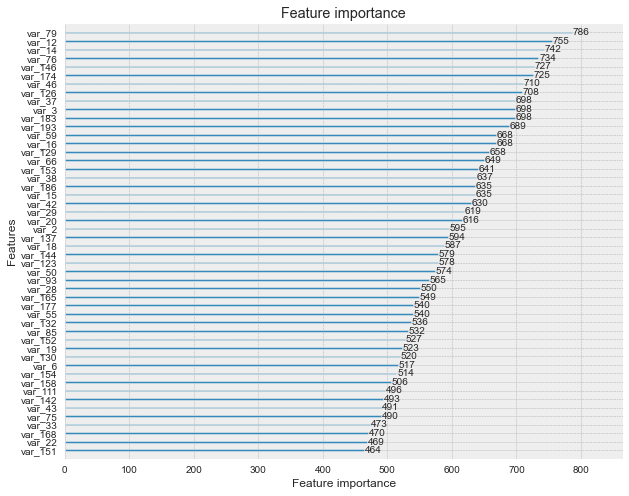

In [303]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(10,8))

### Hyperparameter tuning

In [115]:
def grid_search(clf,params,n_folds,x1_smote,y1_smote,jobs):
    """It will do hyperparameter tuning using grid search and return best parameters"""
    cv_method = StratifiedKFold(n_splits=n_folds)
    gs = GridSearchCV(estimator=clf,param_grid=params,cv=cv_method,verbose=8,scoring='roc_auc',n_jobs=jobs)
    gs.fit(x1_smote,y1_smote)
    print('best param : '+str(gs.best_params_))
    print('best score : '+str(gs.best_score_))
    print('best estimators: '+str(gs.best_estimator_))
    return gs.best_params_,gs.best_estimator_

In [116]:
rand_params={'n_estimators':[10,20,100],'criterion':['gini','entropy'],'max_depth':[3,10],'min_samples_leaf':\
             [2,5], 'min_samples_split':[2,5],'max_features':['auto','sqrt','log2']}

In [117]:
xgb_params={'eta':[0.001,0.1,0.5],'gamma':[0,1,5],'max_depth':[3,15],'alpha':[0,5,10],'lambda':[1,10]}

In [118]:
nb_params={'var_smoothing': np.logspace(0,-11, num=100)}

In [119]:
log_params={'max_iter':[5,20,50,100],'C':[0.5,1,5,10]}

In [131]:
sgd_params={'alpha':[0.0001,0.01],'learning_rate':['optimal'],'max_iter':[50,500],'penalty':['l2', 'l1', 'elasticnet'],'loss':['hinge','log','huber']}

In [185]:
rf1_grid=grid_search(rf1_model,rand_params,3,x1_smote,y1_smote,-1)
rf1_grid

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed: 68.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 89.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 129.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 191.4min finished


best param : {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
best score : 0.9032581594749134
best estimators: RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)


({'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100},
 RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                        min_samples_split=5, random_state=42))

### rf1_grid results:  
- best param : {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
- best score : 0.9032581594749134
- best estimators: RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,min_samples_split=5,    random_state=42)
- ({'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100},
- RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,min_samples_split=5, random_state=42)

In [193]:
xgb1_grid=grid_search(xgbmodel1,xgb_params,3,x1_smote,y1_smote,-1)
xgb1_grid

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 255.3min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 482.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 759.4min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed: 1540.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 1974.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 2198.1min finished


best param : {'alpha': 0, 'eta': 0.001, 'gamma': 0, 'lambda': 1, 'max_depth': 15}
best score : 0.9874338213162943
best estimators: XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.001, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              lambda=1, learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, ...)


({'alpha': 0, 'eta': 0.001, 'gamma': 0, 'lambda': 1, 'max_depth': 15},
 XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, eta=0.001, gamma=0,
               gpu_id=-1, importance_type='gain', interaction_constraints='',
               lambda=1, learning_rate=0.1, max_delta_step=0, max_depth=15,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
               random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
               seed=27, subsample=0.8, tree_method='exact',
               validate_parameters=1, ...))

#### XG Boost results of tuning:
- best param : {'alpha': 0, 'eta': 0.001, 'gamma': 0, 'lambda': 1, 'max_depth': 15}
- best score : 0.9874338213162943
- best estimators: XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=0.8, eta=0.001, gamma=0,
                  gpu_id=-1, importance_type='gain', interaction_constraints='',
                  lambda=1, learning_rate=0.1, max_delta_step=0, max_depth=15,
                  min_child_weight=1, missing=nan, monotone_constraints='()',
                  n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
                  random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                  seed=27, subsample=0.8, tree_method='exact',
                  validate_parameters=1, ...)
- ({'alpha': 0, 'eta': 0.001, 'gamma': 0, 'lambda': 1, 'max_depth': 15},
    XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, eta=0.001, gamma=0,
               gpu_id=-1, importance_type='gain', interaction_constraints='',
               lambda=1, learning_rate=0.1, max_delta_step=0, max_depth=15,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
               random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
               seed=27, subsample=0.8, tree_method='exact',
               validate_parameters=1, ...))

In [133]:
nb1_grid=grid_search(gnb,nb_params,3,x1_smote,y1_smote,-1)
nb1_grid

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


best param : {'var_smoothing': 0.0001}
best score : 0.9069566710423373
best estimators: GaussianNB(priors=[0.5, 0.5], var_smoothing=0.0001)


({'var_smoothing': 0.0001},
 GaussianNB(priors=[0.5, 0.5], var_smoothing=0.0001))

#### Gaussian NB grid results:
- best param : {'var_smoothing': 0.0001}
- best score : 0.9069566710423373
- best estimators: GaussianNB(priors=[0.5, 0.5], var_smoothing=0.0001)

In [182]:
log_grid=grid_search(modellog1,log_params,3,x1_smote,y1_smote,-1)
log_grid

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done  40 out of  48 | elapsed:  1.3min remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.6min finished


best param : {'C': 5, 'max_iter': 100}
best score : 0.8266063217273544
best estimators: LogisticRegression(C=5, random_state=10)


({'C': 5, 'max_iter': 100}, LogisticRegression(C=5, random_state=10))

#### Logistic Regression results after tuning
- best param : {'C': 5, 'max_iter': 100}
- best score : 0.8266063217273544
- best estimators: LogisticRegression(C=5, random_state=10)
- ({'C': 5, 'max_iter': 100}, LogisticRegression(C=5, random_state=10))

In [132]:
sgd_grid=grid_search(sgd,sgd_params,3,x1_smote,y1_smote,-1)
sgd_grid

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.0min finished


best param : {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 500, 'penalty': 'l2'}
best score : 0.8306564374757759
best estimators: SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1)


({'alpha': 0.01,
  'learning_rate': 'optimal',
  'loss': 'hinge',
  'max_iter': 500,
  'penalty': 'l2'},
 SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1))

#### SGD grid results:
- best param : {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 500, 'penalty': 'l2'}
- best score : 0.8306564374757759
- best estimators: SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1)

### Model building after parameter tuning

In [167]:
#Random Forest model with best parameters
rf1_tuned=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10, max_features='log2', min_samples_leaf=2,min_samples_split=5,random_state=42)
#fitting the model
rf1_tuned.fit(x1_smote,y1_smote)
#rf_predt=rf1_tuned.predict(xv1_smote)
#print(rf_pred1)
#Cross validation score:-
cv1_score_rft=cross_val_score(rf1_tuned,x1_smote,y1_smote,cv=5,scoring='accuracy')
print('Cross validation score for Random Forest Classifier for best features:',np.average(cv1_score_rft))
modelrf_predt=cross_val_predict(rf1_tuned,xv1_smote,yv1_smote,cv=5)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

Cross validation score for Random Forest Classifier for best features: 0.8219487796460234


In [169]:
print(modelrf_predt)

[1 1 0 ... 1 1 1]


In [216]:
#XG Boost model with best parameters after tuning
xgbtuned1 = XGBClassifier(learning_rate =0.001,n_estimators=100,max_depth=15,min_child_weight=1,gamma=0,subsample=0.8,\
                      colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,random_state=27,\
                      reg_lambda=1,reg_alpha=0,importance_type='gain',seed=27,booster='gbtree')
xgbtuned1.fit(x1_smote,y1_smote)
cv_score_xgbt=cross_val_score(xgbtuned1,x1_smote,y1_smote,cv=5,scoring='accuracy')
print('Cross validation score for XGBoost Classifier for best features:',np.average(cv_score_xgbt))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Cross validation score for XGBoost Classifier for best features: 0.8751303197865923


Cross validation score for Guassian Naive Bayes Classifier: 0.8431269841755306


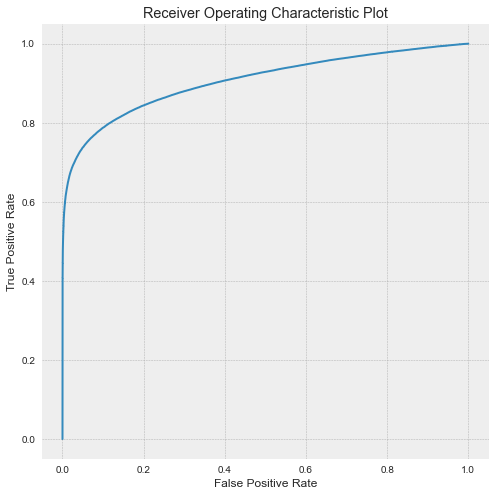

In [139]:
#Gaussian Naive Bayes model with best parameters
nbpipelinet = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB(priors=[0.5, 0.5], var_smoothing=0.0001))
nbpipelinet.fit(x1_smote, y1_smote)
modelnb_predt=cross_val_predict(nbpipelinet,xv1_smote,yv1_smote,cv=5)
#Cross validation score:-
cv_score_nbt=cross_val_score(nbpipelinet,x1_smote,y1_smote,cv=5,scoring='accuracy');
print('Cross validation score for Guassian Naive Bayes Classifier:',np.average(cv_score_nbt))
plt.figure(figsize=(8,8));
fpr, tpr, thr = roc_curve(y1_smote, nbpipelinet.predict_proba(x1_smote)[:,1]);
plt.plot(fpr, tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Receiver Operating Characteristic Plot');
auc(fpr, tpr);
cross_val_score(nbpipelinet, x1_smote, y1_smote, scoring='roc_auc', cv=10).mean();

In [173]:
#Logistic regression model after tuning
tunedlog1=LogisticRegression(random_state=10)
#fitting the model:-
tunedlog1.fit(x1_smote,y1_smote)

LogisticRegression(random_state=10)

In [174]:
#Cross validation score:-
logcv_score1=cross_val_score(tunedlog1,x1_smote,y1_smote,cv=5)
print('Cross validation score for Logistic Regression:',np.average(logcv_score1))

Cross validation score for Logistic Regression: 0.7512958382319108


In [135]:
#Stacking with tuned parameters
gnbt = GaussianNB(priors = [0.5,0.5],var_smoothing=0.001)
sgdt = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',alpha=0.01, max_iter=500, n_jobs=-1)
                    #alpha = 6.4280731172843194e-06,n_jobs=-1) 
rfct = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10, max_features='log2', min_samples_leaf=2,min_samples_split=5,random_state=42)

clft = StackingClassifier(classifiers=[sgdt,rfct], meta_classifier=gnbt,verbose=8)

In [136]:
#clft.fit(x1_smote,y1_smote)
stackt_cv_score1=cross_val_score(clft,x1_smote,y1_smote,cv=5,scoring='accuracy')
print('Cross validation score for Stacking model after hyperparameter tuning:',np.average(stackt_cv_score1))
#stackt_pred1 = cross_val_predict(clft,xv1_smote,yv1_smote,cv=5)
#print('Test auc score : '+str(roc_auc_score(yv1_smote,stackt_pred1)))
#print(stackt_pred1)

Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 3.57, NNZs: 130, Bias: 0.538814, T: 230275, Avg. loss: 18.078511
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 2.54, NNZs: 130, Bias: 0.556615, T: 460550, Avg. loss: 1.698253
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 2.14, NNZs: 130, Bias: 0.567167, T: 690825, Avg. loss: 1.209473
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 1.93, NNZs: 130, Bias: 0.574324, T: 921100, Avg. loss: 1.019447
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 130, Bias: 0.580435, T: 1151375, Avg. loss: 0.914206
Total training time: 0.79 seconds.
-- Epoch 6
Norm: 1.71, NNZs: 130, Bias: 0.585625, T: 1381650, Avg. loss: 0.847531
Total training time: 0.97 seconds.
-- Epoch 7
Norm: 1.64, NNZs: 130, Bias: 0.590059, T: 1611925, Avg. loss: 0.802220
Total training time: 1.11 seconds.
-- Epoch 8
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s remaining:    0.0s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 3.53, NNZs: 130, Bias: 1.052417, T: 230275, Avg. loss: 17.702955
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 2.48, NNZs: 130, Bias: 1.072794, T: 460550, Avg. loss: 1.713910
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 130, Bias: 1.082967, T: 690825, Avg. loss: 1.228398
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 1.88, NNZs: 130, Bias: 1.090512, T: 921100, Avg. loss: 1.028379
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 1.75, NNZs: 130, Bias: 1.096413, T: 1151375, Avg. loss: 0.923636
Total training time: 1.06 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 130, Bias: 1.101586, T: 1381650, Avg. loss: 0.856258
Total training time: 1.27 seconds.
-- Epoch 7
Norm: 1.60, NNZs: 130, Bias: 1.105712, T: 1611925, Avg. loss: 0.811879
Total training time: 1.48 seconds.
-- Epoch 8
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.3s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.5s remaining:    0.0s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 3.56, NNZs: 130, Bias: 0.498209, T: 230275, Avg. loss: 17.915405
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 2.53, NNZs: 130, Bias: 0.517173, T: 460550, Avg. loss: 1.705522
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 2.13, NNZs: 130, Bias: 0.527561, T: 690825, Avg. loss: 1.222312
Total training time: 0.64 seconds.
-- Epoch 4
Norm: 1.91, NNZs: 130, Bias: 0.535320, T: 921100, Avg. loss: 1.025487
Total training time: 0.81 seconds.
-- Epoch 5
Norm: 1.79, NNZs: 130, Bias: 0.541793, T: 1151375, Avg. loss: 0.920603
Total training time: 1.04 seconds.
-- Epoch 6
Norm: 1.69, NNZs: 130, Bias: 0.546755, T: 1381650, Avg. loss: 0.855588
Total training time: 1.29 seconds.
-- Epoch 7
Norm: 1.62, NNZs: 130, Bias: 0.551547, T: 1611925, Avg. loss: 0.811692
Total training time: 1.55 seconds.
-- Epoch 8
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.0s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.8s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.5s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.0s remaining:    0.0s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 3.53, NNZs: 130, Bias: 2.172564, T: 230275, Avg. loss: 17.710359
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 2.50, NNZs: 130, Bias: 2.188738, T: 460550, Avg. loss: 1.713032
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 130, Bias: 2.198405, T: 690825, Avg. loss: 1.229018
Total training time: 0.72 seconds.
-- Epoch 4
Norm: 1.89, NNZs: 130, Bias: 2.205712, T: 921100, Avg. loss: 1.030387
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 1.75, NNZs: 130, Bias: 2.211353, T: 1151375, Avg. loss: 0.925467
Total training time: 1.14 seconds.
-- Epoch 6
Norm: 1.67, NNZs: 130, Bias: 2.216372, T: 1381650, Avg. loss: 0.857390
Total training time: 1.37 seconds.
-- Epoch 7
Norm: 1.61, NNZs: 130, Bias: 2.220405, T: 1611925, Avg. loss: 0.812922
Total training time: 1.59 seconds.
-- Epoch 8
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.7s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s remaining:    0.0s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

Fitting 2 classifiers...
Fitting classifier1: sgdclassifier (1/2)
SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=500, n_jobs=-1,
              verbose=6)
-- Epoch 1
Norm: 3.52, NNZs: 130, Bias: 2.517323, T: 230276, Avg. loss: 17.453456
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 130, Bias: 2.533797, T: 460552, Avg. loss: 1.707916
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 130, Bias: 2.543661, T: 690828, Avg. loss: 1.219899
Total training time: 0.43 seconds.
-- Epoch 4
Norm: 1.90, NNZs: 130, Bias: 2.550477, T: 921104, Avg. loss: 1.028423
Total training time: 0.56 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 130, Bias: 2.557044, T: 1151380, Avg. loss: 0.923537
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 1.68, NNZs: 130, Bias: 2.561389, T: 1381656, Avg. loss: 0.854487
Total training time: 0.78 seconds.
-- Epoch 7
Norm: 1.61, NNZs: 130, Bias: 2.565754, T: 1611932, Avg. loss: 0.808787
Total training time: 0.92 seconds.
-- Epoch 8
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.3s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.1s remaining:    0.0s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

Cross validation score for Stacking model after hyperparameter tuning: 0.8219487796460234


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


### Model Selection

- I have taken some of the best performing model based on cross-validation score which is better than accuracy score or similar to accuracy score 
- I have performed hyperparameter tuning on top 5 best models based on cross validation scores. Those models are Logistic Regression,Gaussian NB,Random Forest,XG Boost and Stacking Classifiers.
- Now again after completely tuning the parameters using Grid Search CV I have analyzed the best score using grid search and again build the model after on the top 5 grid scores(all the models taken for parameter tuning). Now I applied best parameters on these models found the cross-validation score and found that XG Boost outpeforms all the models eventhough before tuning Random Forest was working better with 90% accuracy then after proper tuning the random forest score comes down and XG Boost grid score seems to be 98.74% and CV score is 87.5% after tuning the best params whereas before it was 84%.
- So I consider XG Boost be the best model for this dataset and may be Stacking also working best if XG Boost is included it. 
- XG Boost is best model for many datasets and now even for this Santander mission customer predictions
- Below are some more statistics and predictions made by XG Boost and I am using same model(XG Boost) for predictions on this dataset. 

In [179]:
xgbtuned1.fit(x1_smote,y1_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [217]:
xgb_predt1=cross_val_predict(xgbtuned1,xv1_smote,yv1_smote,cv=5)

In [218]:
print(xgb_predt1)

[1 0 0 ... 1 1 1]


In [219]:
x1_smote.shape

(287844, 130)

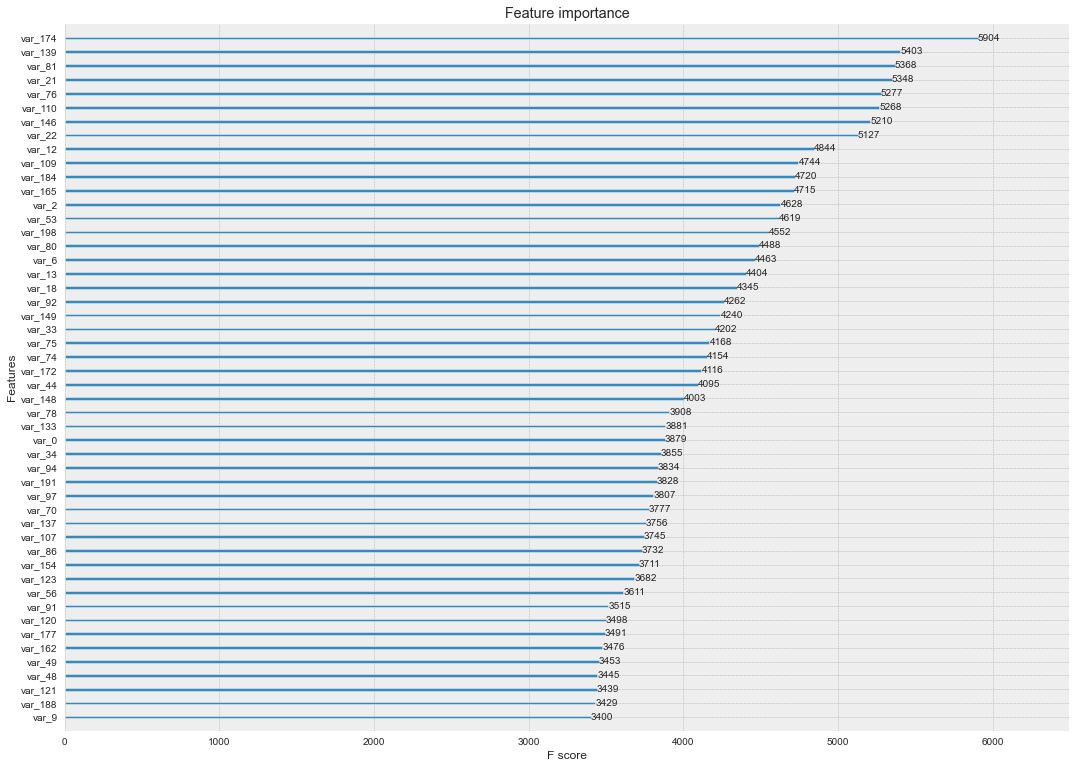

In [227]:
xgb.plot_importance(xgbtuned1,max_num_features=50);
plt.rcParams['figure.figsize']=[18,18]
plt.show();

In [221]:
xgb.plot_tree(xgbtuned1,num_trees=20);
plt.rcParams['figure.figsize']=[50,10];
plt.show();

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0573501 to fit


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0584271 to fit


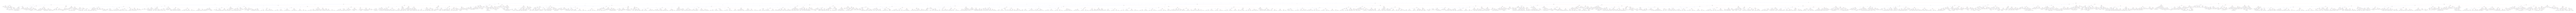

In [222]:
import matplotlib
xgb.plot_tree(xgbtuned1, num_trees=2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('XGBoost_tree.png')
plt.show();

In [223]:
#Confusion matrix:-
cm_xgbt1=confusion_matrix(yv1_smote,xgb_predt1)
cm_xgbt1=pd.crosstab(yv1_smote,xgb_predt1)
#ROC_AUC SCORE:-
xgbt_roc_score1=roc_auc_score(yv1_smote,xgb_predt1)
print('XGBoost Classifier ROC score for best features:',xgbt_roc_score1)

XGBoost Classifier ROC score for best features: 0.8996247915508616


In [224]:
#Classification Report:-
xgbt_scores1=classification_report(yv1_smote,xgb_predt1)
print(xgbt_scores1)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     35980
           1       0.87      0.94      0.90     35980

    accuracy                           0.90     71960
   macro avg       0.90      0.90      0.90     71960
weighted avg       0.90      0.90      0.90     71960



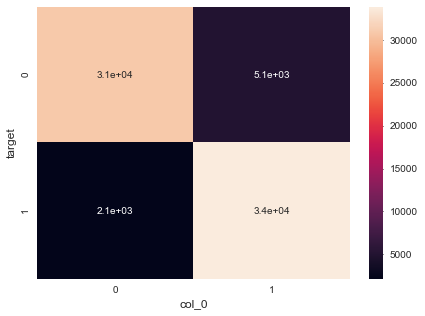

In [225]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_xgbt1, annot=True);

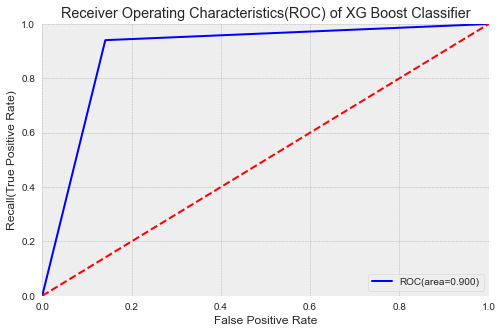

AUC for XGBoost Classifier model with best parameters: 0.8996247915508616


In [155]:
#ROC_AUC curve
plt.figure(figsize=(8,5))
false_positive_rate,recall,thresholds=roc_curve(yv1_smote,xgb_predt1);
xgbtroc_auc1=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC) of XG Boost Classifier');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %xgbtroc_auc1);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for XGBoost Classifier model with best parameters:',xgbtroc_auc1);

### Preprocessing for making predictions on test set

In [133]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [134]:
dt1=test.copy()

In [135]:
dt1.drop('ID_code',axis=1,inplace=True)
dt1.drop_duplicates(inplace=True)

In [136]:
dt1.shape

(200000, 200)

In [143]:
dt1.head()

var_0    var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493  18.2675   
1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196  18.6316   
2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950  20.2537   
3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397  20.5660   
4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595  10.6048   

    var_8   var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  2.1337  8.8100  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1 -4.4131  5.9739  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  1.5233  8.3442  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  3.3755  7.4578  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  2.9890  7.1437  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 200 columns]

In [290]:
dt1.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

In [182]:
x_smote.shape

(287844, 200)

In [140]:
x1_smote.shape

(287844, 130)

In [142]:
x_smote.head()

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
2  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310  5.6890  22.3262   
3  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630  4.4514  10.1854   
4  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859  6.0637  16.8410   

    var_8   var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0 -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   
2  5.0647  7.1971  ...  13.1700   6.5491   3.9906   5.8061  23.1407  -0.3776   
3 -3.1882  9.0827  ...   1.4298  14.7510   1.6395   1.4181  14.8370  -1.9940   
4  0.1287  7.9682  ...   0.5543   6.3160   1.0371   3.6885  14.8344   0.4467   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   3.9267   9.5031  17.9974  -8.8104  
2   4.2178   9.4237   8.6624   3.4806  
3  -1.0733   8.1975  19.5114   4.8453  
4  14.1287   7.9133  16.2375  14.2514  

[5 rows x 200 columns]

In [168]:
x.shape

(200000, 200)

In [169]:
x1.shape

(200000, 130)

In [170]:
x1.columns

Index(['var_120', 'var_70', 'var_160', 'var_136', 'var_102', 'var_174',
       'var_172', 'var_74', 'var_73', 'var_165',
       ...
       'var_145', 'var_22', 'var_124', 'var_105', 'var_148', 'var_35',
       'var_89', 'var_140', 'var_193', 'var_112'],
      dtype='object', length=130)

In [189]:
type(x1.columns)

pandas.core.indexes.base.Index

In [190]:
x1_list=list(x1.columns)

In [192]:
len(x1_list)

130

In [182]:
check=set(x1.columns).intersection(set(test_clean.columns))

In [183]:
len(check)

130

In [193]:
test_clean1=dt1[x1_list]

In [196]:
test_clean1.shape

(200000, 130)

In [187]:
#XG Boost model with best parameters after tuning
xgbtuned_test = XGBClassifier(learning_rate =0.001,n_estimators=100,max_depth=15,min_child_weight=1,gamma=0,subsample=0.8,\
                      colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,random_state=27,\
                      reg_lambda=1,reg_alpha=0,importance_type='gain',seed=27,booster='gbtree')
xgbtuned_test.fit(x_smote,y_smote)
cv_score_xgbt1=cross_val_score(xgbtuned_test,x_smote,y_smote,cv=5,scoring='accuracy')
print('Cross validation score for XGBoost Classifier for best features:',np.average(cv_score_xgbt1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Cross validation score for XGBoost Classifier for best features: 0.8905310320826214


In [235]:
xgb_predtt1=cross_val_predict(xgbtuned_test,xv_smote,yv_smote,cv=5)

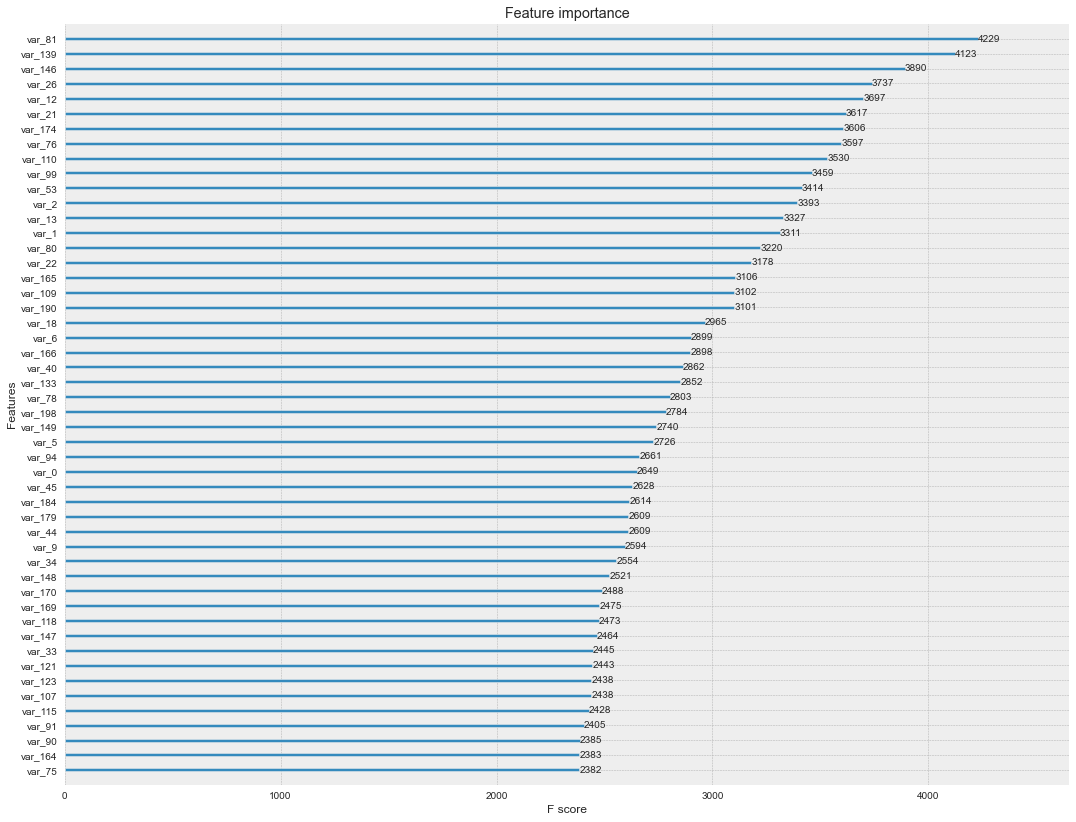

In [240]:
xgb.plot_importance(xgbtuned_test,max_num_features=50);
plt.rcParams['figure.figsize']=[18,15]
plt.show();

In [232]:
xgb.plot_tree(xgbtuned_test,num_trees=20);
plt.rcParams['figure.figsize']=[50,10];
plt.show();

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0578726 to fit


XGBoost Classifier ROC score with best parameters: 0.9117565314063367


<Figure size 504x360 with 0 Axes>

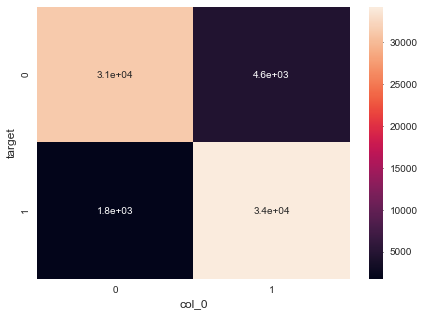

In [236]:
#Confusion matrix:-
cm_xgbtt1=confusion_matrix(yv_smote,xgb_predtt1)
cm_xgbtt1=pd.crosstab(yv_smote,xgb_predtt1)
#ROC_AUC SCORE:-
xgbtt_roc_score1=roc_auc_score(yv_smote,xgb_predtt1)
print('XGBoost Classifier ROC score with best parameters:',xgbtt_roc_score1)
plt.figure(figsize=(7,5))
sns.heatmap(cm_xgbtt1,annot=True)

In [287]:
cm_xgbtt1

col_0       0      1
target              
0       31394   4586
1        1764  34216

In [237]:
#Classification Report:-
xgbtt_scores1=classification_report(yv_smote,xgb_predtt1)
print(xgbtt_scores1)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     35980
           1       0.88      0.95      0.92     35980

    accuracy                           0.91     71960
   macro avg       0.91      0.91      0.91     71960
weighted avg       0.91      0.91      0.91     71960



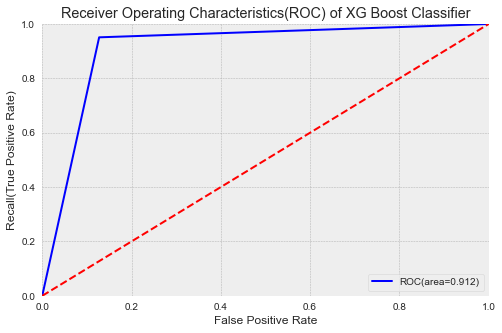

AUC for XGBoost Classifier model with best parameters: 0.9117565314063367


In [238]:
#ROC_AUC curve
plt.figure(figsize=(8,5))
false_positive_rate,recall,thresholds=roc_curve(yv_smote,xgb_predtt1);
xgbttroc_auc1=auc(false_positive_rate,recall);
plt.title('Receiver Operating Characteristics(ROC) of XG Boost Classifier');
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %xgbttroc_auc1);
plt.legend();
plt.plot([0,1],[0,1],'r--');
plt.xlim([0.0,1.0]);
plt.ylim([0.0,1.0]);
plt.ylabel('Recall(True Positive Rate)');
plt.xlabel('False Positive Rate');
plt.show();
print('AUC for XGBoost Classifier model with best parameters:',xgbttroc_auc1);

### Predictions on test set

In [228]:
#Predictions on 130 features 
test_pred130=xgbtuned1.predict(test_clean1)

In [229]:
test_pred130

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [198]:
#Predictions on test set with all 200 features
test_pred=xgbtuned_test.predict(dt1)

In [199]:
test_pred.shape

(200000,)

In [200]:
test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [201]:
test.shape

(200000, 201)

In [202]:
Sa_test_pred=test.copy()

In [203]:
Sa_test_pred.shape

(200000, 201)

In [204]:
Sa_test_pred['target']=test_pred

In [206]:
Sa_test_pred.shape

(200000, 202)

In [207]:
Sa_test_pred.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_191  var_192  var_193  var_194  var_195  var_196  \
0  18.2675  2.1337  ...  11.8495  -1.4300   2.4508  13.7112   2.4669   4.3654   
1  18.6316 -4.4131  ...   8.8349   0.9403  10.1282  15.5765   0.4773  -1.4852   
2  20.2537  1.5233  ...  10.9935   1.9803   2.1800  12.9813   2.1281  -7.1086   
3  20.5660  3.3755  ...   9.0766   1.6580   3.5813  15.1874   3.1656   3.9567   
4  10.6048  2.9890  ...   9.1723   1.2835   3.3778  19.5542  -0.2860  -5.1612   

   var_197  var_198  var_199  target  
0  10.7200  15.4722  -8.7197       0  
1   9.8714  19.1293 -20.9760       0  
2   7.0618  19.8956 -23.1794       0  
3   9.2295  13.0168  -4.2108       1  
4   7.2882  13.9260  -9.1846       1  

[5 rows x 202 columns]

In [208]:
Sa_test_pred.to_csv("Sa_cust_prediction.csv",index=False)